# Data Import + Cleaning

This Script concerns the import of Files as well as the File Preparation for Descriptive Analysis

The source of the two Data Files is Kaggle accessible at: 

https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/data

**The Original Description of the Kaggle Description concerning Sources**

This dataset(s) contains 4 years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España. Weather data was purchased as part of a personal project from the Open Weather API for the 5 largest cities in Spain and made public here.

-Direct Quote from Kaggle-

**This is the first script of Data Pre-Processing including tasks such as:**
- merging datasets
- standardising column formats
- one-hot encoding

**Importing Libraries**

In [1]:
# Libraries Data Description / Preparation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
import json
warnings.filterwarnings('ignore')


# Libraries Models PCA, SVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.9254901960784314, 0.8823529411764706, 0.2), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


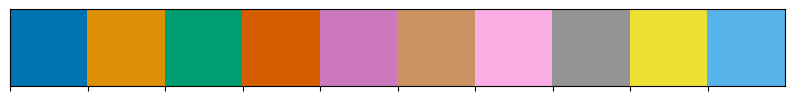

In [2]:
# Color Palette
color_palette = sns.color_palette("colorblind")
print(color_palette)
sns.palplot(color_palette)

In [3]:
light_blue = color_palette[-1]  # For example, selecting the first color
light_yellow = color_palette[-2]  # For example, selecting the first color
dark_orange = color_palette[1]  # For example, selecting the first color
dark_blue = color_palette[0]  # For example, selecting the first color
#specific_color = color_palette[0]  # For example, selecting the first color

**Main**

# Data Import and Merging

In [4]:
# Loading necessary Files <- your file path here
energy_df = pd.read_csv("0_Data_Sources/energy_dataset.csv")
weather_df = pd.read_csv("0_Data_Sources/weather_features.csv")

**Energy Data Frame**

The key variable here is **Total Load Actual** per Hour for a period of 4 years.

**Weather Data Frame**

Includes additional metrological dimensions per hour for a poriod of 4 years.

In [5]:
energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [6]:
energy_df['time'].duplicated().any()

False

In [7]:
energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [8]:
energy_df.shape

(35064, 29)

In [9]:
weather_df

dt_iso city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178396 rows x 17 columns]

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [11]:
weather_df.shape

(178396, 17)

In [12]:
weather_df['dt_iso'].duplicated().any()

True

In [13]:
weather_df.shape

(178396, 17)

In [14]:
weather_df.rename(columns={'dt_iso': 'time'}, inplace=True)

In [15]:
merged_df = pd.merge(energy_df,weather_df,on="time",how="left")

In [16]:
merged_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 00:00:00+01:00               447.0   
2  2015-01-01 00:00:00+01:00               447.0   
3  2015-01-01 00:00:00+01:00               447.0   
4  2015-01-01 00:00:00+01:00               447.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 329.0                                 0.0   
2                                 329.0                                 0.0   
3                                 329.0                                 0.0   
4                                 329.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 4844.0                       4821.0                  162.0   
2                 4844.0                       4821.0                  162.0   
3                 4844.0                       4821.0                  162.0   
4                 4844.0                       4821.0                  162.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0  ...           1        62      0.0      0.0      0.0           0   
1  ...           1       309      0.0      0.0      0.0           0   
2  ...           0       226      0.0      0.0      0.0           0   
3  ...           7        58      0.0      0.0      0.0           0   
4  ...           1        21      0.0      0.0      0.0           0   

   weather_id  weather_main  weather_description  weather_icon  
0         800         clear         sky is clear           01n  
1         800         clear         sky is clear           01n  
2         800         clear         sky is clear            01  
3         800         clear         sky is clear           01n  
4         800         clear         sky is clear           01n  

[5 rows x 45 columns]

In [17]:
merged_df.shape

(178396, 45)

In [18]:
merged_df.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [19]:
print(f'Count of null values for each column: \n{merged_df.isnull().sum()}')

Count of null values for each column: 
time                                                0
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
generation hydro pumped storage aggregated     178396
generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                 

In [20]:
merged_df.shape

(178396, 45)

**Pre-Assumptions - not validated**
Currently the dataframe has:
- rows: 178.396
- columns: 57

- pressure, humidity, wind_speed, wind_deg, clouds_all, weather_id are currently int64 --> transform them to float for consistency

**Missing Data:**
- generation hydro pumped storage aggregated    missing values: 178396
- forecast wind offshore eday ahead    missing values: 178396
==> according to the dataset description these columns have no values --> eliminate the columns for the "proof of concept" since no information is stored

generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                         90
generation solar                                   90
generation waste                                   95
generation wind offshore                           90
generation wind onshore                            90
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
total load actual                                 180

**Strategy Handling Missing: Eliminate Data Objects or Attributes**

Why: Deleting all rows with missing values compromises the overall dataframe by less than 1%. According to the book "Introdution to Data Mining", this is an effective strategy when solely a very small proposition of data is missing (as it is here the case)

**Drop Columns:**
- Weather_description ==> Long description of current weather => drop for simplicity
- Weather_ID ==> is the ID from the Weather Dataset - can potentially be dropped
- Weather_Icon ==> can potentially be dropped, just an Icon
- Weather icon code for website ==> can be dropped
- total load forecast


**Key Columns:**
- time ==> the time variable for our forecasting (needs to be transformed into datetime)
- Target Variable: total load actual ==> Actual Electricy Demand which is the **Energy Consumption in Demand at a particular time**

**One Hot Encoding - columns which have categorical values:**
- City / weather main (categorical) ==> one-hot encoding needed
Hereby weather is the macro description, weather description is a bit more precise

One Hot Encoding: One Hot Encoding is needed to encode categorical data (data which cannot be ranked/ordered) into continous values (binary 1/0)

Other Columns are Features directly usable in dataframe

**Before going to descriptive analysis, data types will be unified and One-Hot Encoding performed**

In [21]:
# Convert all int values to float (consistency)
merged_df['pressure'] = merged_df['pressure'].astype(float)
merged_df['humidity'] = merged_df['humidity'].astype(float)
merged_df['wind_speed'] = merged_df['wind_speed'].astype(float)
merged_df['wind_deg'] = merged_df['wind_deg'].astype(float)
merged_df['clouds_all'] = merged_df['clouds_all'].astype(float)

merged_df['time'] = merged_df['time'].astype(str) # converts time column to string required for more transformation
merged_df['time'] = merged_df['time'].str.split('+').str[0] # this removes the +01:00 time zone value from all rows
merged_df['time'] = pd.to_datetime(merged_df['time'], format='%Y-%m-%d %H:%M:%S') # converts the time column into the time frame

In [22]:
# drop columns obvioiusly not needed
merged_df.drop(columns=['weather_id'], inplace=True)
merged_df.drop(columns=['weather_icon'], inplace=True)
merged_df.drop(columns=['weather_description'], inplace=True)

merged_df.drop(columns=['generation hydro pumped storage aggregated'], inplace=True)
merged_df.drop(columns=['forecast wind offshore eday ahead'], inplace=True)
merged_df.drop(columns=['total load forecast'], inplace=True)



In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 39 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   time                                         178396 non-null  datetime64[ns]
 1   generation biomass                           178301 non-null  float64       
 2   generation fossil brown coal/lignite         178306 non-null  float64       
 3   generation fossil coal-derived gas           178306 non-null  float64       
 4   generation fossil gas                        178306 non-null  float64       
 5   generation fossil hard coal                  178306 non-null  float64       
 6   generation fossil oil                        178301 non-null  float64       
 7   generation fossil oil shale                  178306 non-null  float64       
 8   generation fossil peat                       178306 non-null  fl

In [24]:
unique_values = merged_df['weather_main'].unique()
print(unique_values)

['clear' 'clouds' 'rain' 'snow' 'fog' 'mist' 'haze' 'dust' 'drizzle'
 'thunderstorm' 'smoke' 'squall']


In [25]:
unique_values = merged_df['city_name'].unique()
print(unique_values)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [26]:
# One-Hot Encoding for Weather_main - for future analysis
one_hot_encoded = pd.get_dummies(merged_df['weather_main'], prefix = "weather_main")
df_encoded = pd.concat([merged_df, one_hot_encoded], axis=1)
df_encoded.drop(columns=['weather_main'], inplace=True)
merged_df = df_encoded
merged_df.columns
# One-Hot Encoding for City_name - for future analysis
one_hot_encoded = pd.get_dummies(merged_df['city_name'], prefix = "city_name")
df_encoded = pd.concat([merged_df, one_hot_encoded], axis=1)
df_encoded.drop(columns=['city_name'], inplace=True)
merged_df = df_encoded
merged_df.head()

time  generation biomass  generation fossil brown coal/lignite  \
0 2015-01-01               447.0                                 329.0   
1 2015-01-01               447.0                                 329.0   
2 2015-01-01               447.0                                 329.0   
3 2015-01-01               447.0                                 329.0   
4 2015-01-01               447.0                                 329.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 4844.0   
1                                 0.0                 4844.0   
2                                 0.0                 4844.0   
3                                 0.0                 4844.0   
4                                 0.0                 4844.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4821.0                  162.0   
2                       4821.0                  162.0   
3                       4821.0                  162.0   
4                       4821.0                  162.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  weather_main_rain  weather_main_smoke  weather_main_snow  \
0  ...                  0                   0                  0   
1  ...                  0                   0                  0   
2  ...                  0                   0                  0   
3  ...                  0                   0                  0   
4  ...                  0                   0                  0   

   weather_main_squall  weather_main_thunderstorm  city_name_ Barcelona  \
0                    0                          0                     0   
1                    0                          0                     0   
2                    0                          0                     0   
3                    0                          0                     1   
4                    0                          0                     0   

   city_name_Bilbao  city_name_Madrid  city_name_Seville  city_name_Valencia  
0                 0                 0                  0                   1  
1                 0                 1                  0                   0  
2                 1                 0                  0                   0  
3                 0                 0                  0                   0  
4                 0                 0                  1                   0  

[5 rows x 54 columns]

In [27]:
merged_df.duplicated().sum()

21

In [28]:
# Drop Null Values for rows
merged_df = merged_df.dropna()
print(f'Count of null values for each column: \n{merged_df.isnull().sum()}')

Count of null values for each column: 
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore      

In [29]:
merged_df['time'].is_unique

False

In [30]:
merged_df['time'].unique().size  # same as row count

35013

In [31]:
merged_df['time'].duplicated().any()

True

In [32]:
merged_df.head()
mergedDF = merged_df.copy()

#  Aggregation
Sometimes “less is more” and this is the case with aggregation, the combining of two or more objects into a single object.

The forecasting approach is medium to long term oriented (see task description) to reduce the overall amount of data we are working with.
"Sometimes “less is more” and this is the case with aggregation, the combining of two or more objects into a single object.”


There are several motivations for aggregation:
1. the smaller data sets resulting from data reduction require less memory and processing time and allow the use of more resource intensive data mining algorithms further down the road.
2. aggregation can act as a change of scope or scale by providing a high-level view of the data instead of a low-level view, which is desired for having a medium term forecasting for policymaking


The team also acknowledges the drawbacks of too much aggregation, which is:
1. the loss of interesting details (fine gradual insights - e.g. which hour has the highest consumption)
2. losing the actual performance of data by ironing out too many flaws.

Some plotting of graphs will reveal how the data behaves according to hourly, daily, weekly, monthly, yearly level to determine how granular the data should be processes.

In [33]:
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df.set_index('time', inplace=True)

# Resample the data to different time frequencies
merged_df_daily = merged_df.resample('D').mean()  # Daily resampling
merged_df_weekly = merged_df.resample('W').mean()  # Weekly resampling
merged_df_monthly = merged_df.resample('M').mean()  # Monthly resampling

In [34]:
merged_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load actual',
       'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_3h', 'clouds_all', 'weather_main_clear', 'weather_main_clouds',
       'weather_main_drizzle'

## Exploring different levels of granularity

Lets look at the whole data first

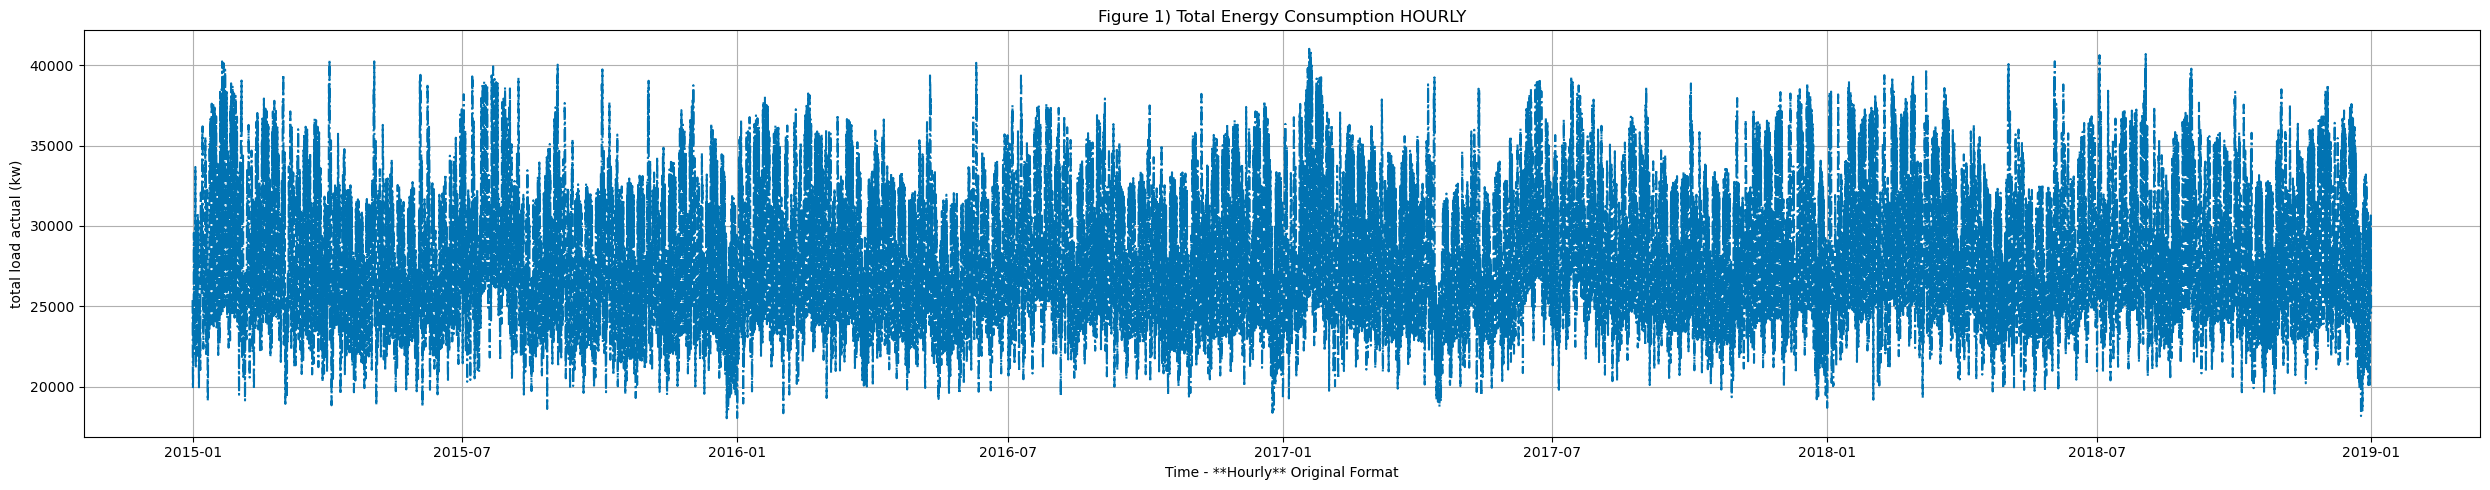

In [35]:
plt.figure(figsize=(25, 5))
plt.plot(merged_df.index, merged_df['total load actual'], color=dark_blue, marker='', linestyle='-.')
plt.xlabel('Time - **Hourly** Original Format')
plt.ylabel('total load actual (kw)')
plt.title('Figure 1) Total Energy Consumption HOURLY')
plt.grid(True)
plt.tight_layout()
plt.show()

Since here is a lot of noise in the dataset, we will examining the behaviour of data for different intervals and compare if the overall structure still prevails:
- daily
- weekly
- monthly
- yearly

In [36]:
merged_df["year"] = merged_df.index.year
merged_df["month"] = merged_df.index.month
merged_df["day"] = merged_df.index.day

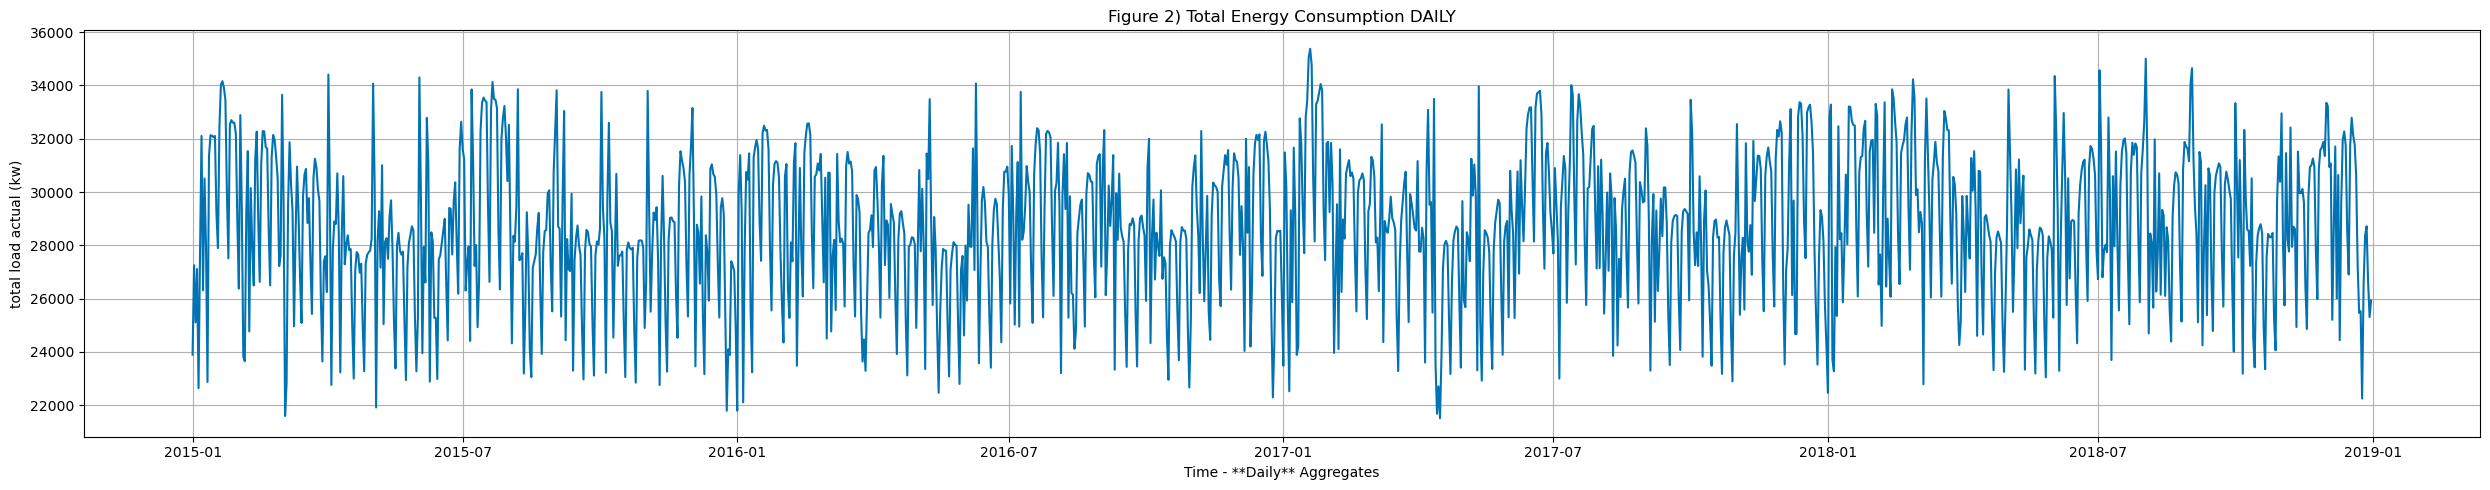

In [37]:
# Plot daily data
plt.figure(figsize=(25, 5))
plt.plot(merged_df_daily.index, merged_df_daily['total load actual'], color= dark_blue, marker='', linestyle='-')
plt.xlabel('Time - **Daily** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 2) Total Energy Consumption DAILY')
plt.grid(True)
plt.tight_layout()
plt.show()

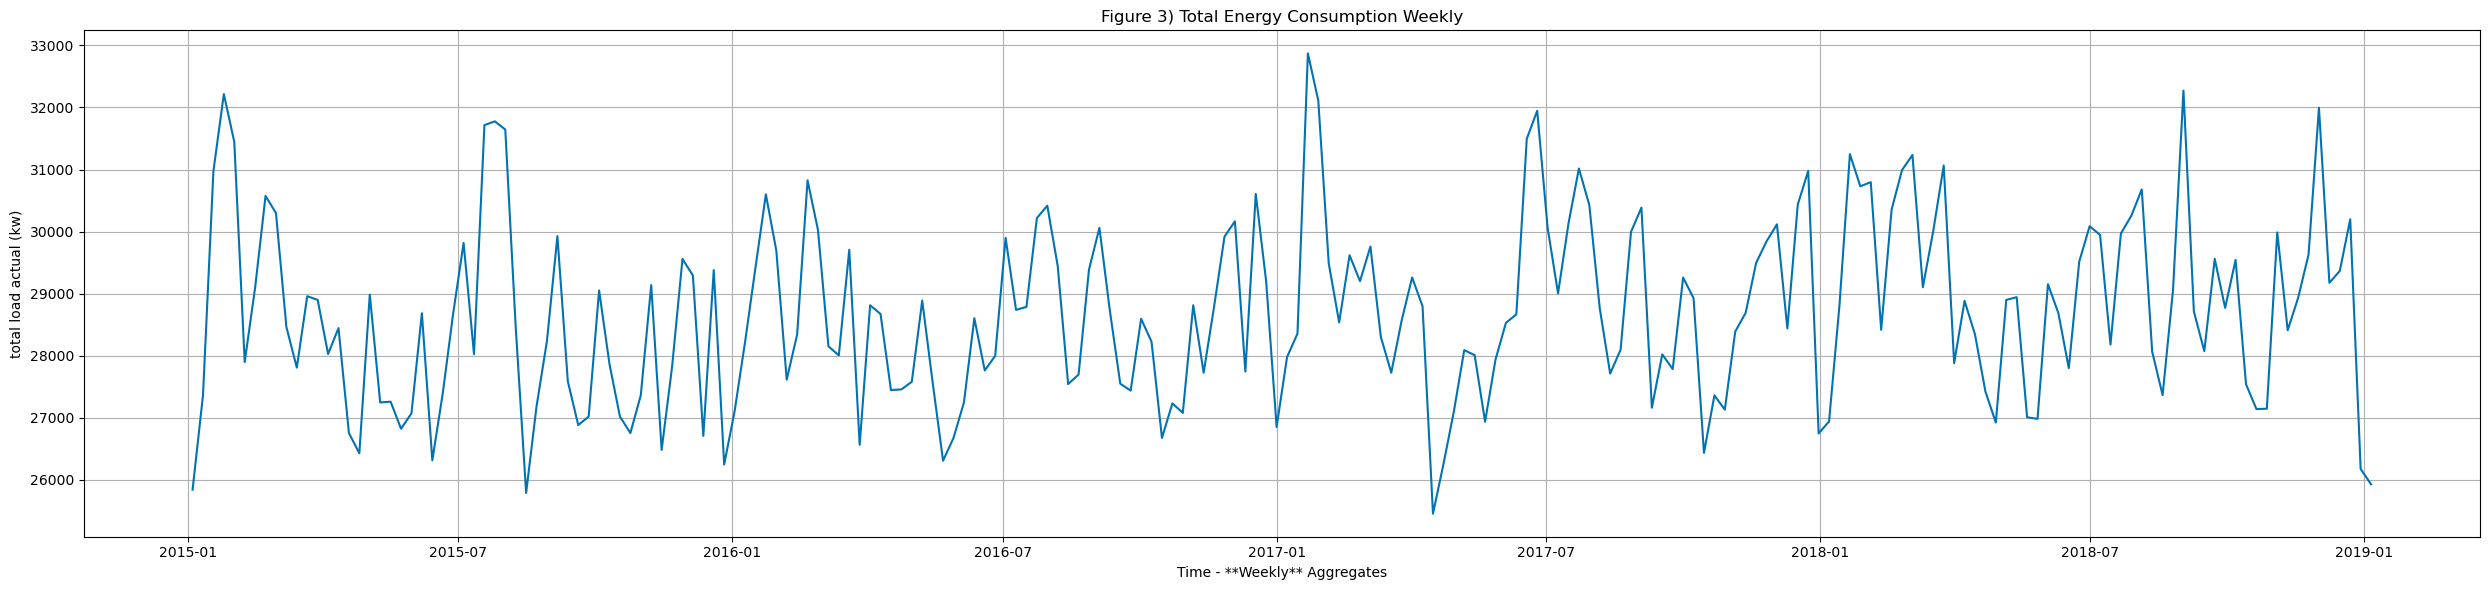

In [38]:
# Plot weekly data
plt.figure(figsize=(25, 6))
plt.plot(merged_df_weekly.index, merged_df_weekly['total load actual'], color= dark_blue, marker='', linestyle='-')
plt.xlabel('Time - **Weekly** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 3) Total Energy Consumption Weekly')
plt.grid(True)
plt.tight_layout()
plt.show()

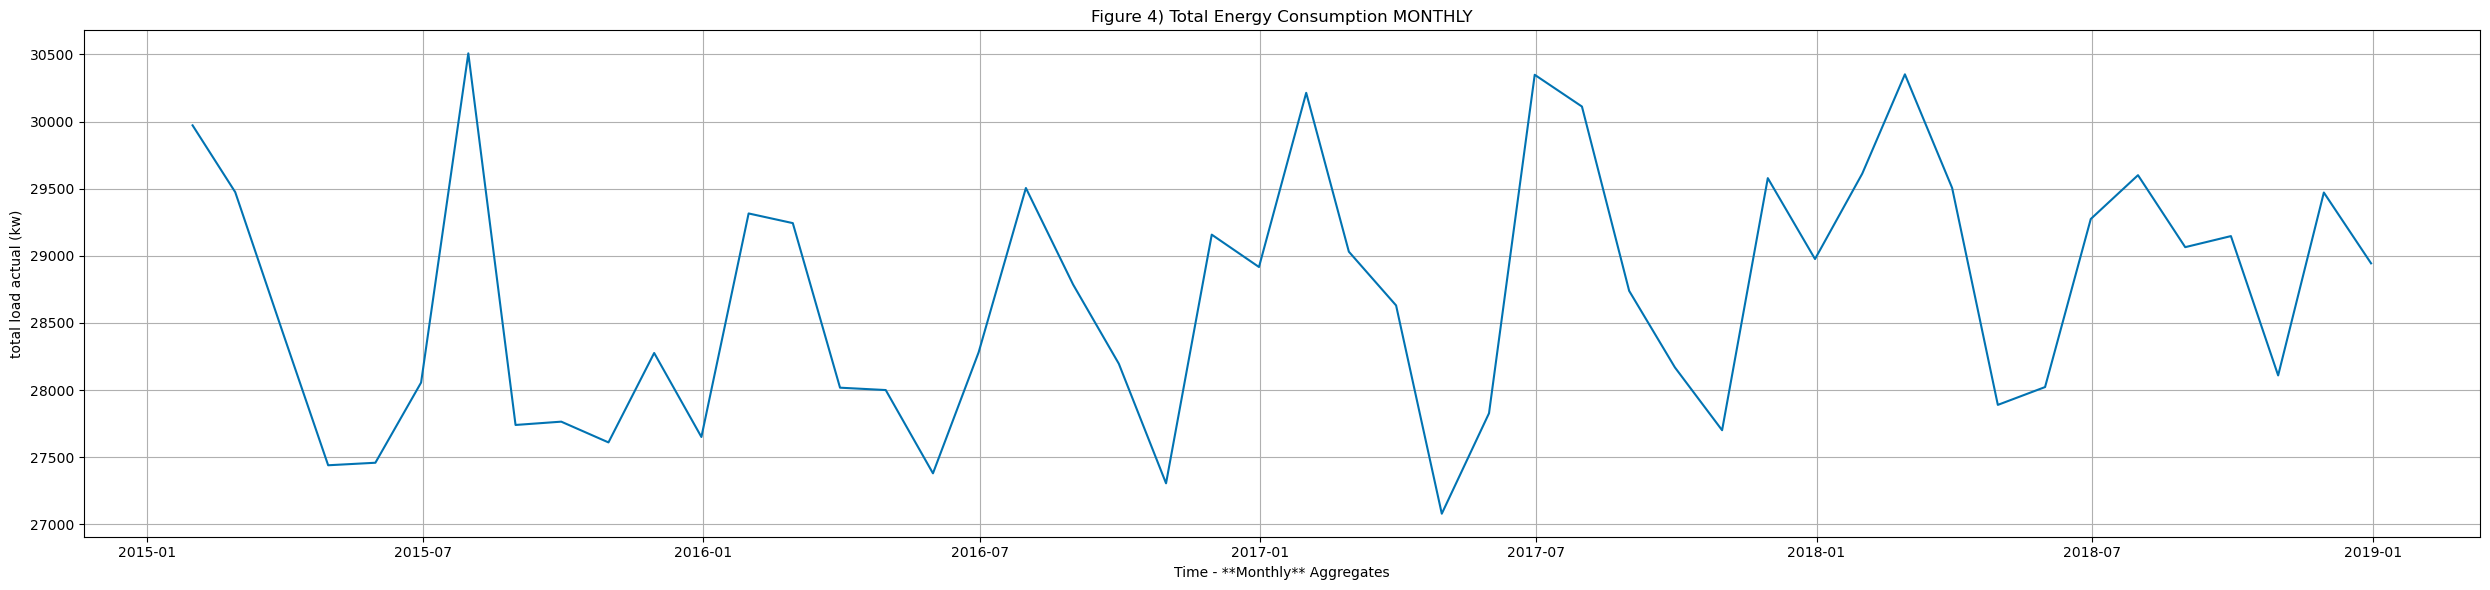

In [39]:
# Plot monthly data
plt.figure(figsize=(25, 6))
plt.plot(merged_df_monthly.index, merged_df_monthly['total load actual'], color= dark_blue, marker='', linestyle='-')
plt.xlabel('Time - **Monthly** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 4) Total Energy Consumption MONTHLY')
plt.grid(True)
plt.tight_layout()
plt.show()

## Result Aggregation: Aggregate to Daily Level
Based on the visual analysis, the team decides to aggregate the data to a daily format based on the advantages named above.


We therefore reduced the overall amount of data from orginially 178161 rows to 1461 rows. (-99,2%)

**Results:** A good trade off, reducing size by 99,2% by still having daily granularity

In [40]:
merged_df.shape

(178161, 56)

In [41]:
merged_df_daily.shape

(1461, 53)

In [42]:
merged_df_daily = merged_df_daily.reset_index()

In [43]:
merged_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         1461 non-null   datetime64[ns]
 1   generation biomass                           1461 non-null   float64       
 2   generation fossil brown coal/lignite         1461 non-null   float64       
 3   generation fossil coal-derived gas           1461 non-null   float64       
 4   generation fossil gas                        1461 non-null   float64       
 5   generation fossil hard coal                  1461 non-null   float64       
 6   generation fossil oil                        1461 non-null   float64       
 7   generation fossil oil shale                  1461 non-null   float64       
 8   generation fossil peat                       1461 non-null   float64       
 9

# Sampling

The issue with sampling for the energy dataset was not neglected.
However, the found datasets published at Kaggle already represent an sample over four years.

As seen in the image below coming from the book "Introduction to Data Mining", granularity reduction was already performed using aggregation.
If you compare this sampling representation with the charts Fig 1) 2) 3), the user can observe that structural reduction already took place.

Moreover, the usual sampling techniques for weather data seemed not applicable for this approach.

Therefore, the team decided to not implement further sampling techniques

![Sampling in Book "Introduction to Data Mining showing granularity"](Book_Example_Sampling.png)

# Dimensionality Reduction
We will make a correlation matrix first to see if there are:
1. Target Variable: If there is a strong correlation between Dimension and our Target Variable (Total Load Actual)
2. See if some Columns can be dropped because of 0.0 Values (there are not empty but have no significant information - "nan" in correlation matrix
3. Check correlation between Dimensions with high correlations to our Target Variable (cross-dimensionality)

In [44]:
merged_df_daily.corr().style.background_gradient(cmap = 'cividis')

In [45]:
# First of All delete all nan columns since no information about the relevance can be retrieved
merged_df_daily.drop(columns=['generation fossil coal-derived gas'], inplace=True)
merged_df_daily.drop(columns=['generation fossil oil shale'], inplace=True)
merged_df_daily.drop(columns=['generation fossil peat'], inplace=True)
merged_df_daily.drop(columns=['generation geothermal'], inplace=True)
merged_df_daily.drop(columns=['generation marine'], inplace=True)
merged_df_daily.drop(columns=['generation wind offshore'], inplace=True)

In [46]:
# Gives us a cleaner view of the Data necessary to identify correlations
merged_df_daily.corr().style.background_gradient(cmap = 'cividis')


In [47]:
# Create a variable to define the Target Variable
correlation_with_target = merged_df_daily.corrwith(merged_df_daily['total load actual'])

# Create a DataFrame with correlation values
correlation_matrix = pd.DataFrame(correlation_with_target, columns=['correlation_with_target'])

# Sort the correlations
correlation_matrix_sorted = correlation_matrix.sort_values(by='correlation_with_target', ascending=False)

## Visual intermediate Result
It seems that for positve correlation:
- the input from utility companies estimating how much was produced is a good indicator for forecasting (obviously)
- It also shows a strong correlation of consumption and price
- It shows a negative correlation with hydro pump storage consumption (need to investigate)
- maany descriptions of weather phenomenas only have a very weak correlation --> however this is spain, not ireland so it might be relevant for stakeholders to consider such variables

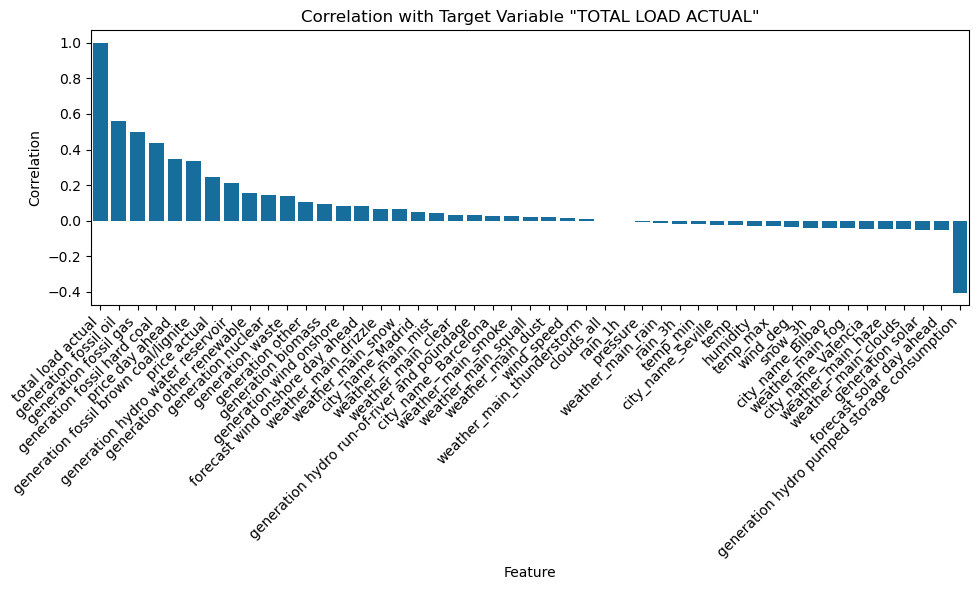

In [48]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_sorted.index, y='correlation_with_target', data=correlation_matrix_sorted, color = dark_blue)
plt.title('Correlation with Target Variable "TOTAL LOAD ACTUAL"')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
merged_df_daily.describe().T.style.background_gradient(cmap = 'cividis')

In [50]:
merged_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         1461 non-null   datetime64[ns]
 1   generation biomass                           1461 non-null   float64       
 2   generation fossil brown coal/lignite         1461 non-null   float64       
 3   generation fossil gas                        1461 non-null   float64       
 4   generation fossil hard coal                  1461 non-null   float64       
 5   generation fossil oil                        1461 non-null   float64       
 6   generation hydro pumped storage consumption  1461 non-null   float64       
 7   generation hydro run-of-river and poundage   1461 non-null   float64       
 8   generation hydro water reservoir             1461 non-null   float64       
 9

# Descriptive Plotting

In [51]:
def create_plots(variable):
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 3, 1)
    variable.plot(kind = 'hist')
    plt.title(f'{variable.name} histogram plot')
    
    #mean = variable.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(variable)
    sns.distplot(variable) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '-', color = dark_blue, )
    plt.axvline(sigma, linestyle = '-', color = 'black')
    plt.title(f'{variable.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(variable)
    plt.title(f'{variable.name} box plot')
    plt.show()

In [52]:
merged_df_descriptive = merged_df_daily.drop(columns=["time"])

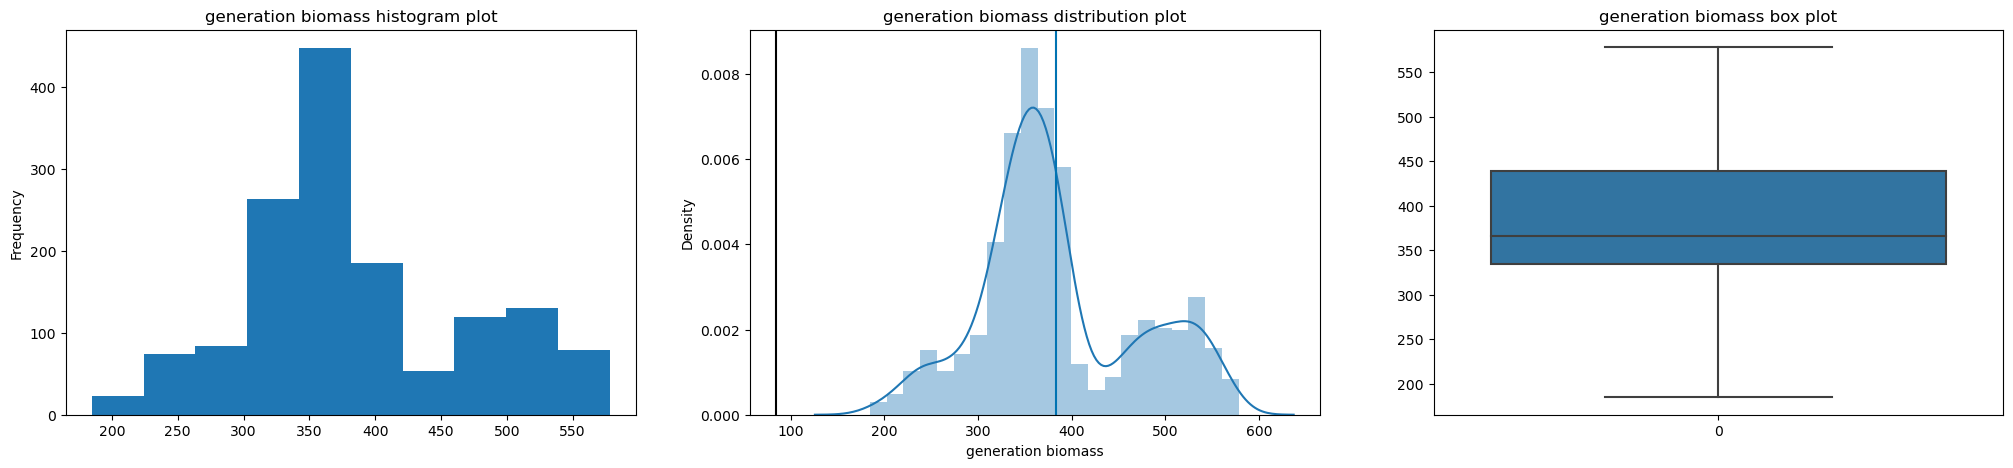

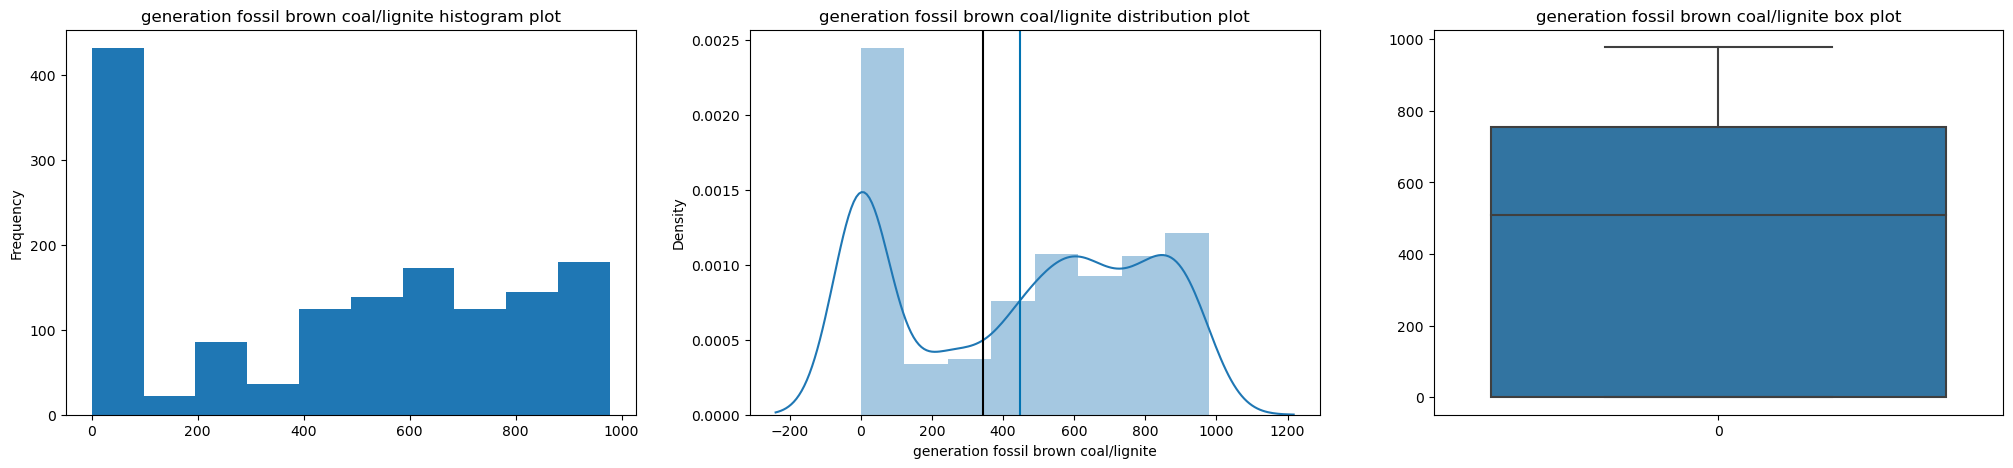

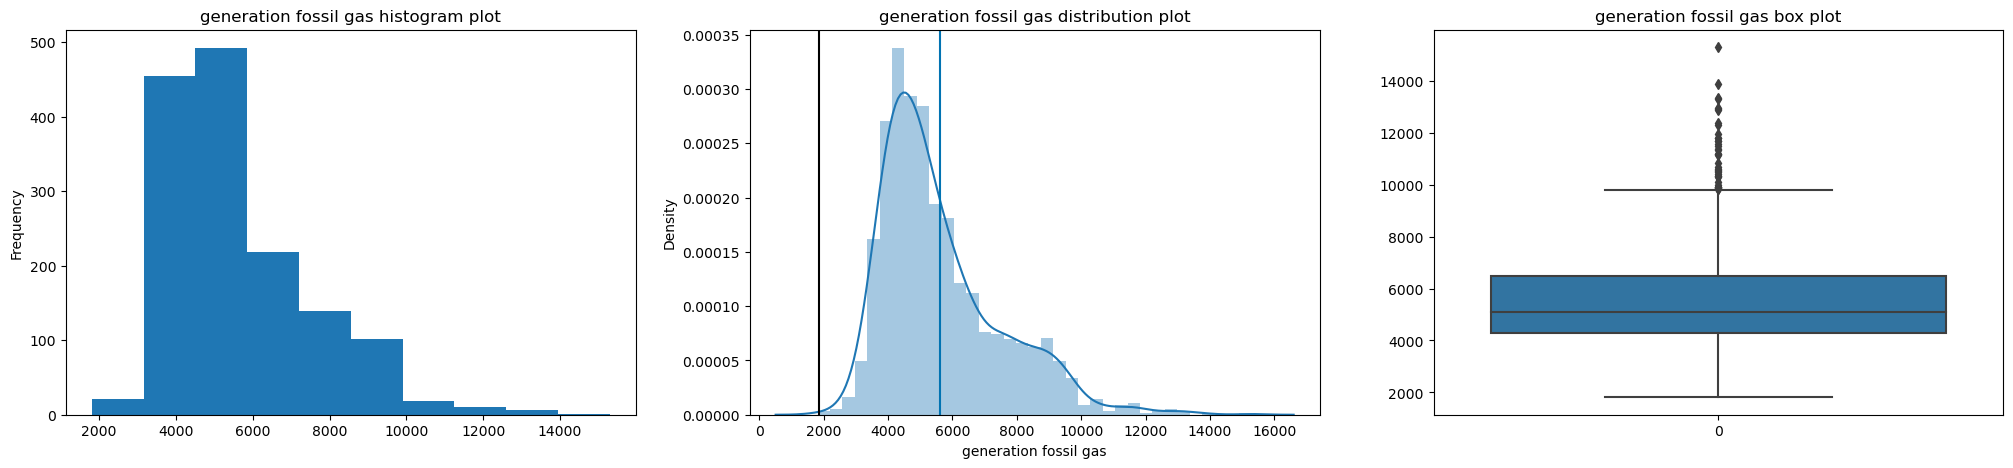

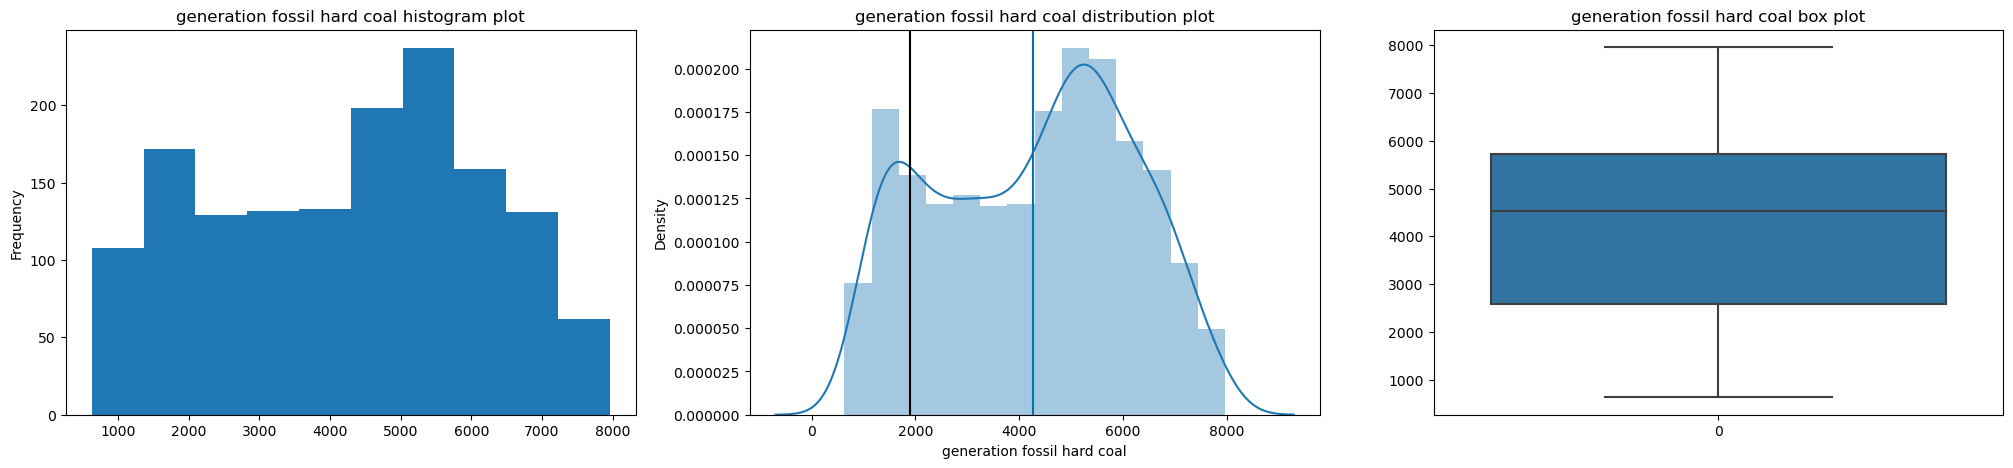

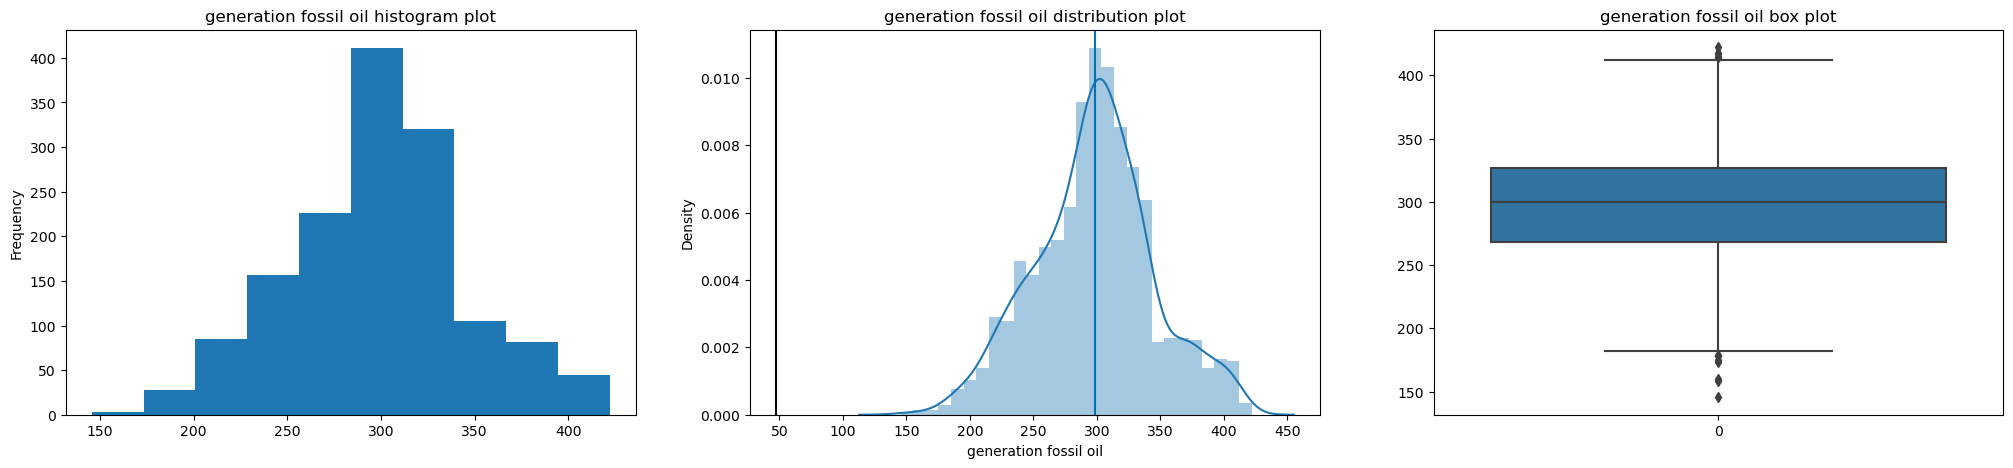

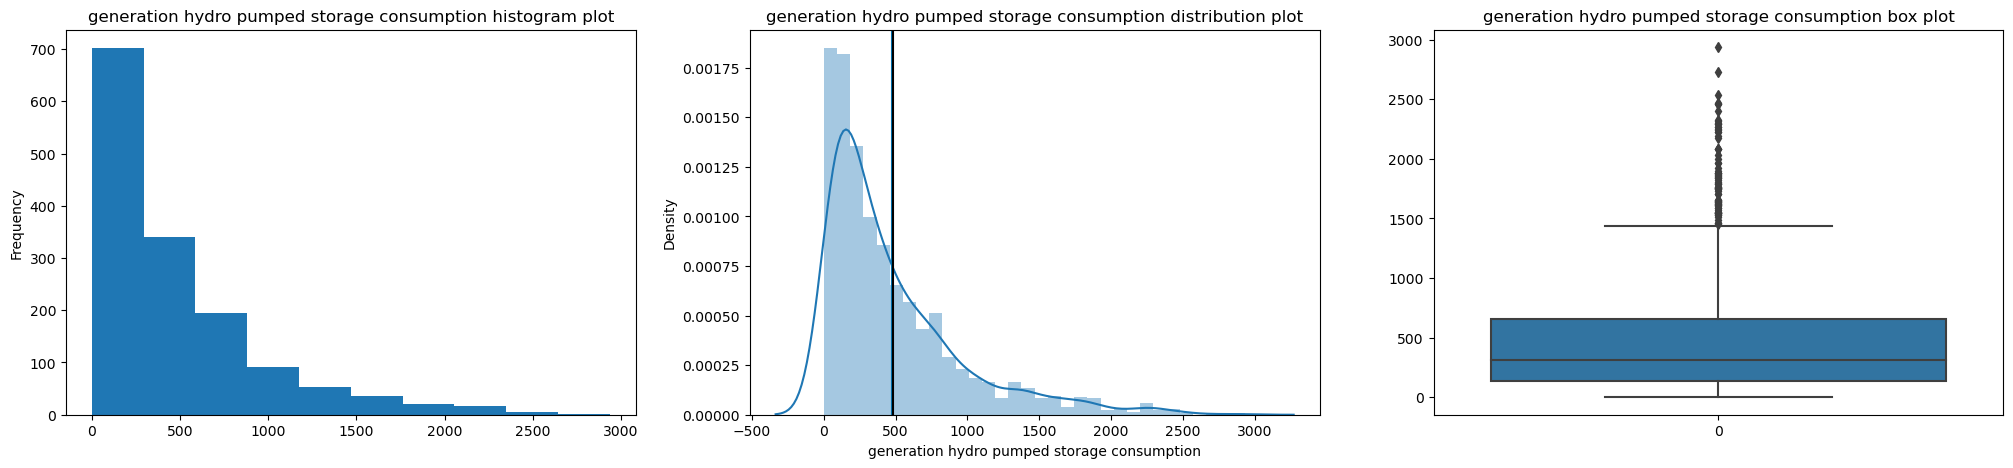

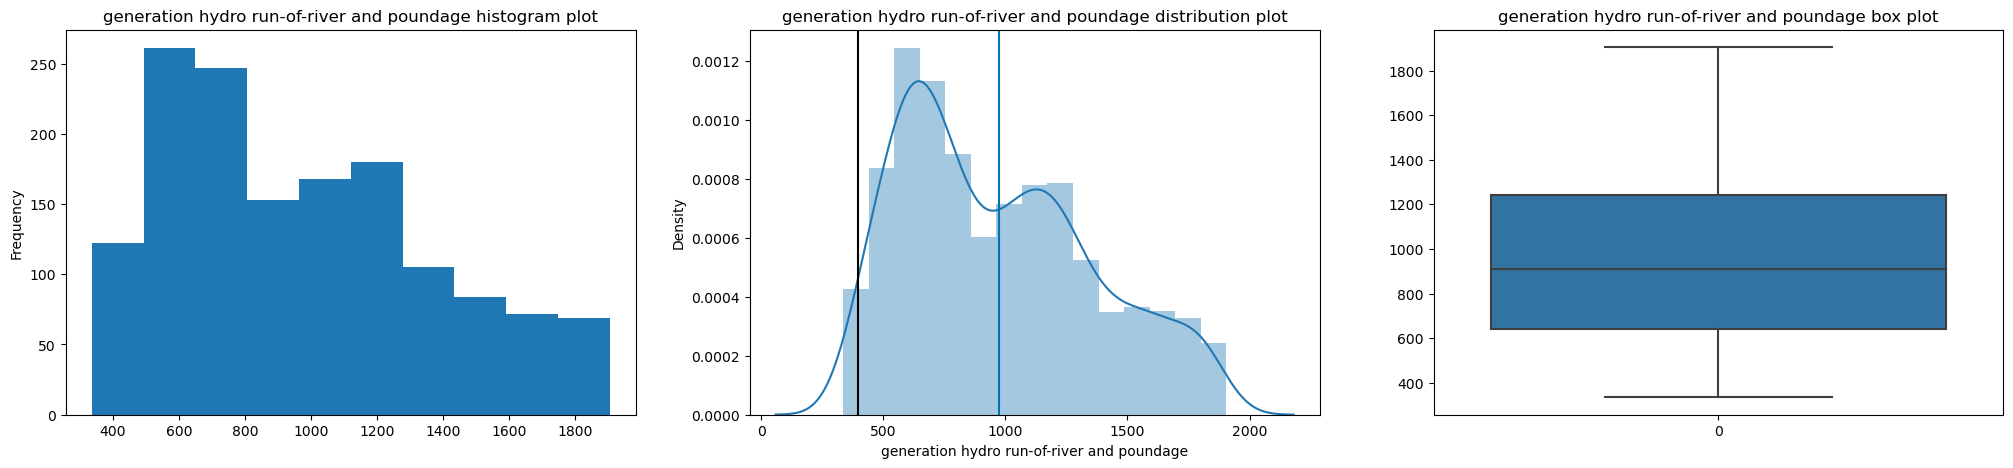

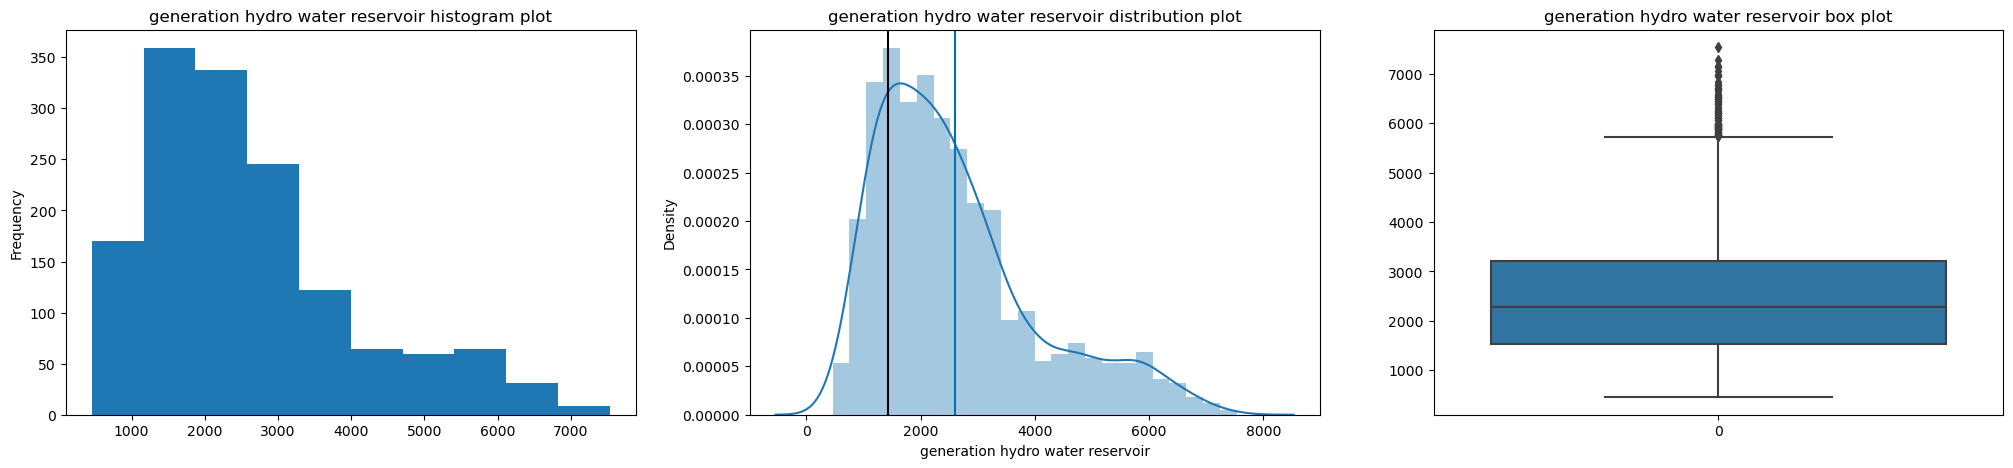

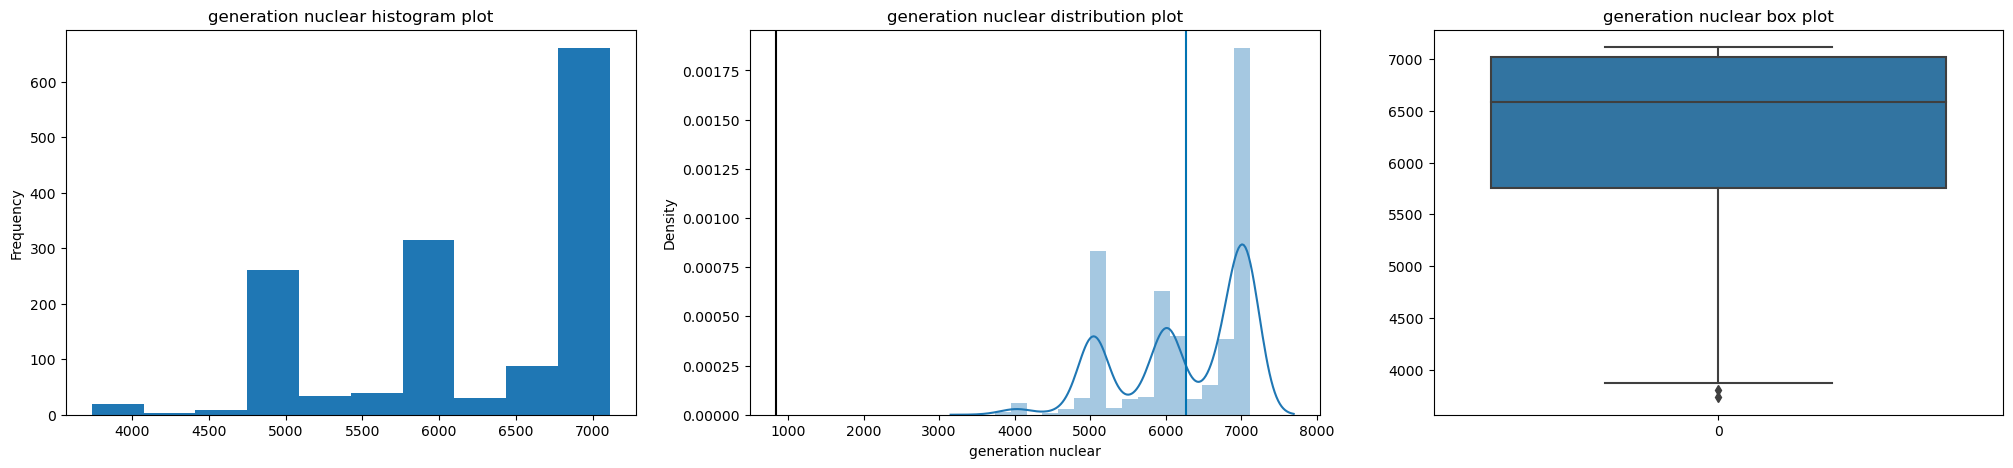

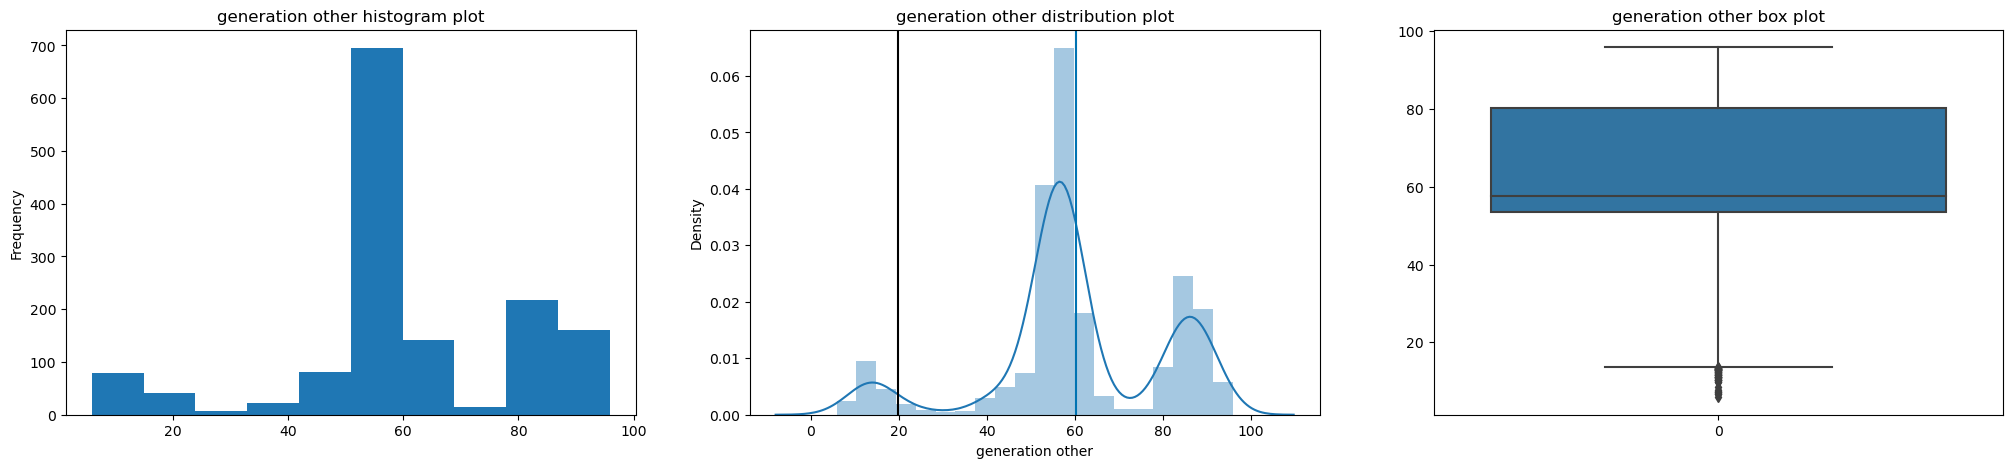

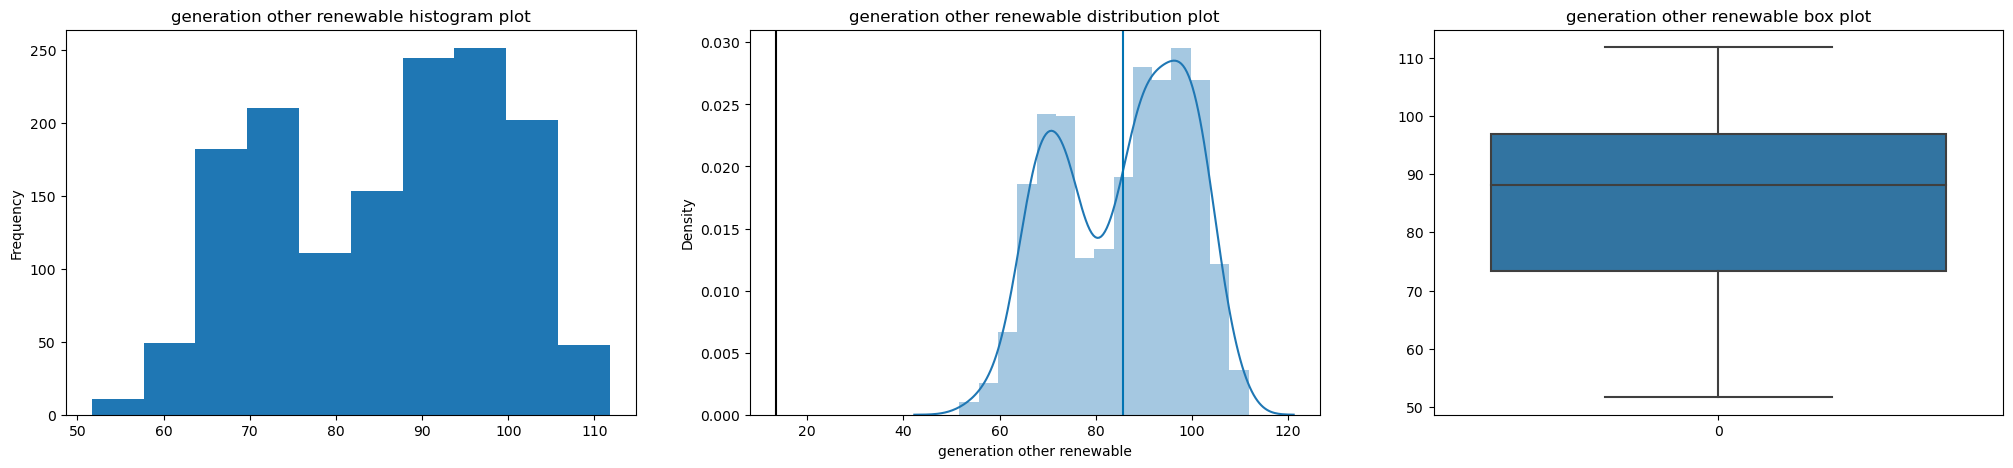

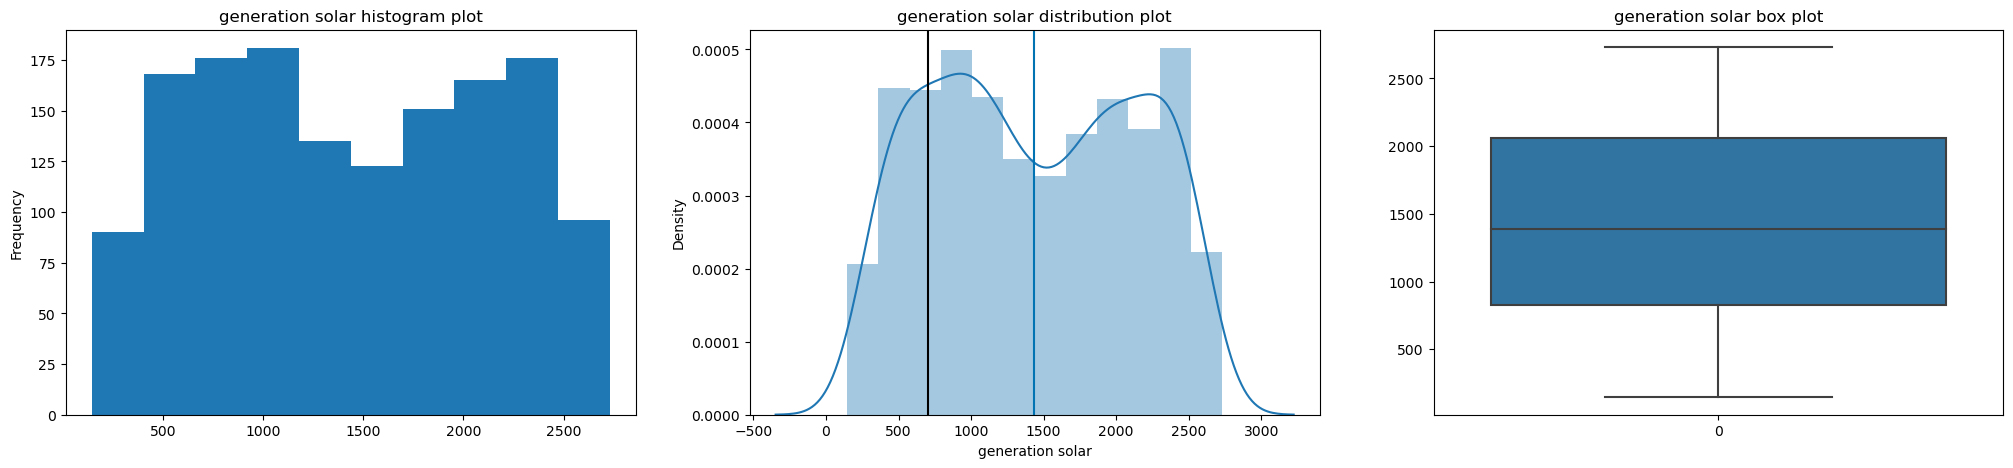

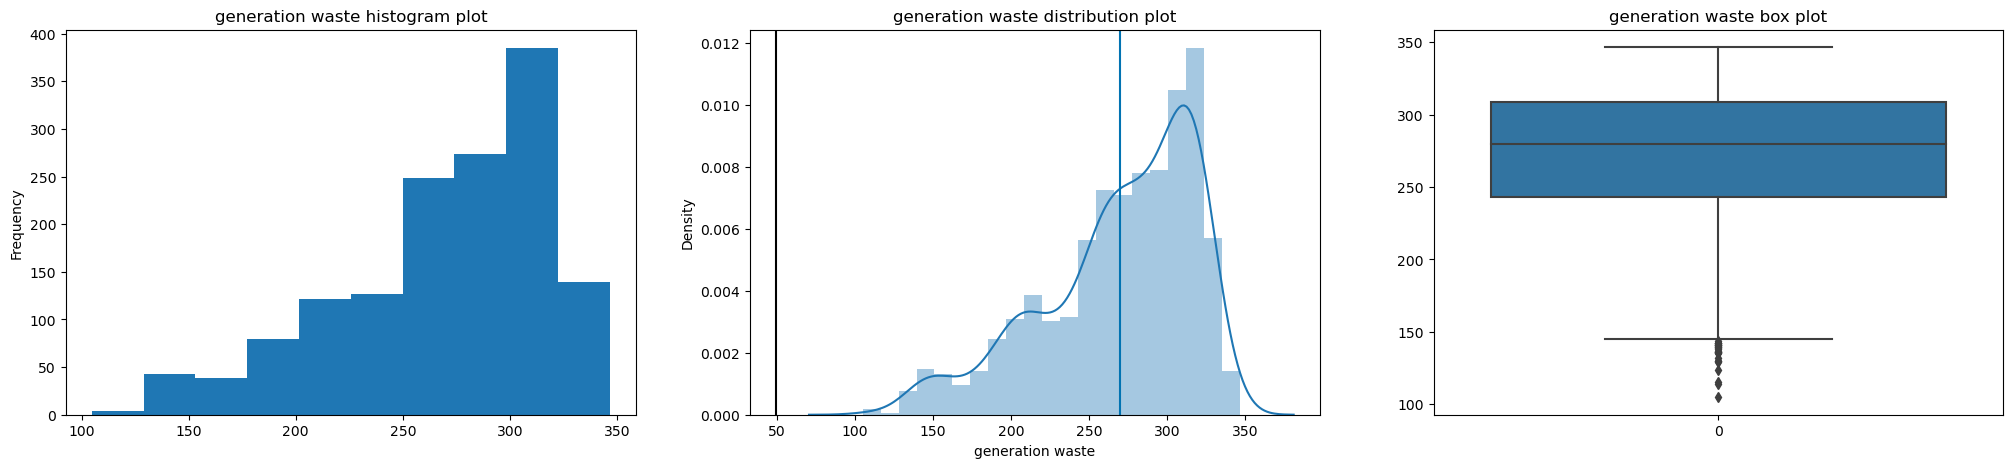

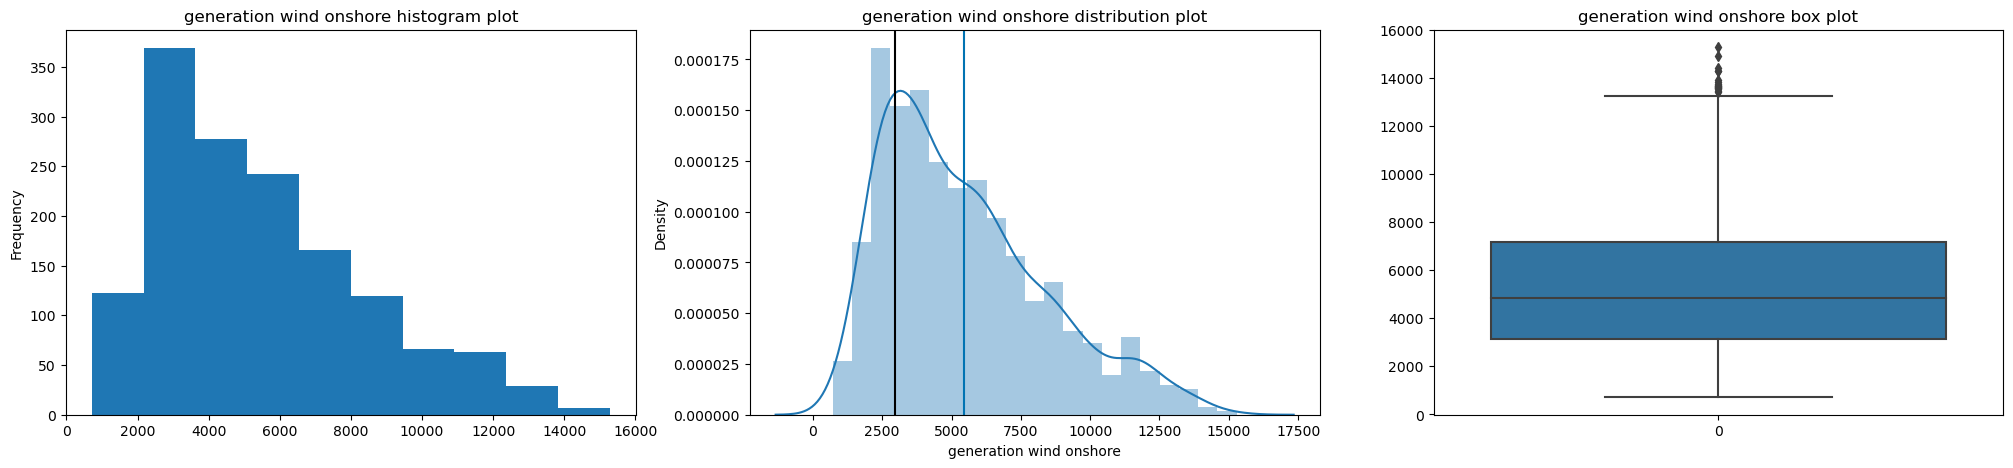

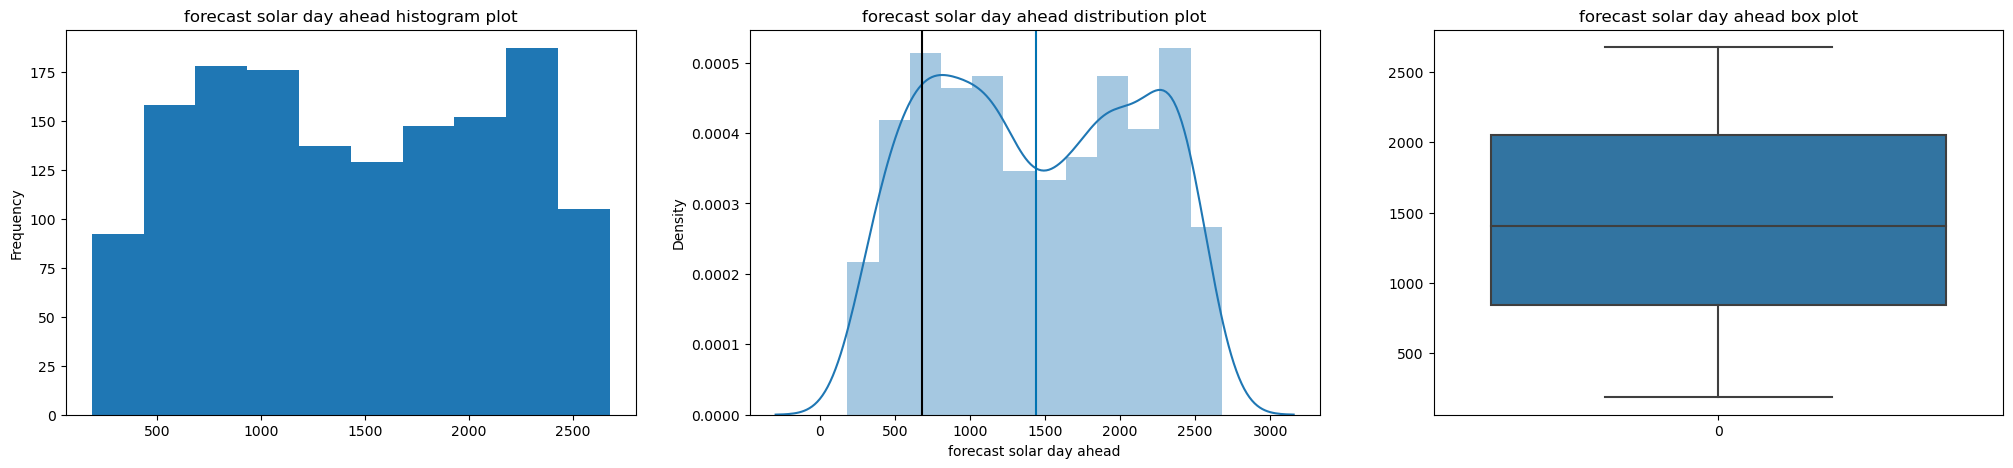

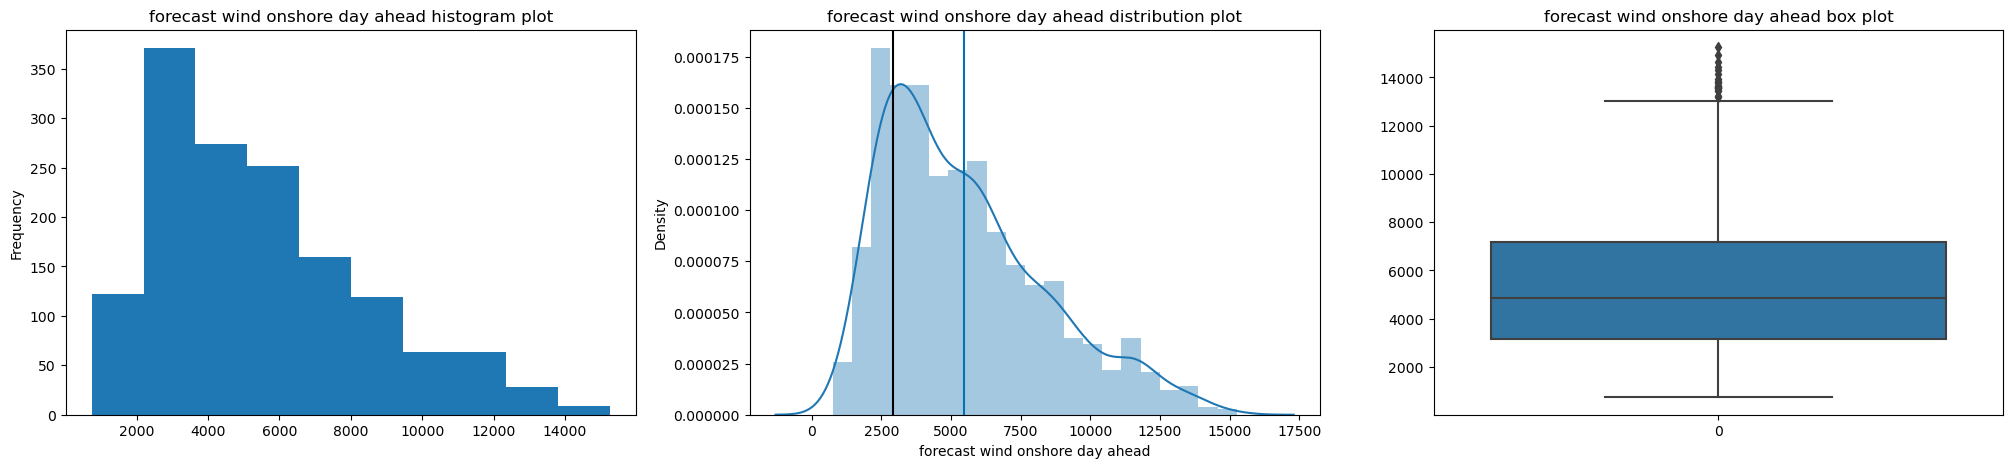

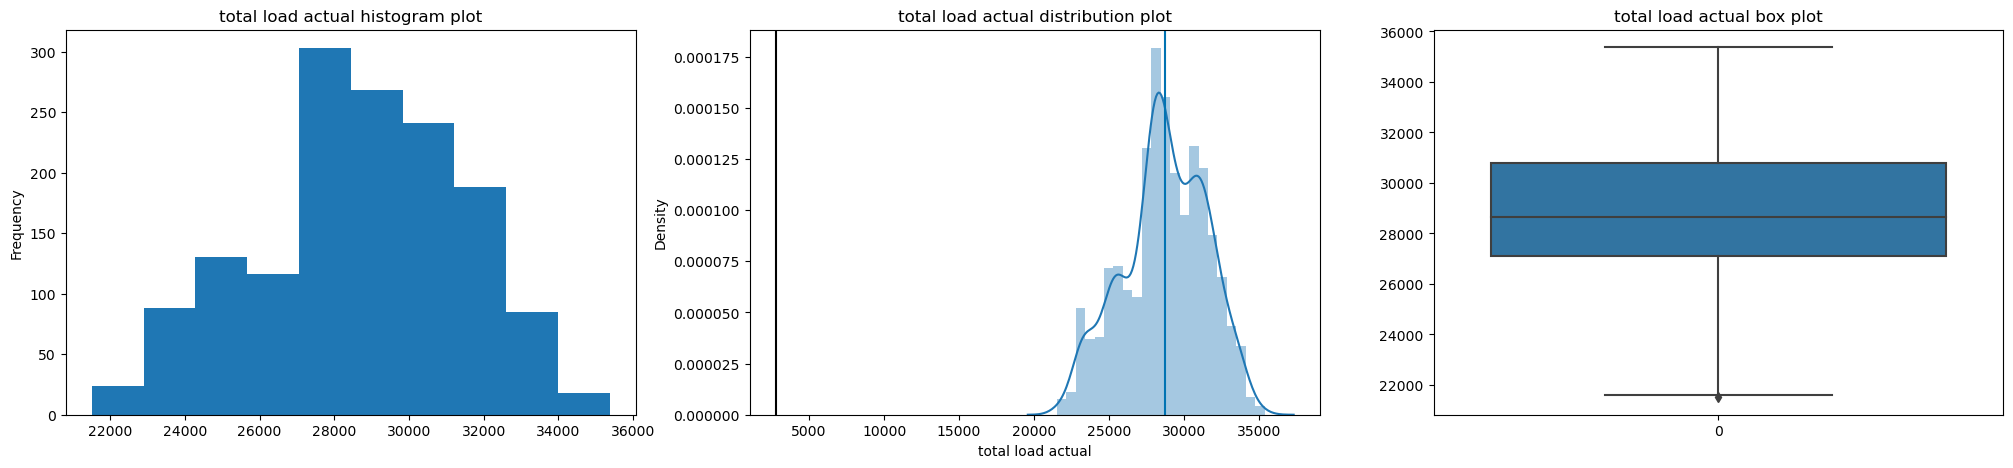

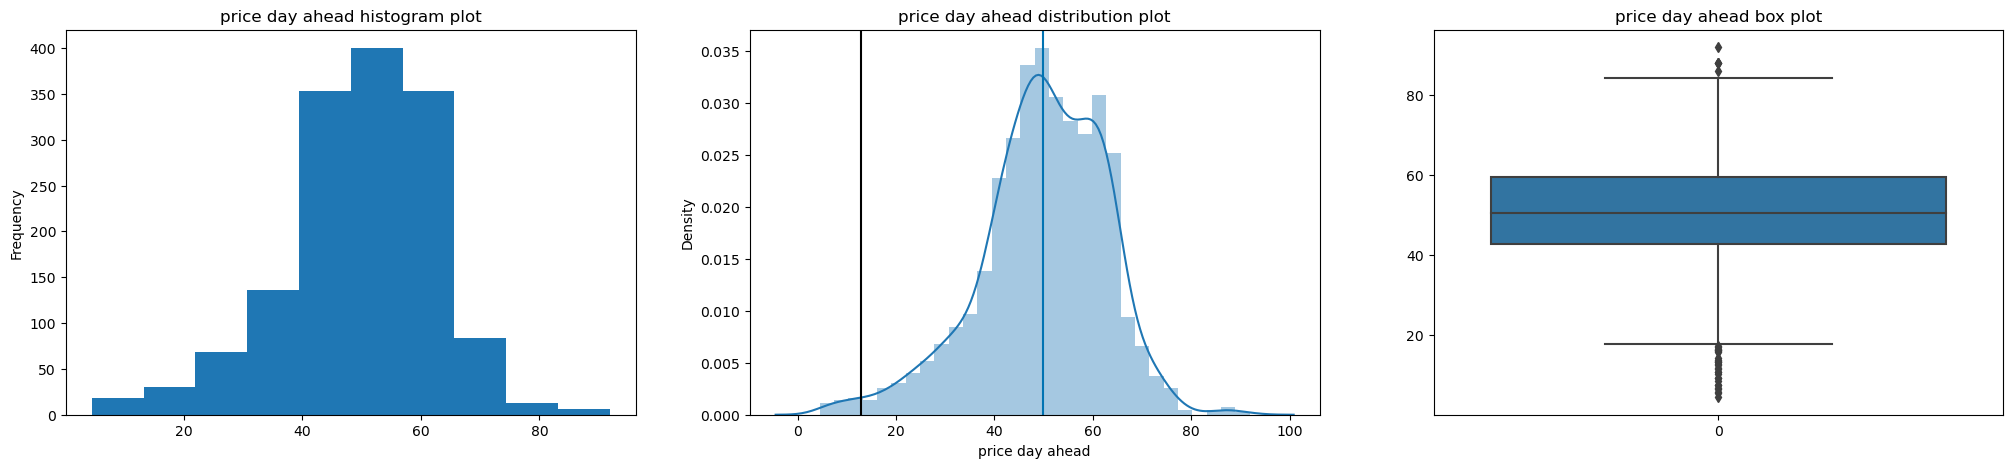

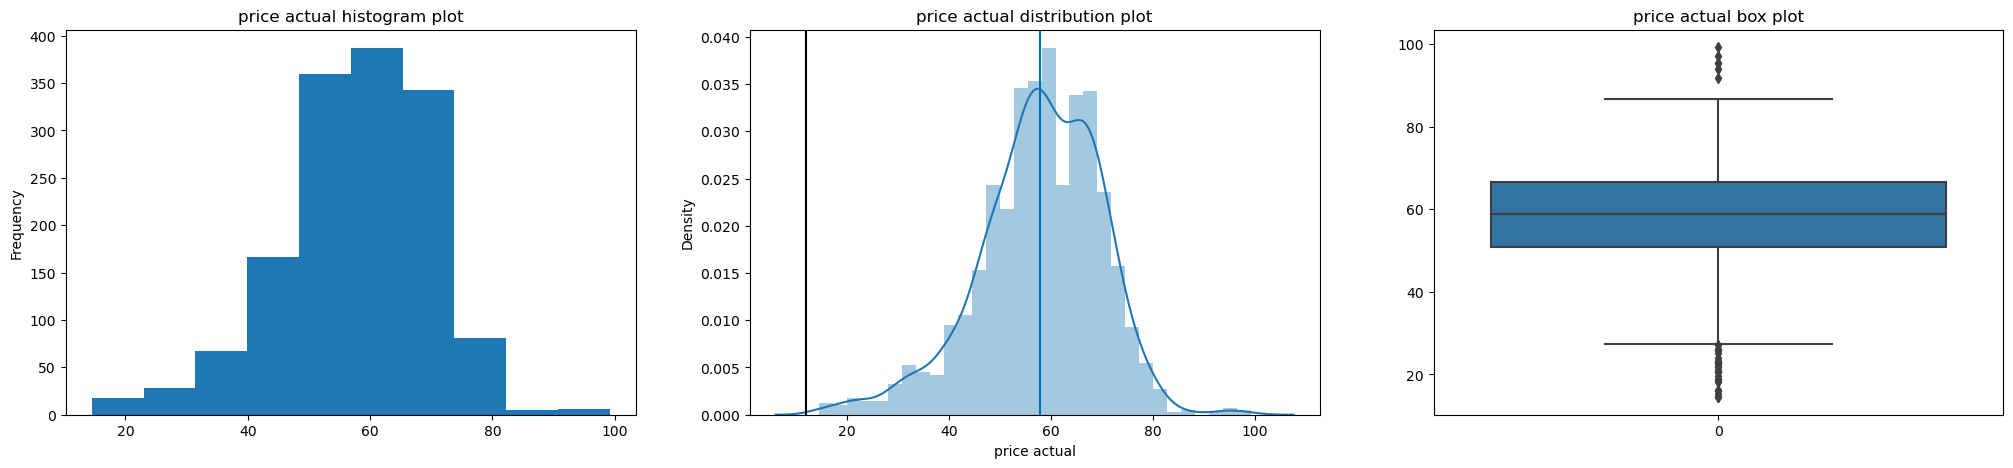

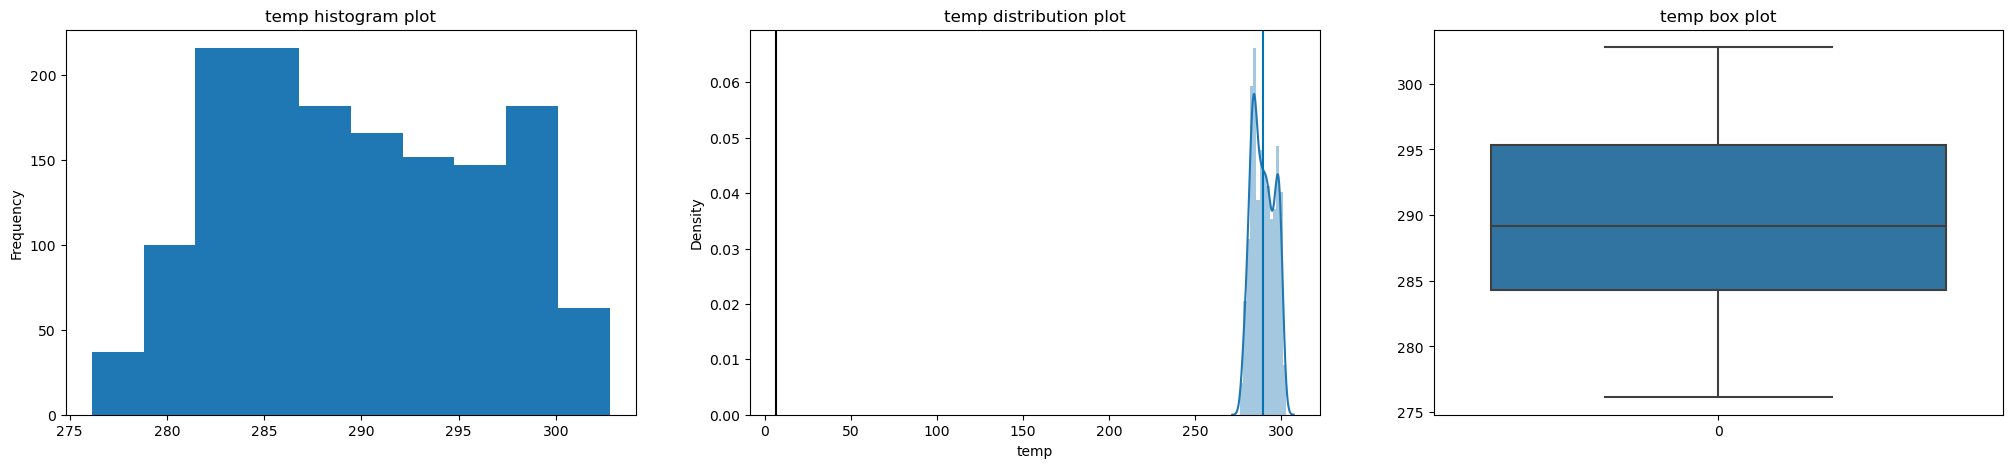

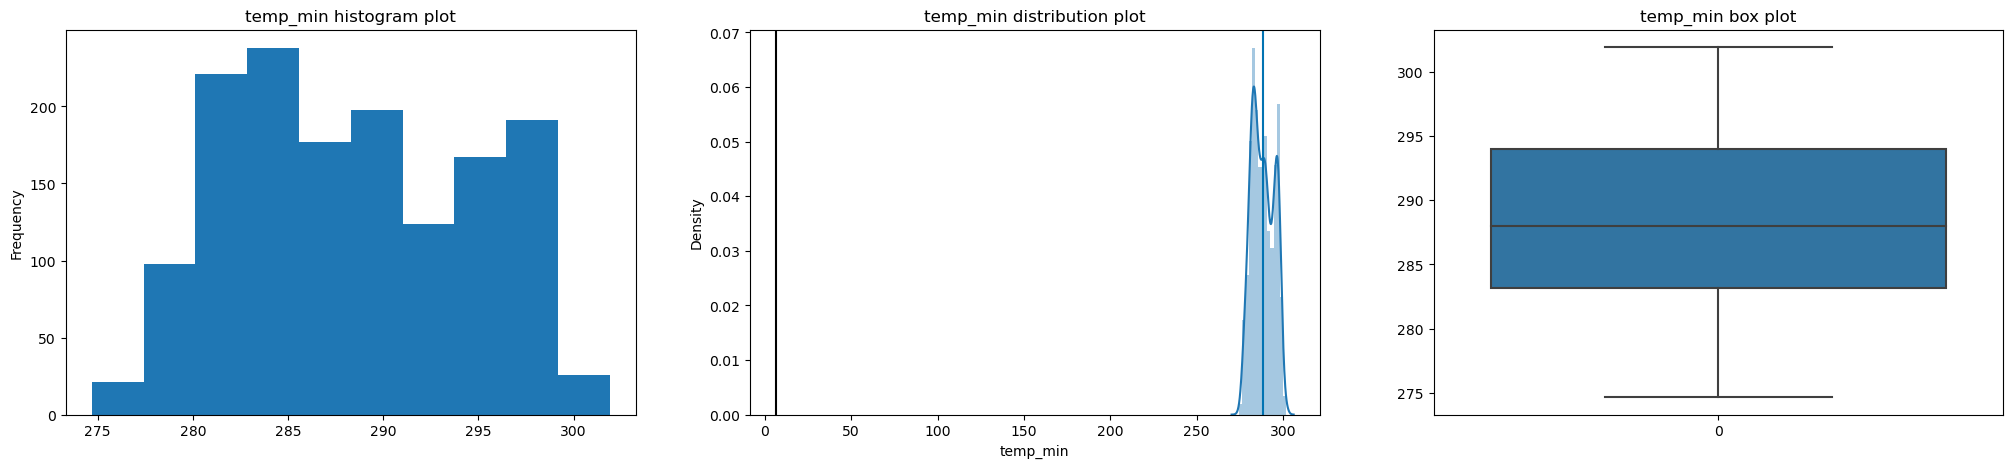

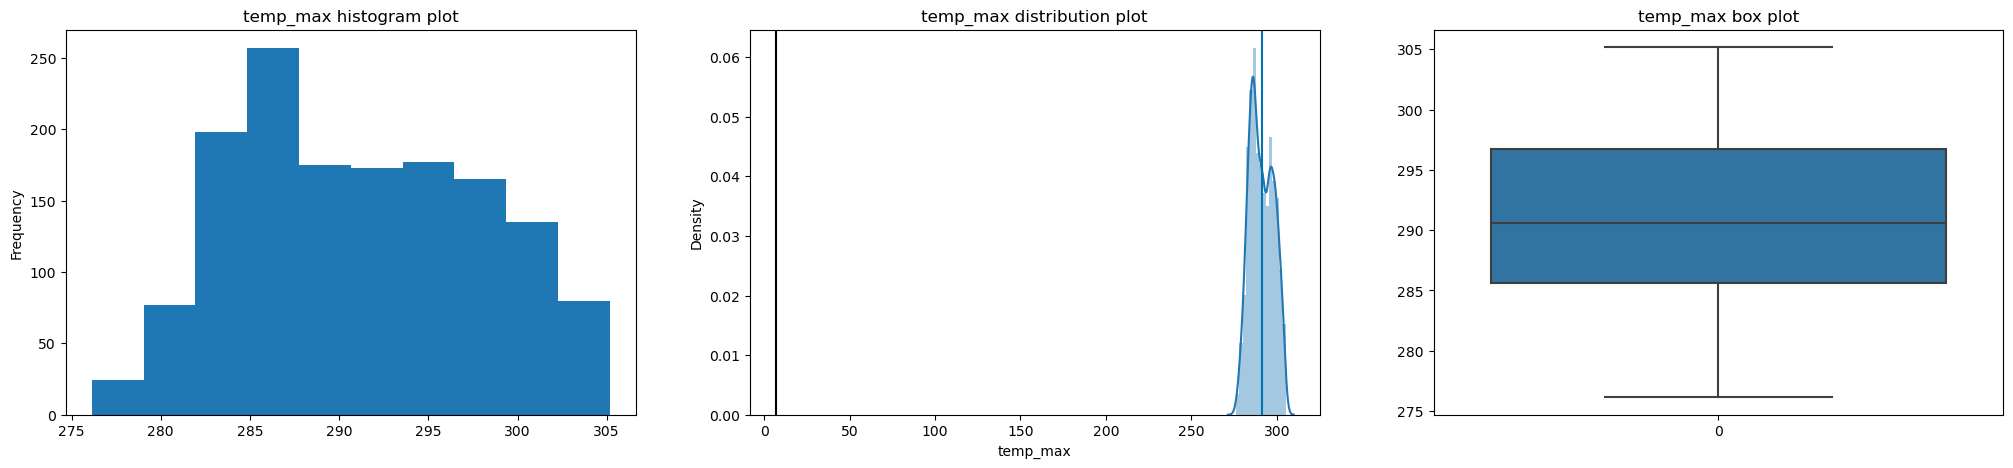

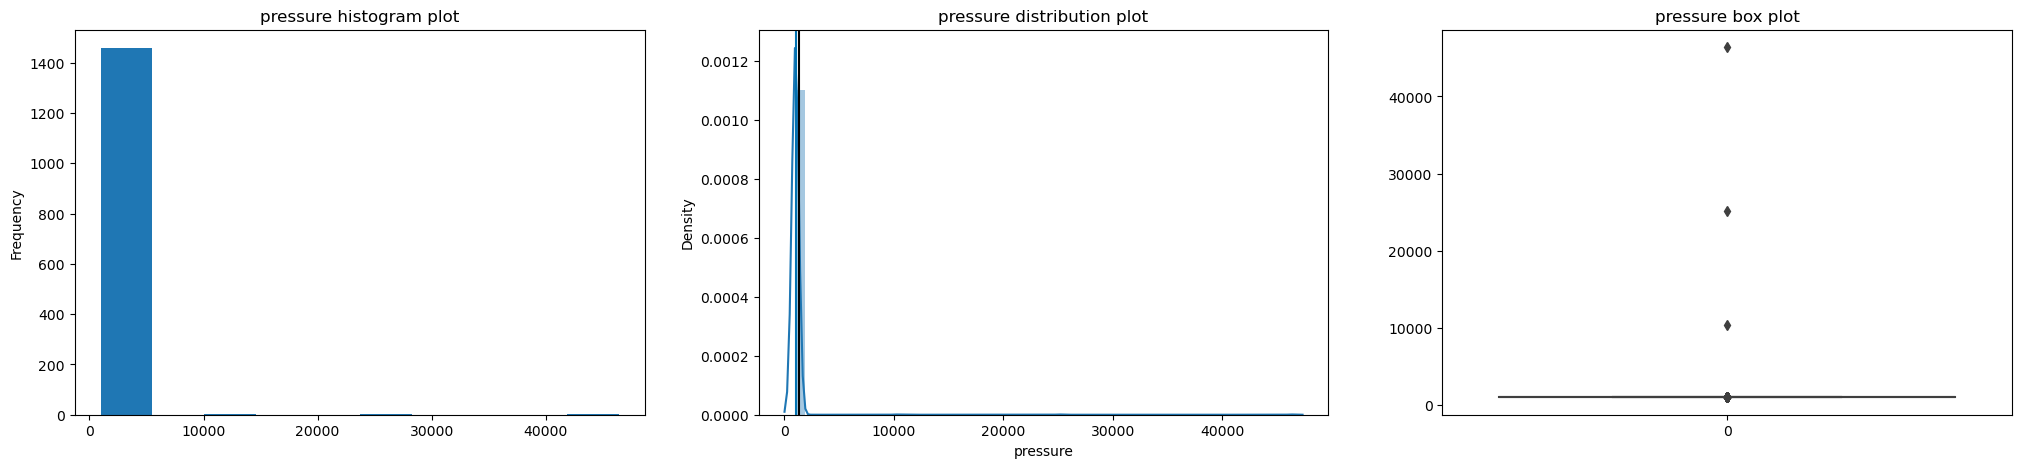

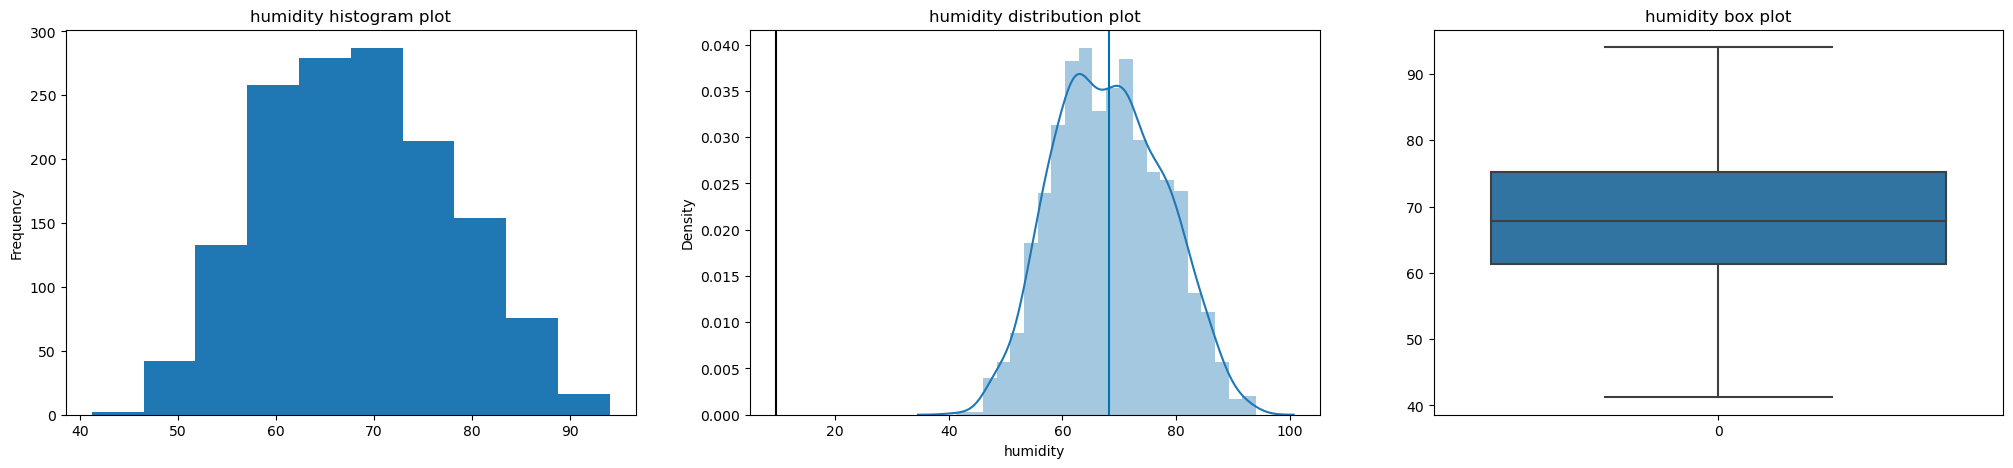

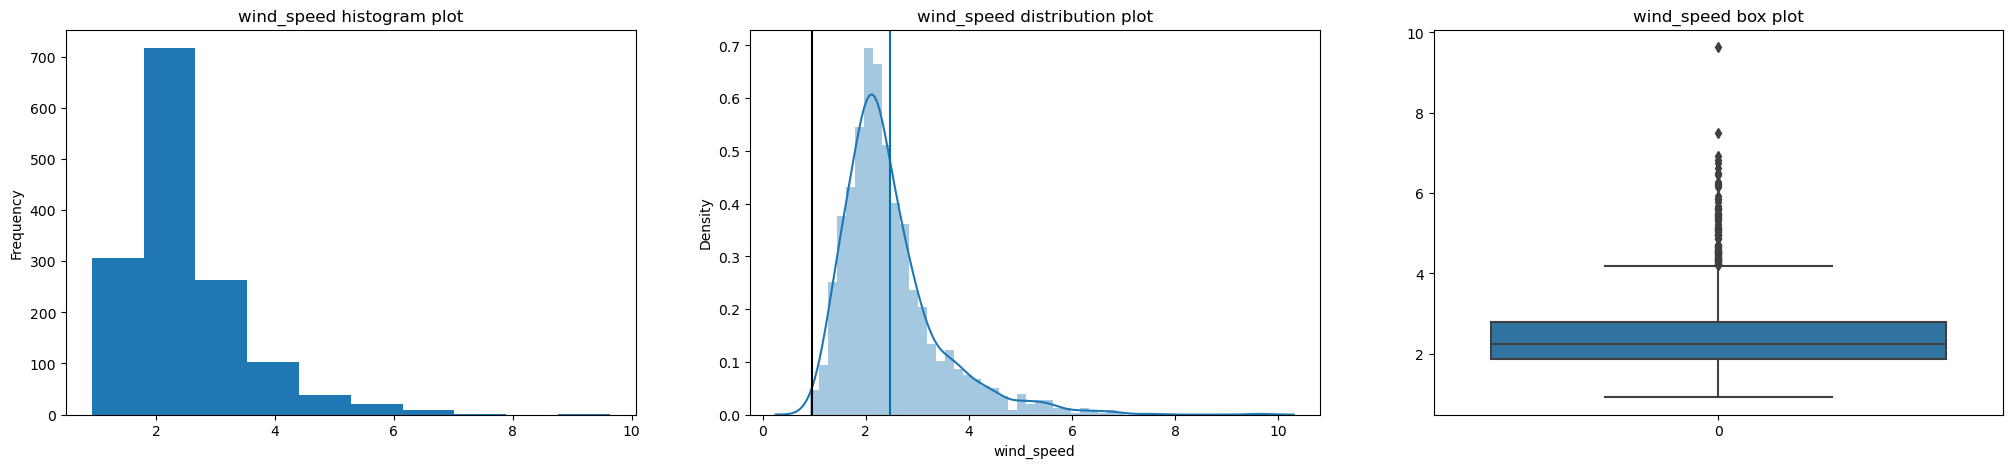

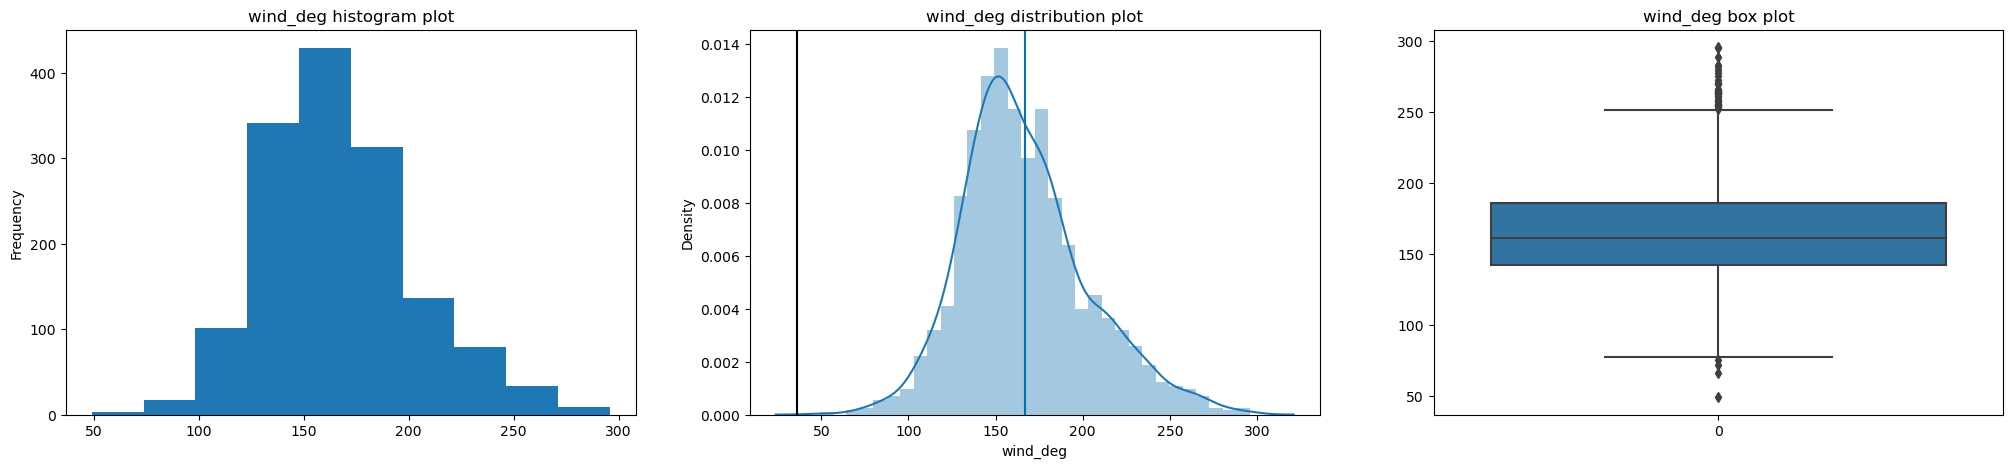

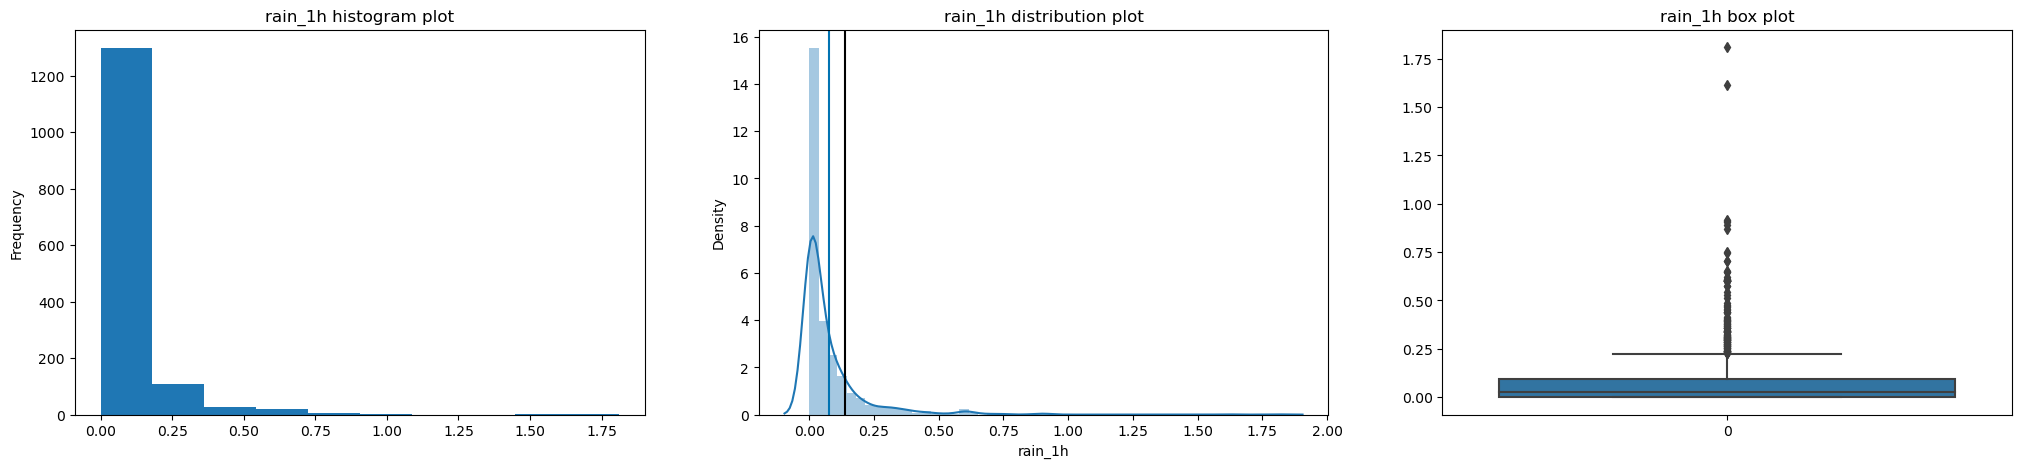

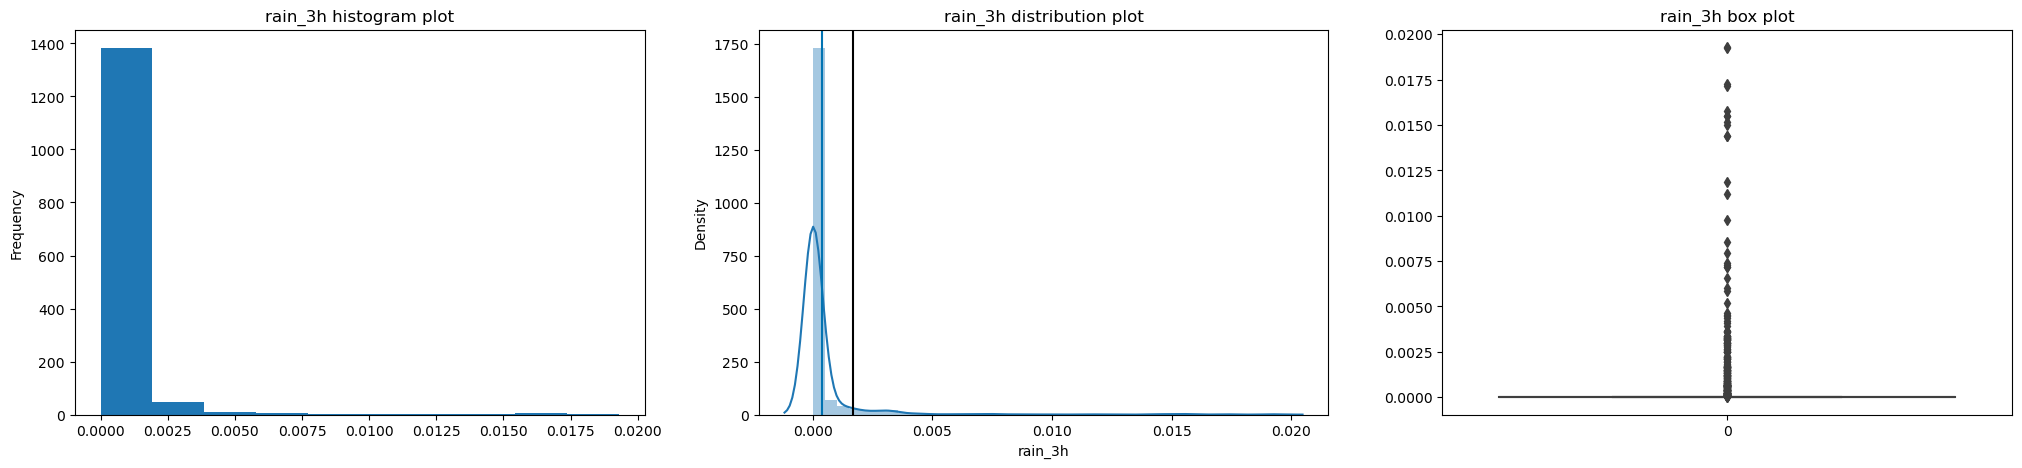

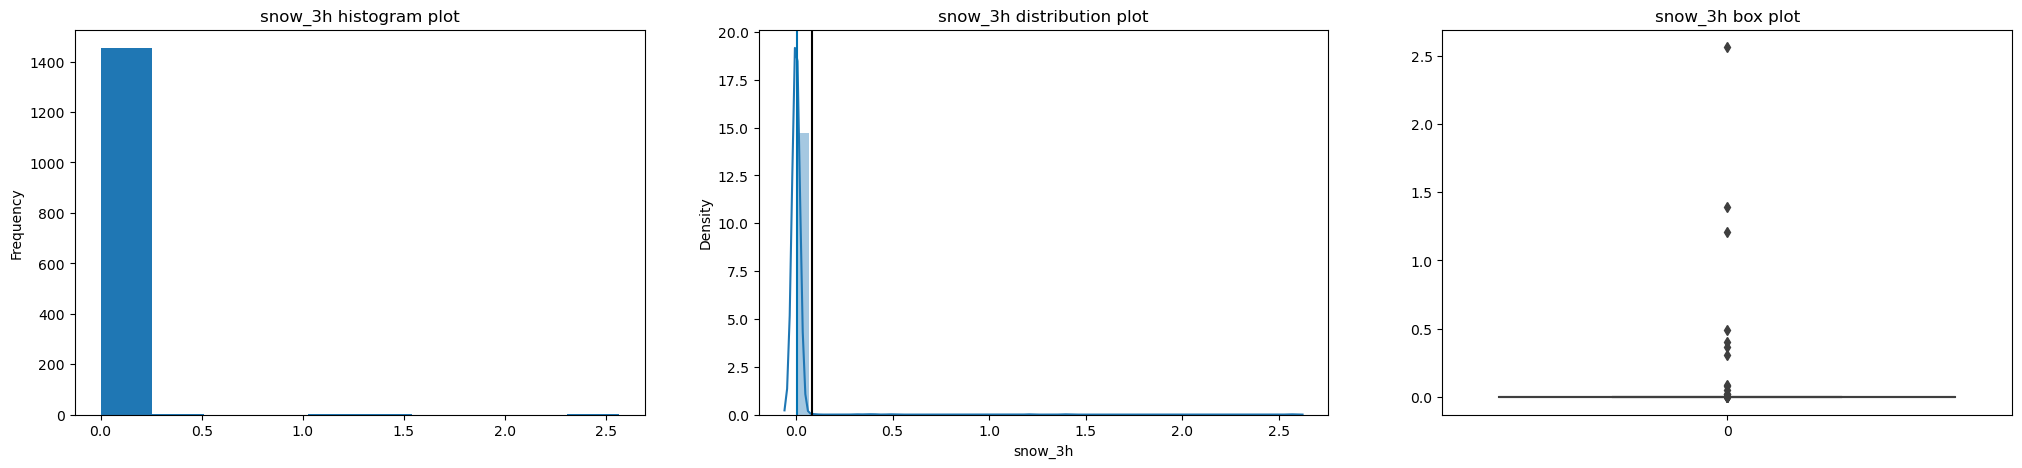

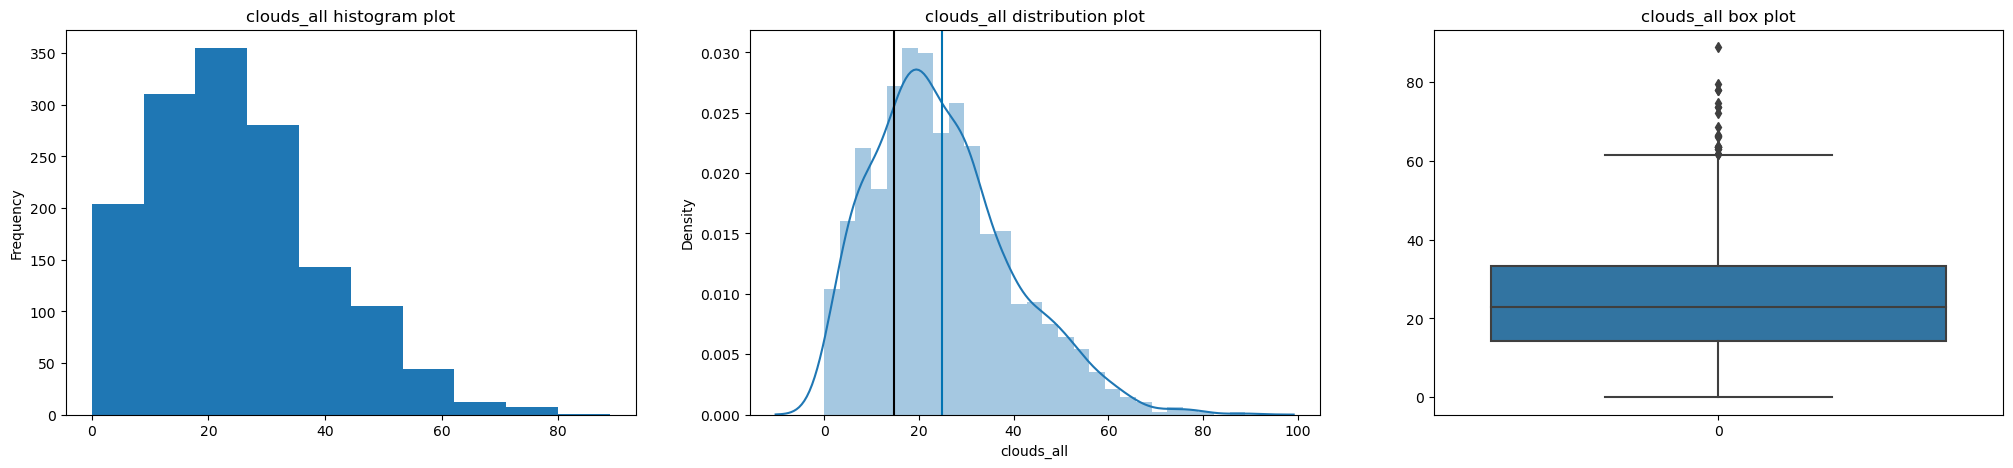

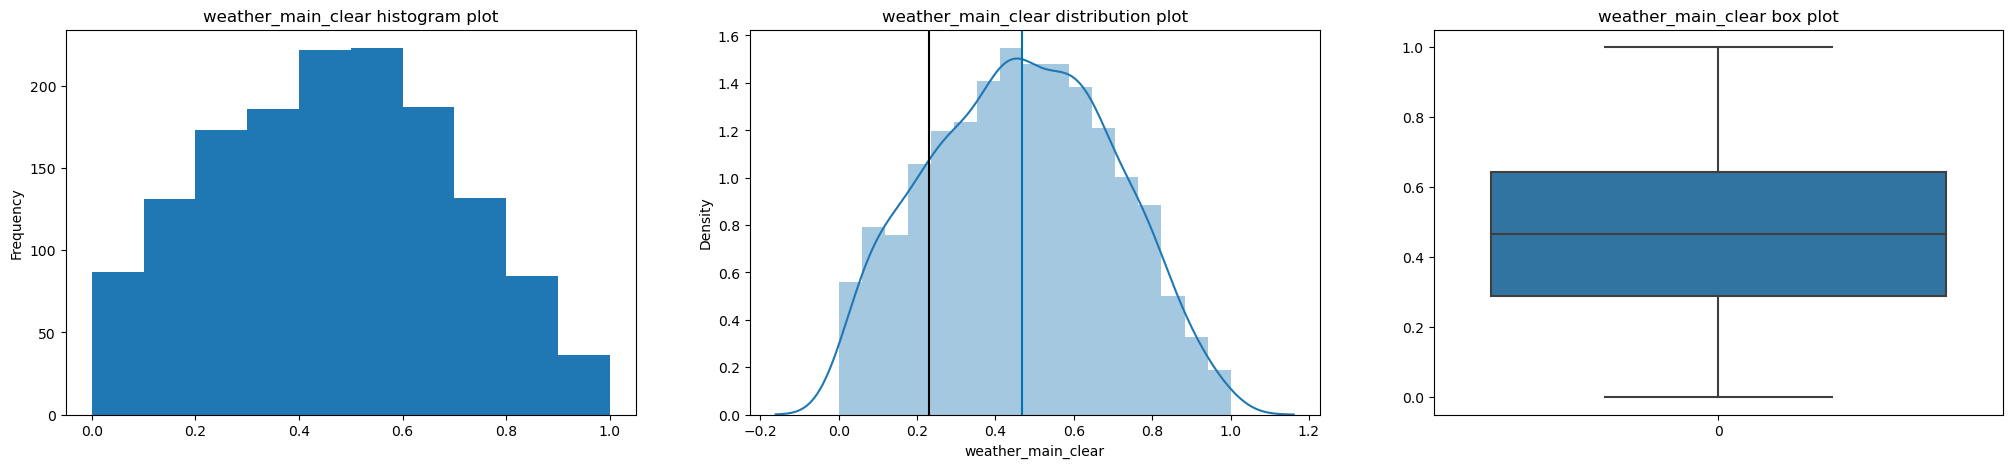

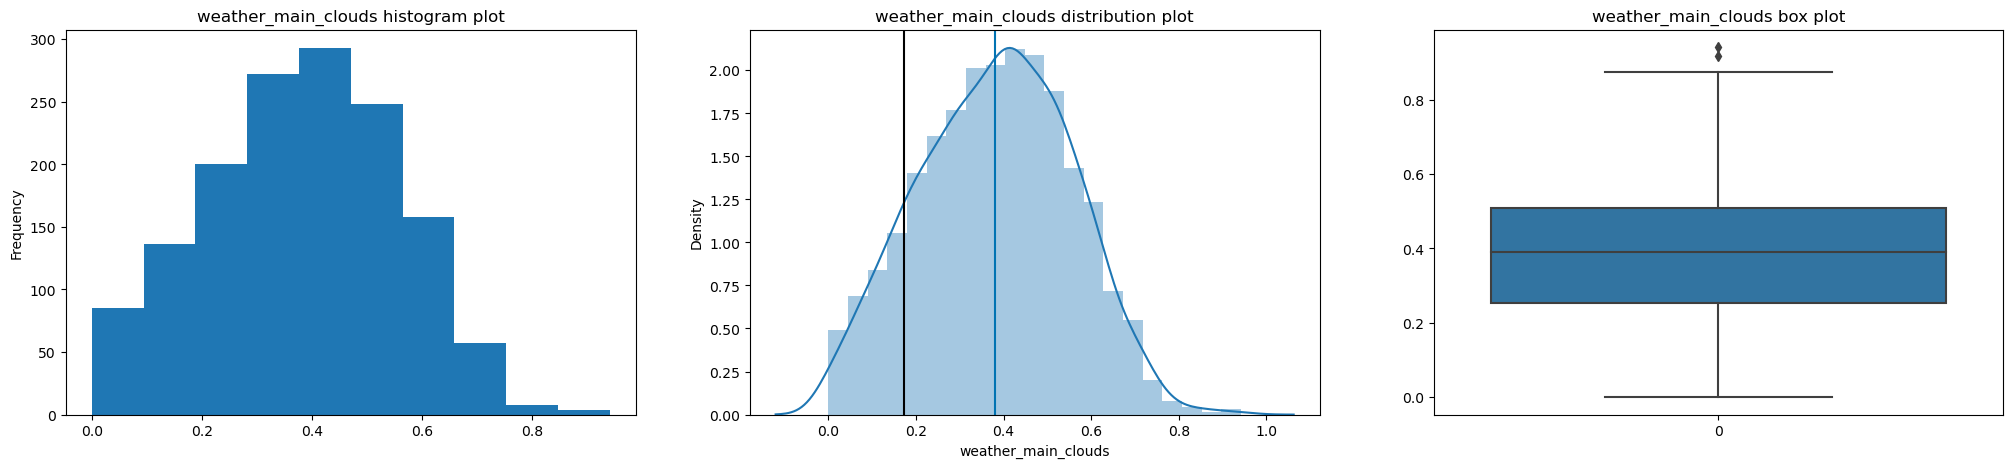

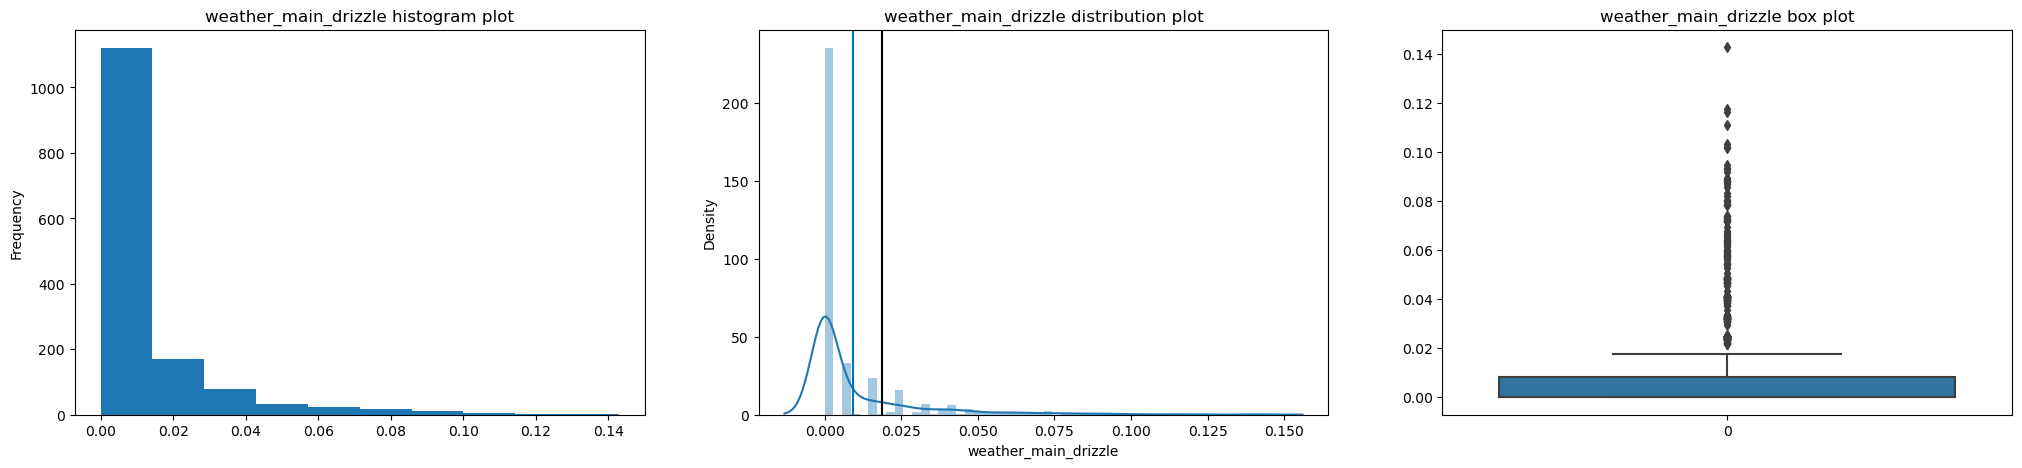

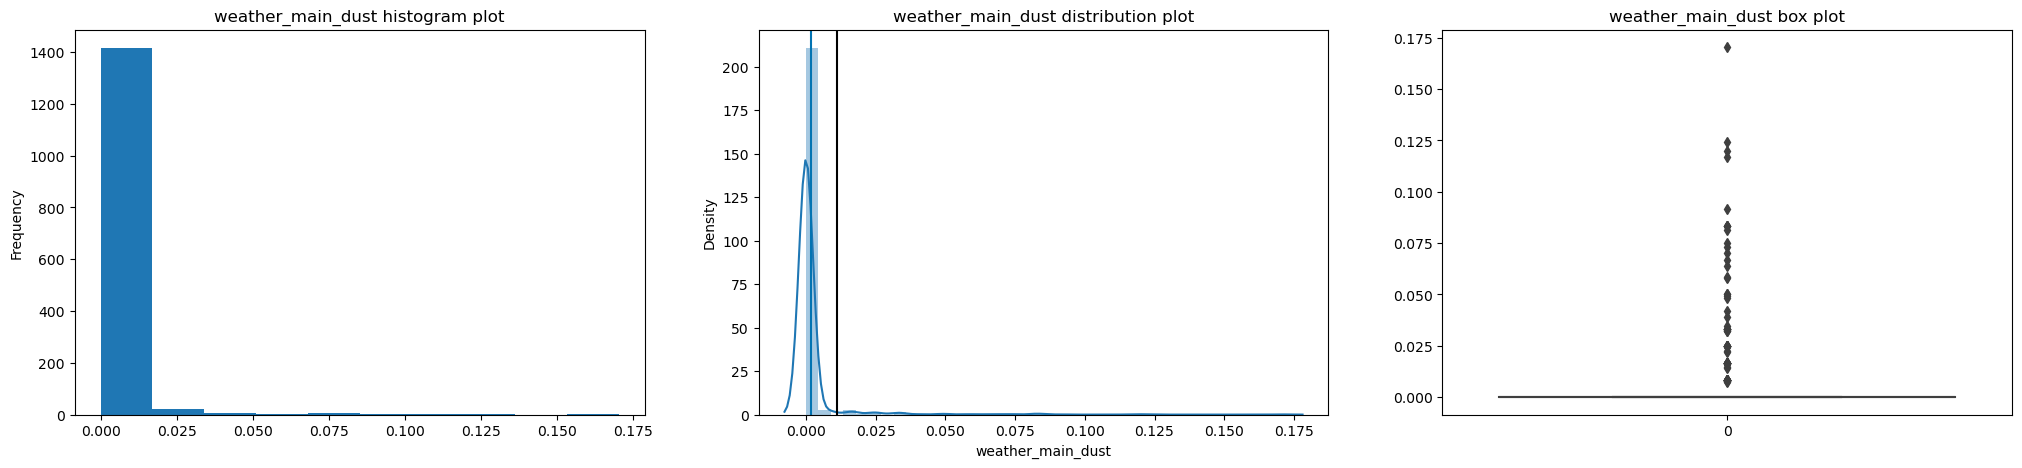

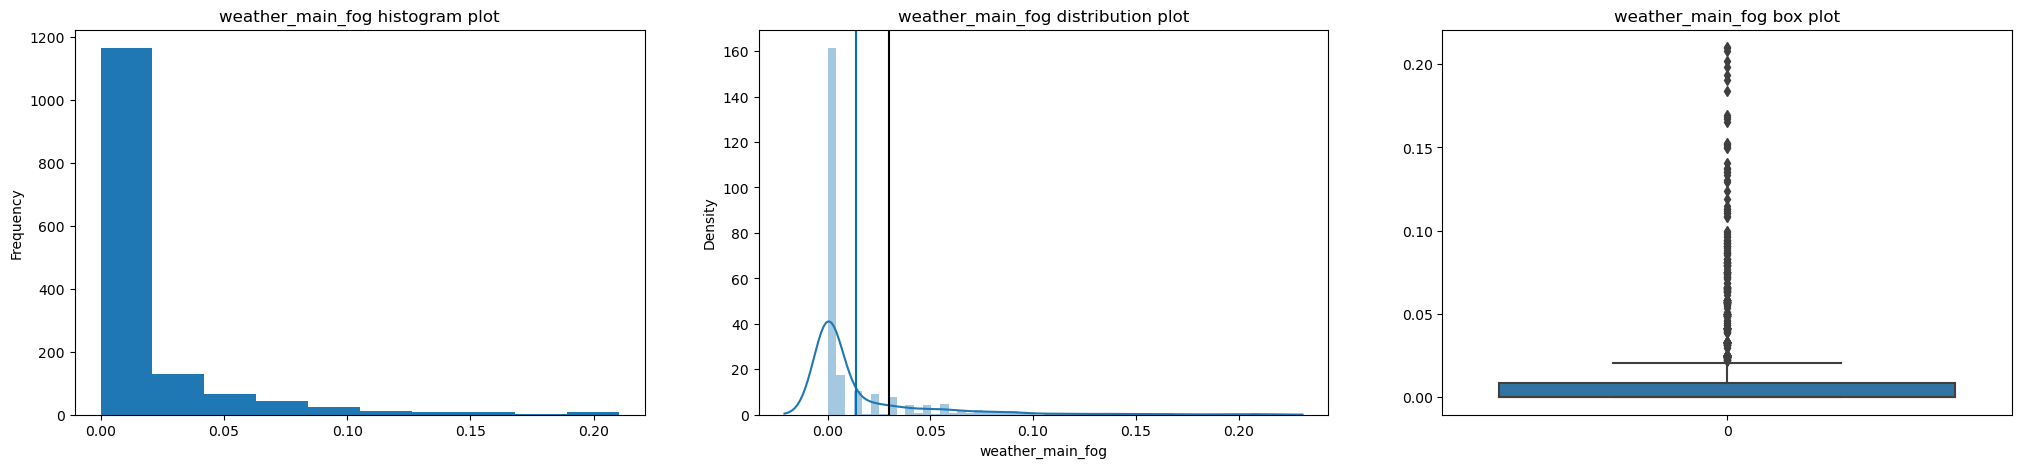

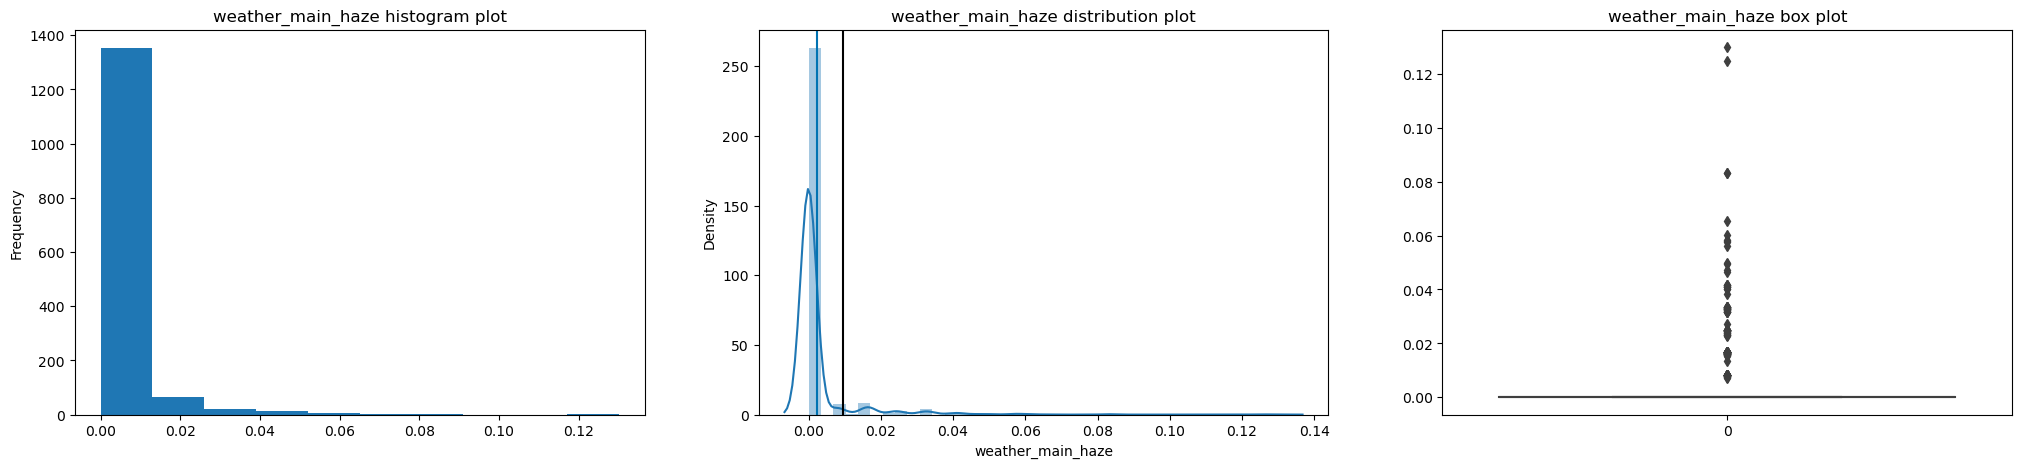

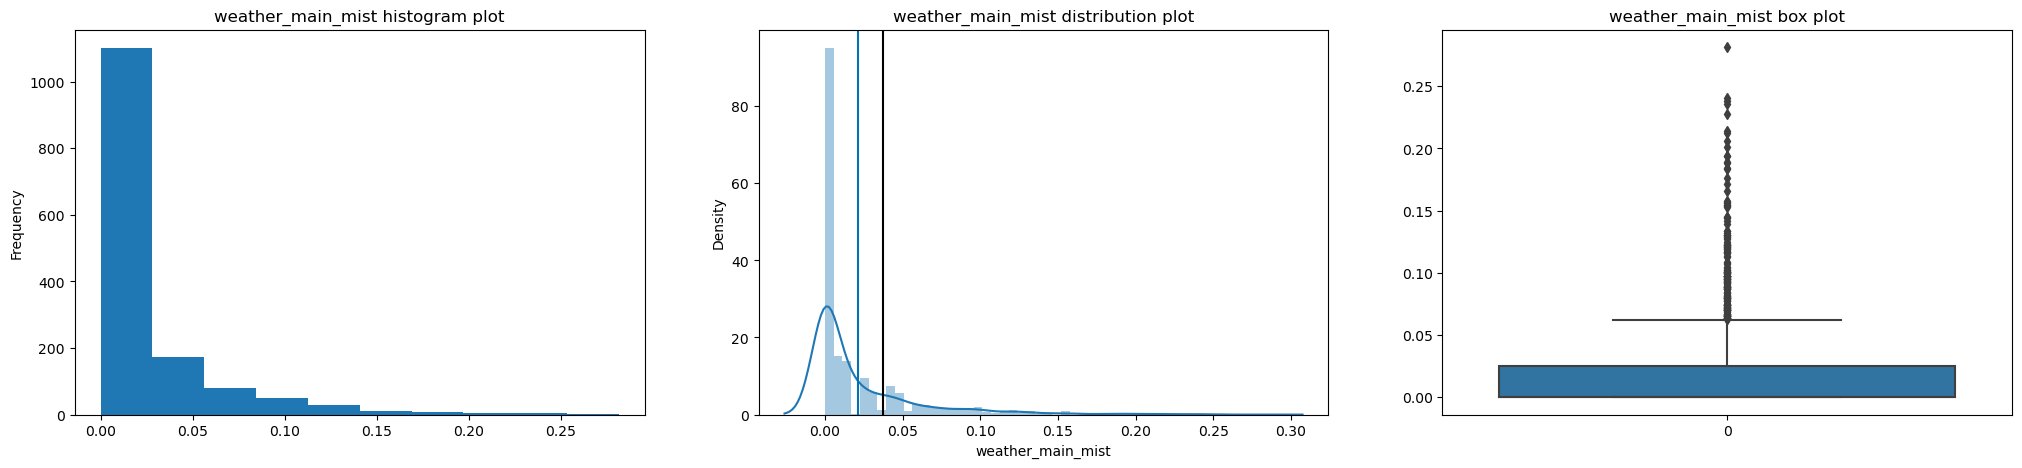

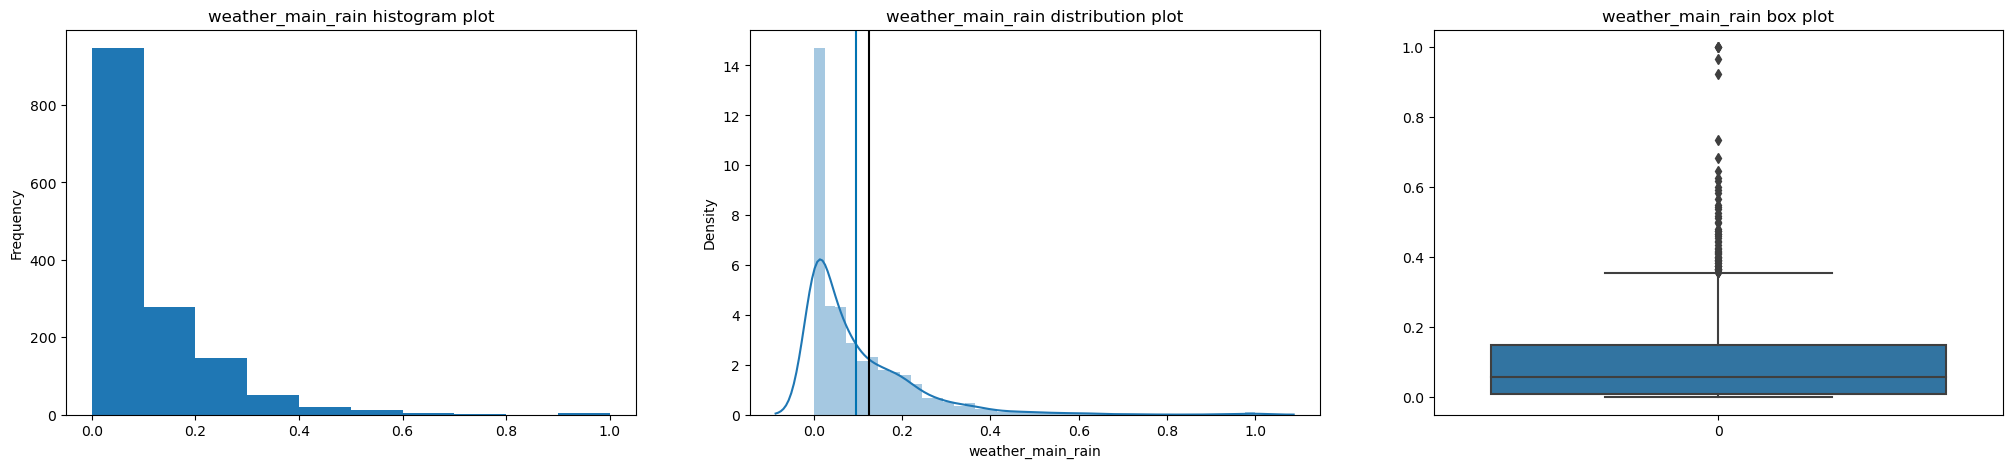

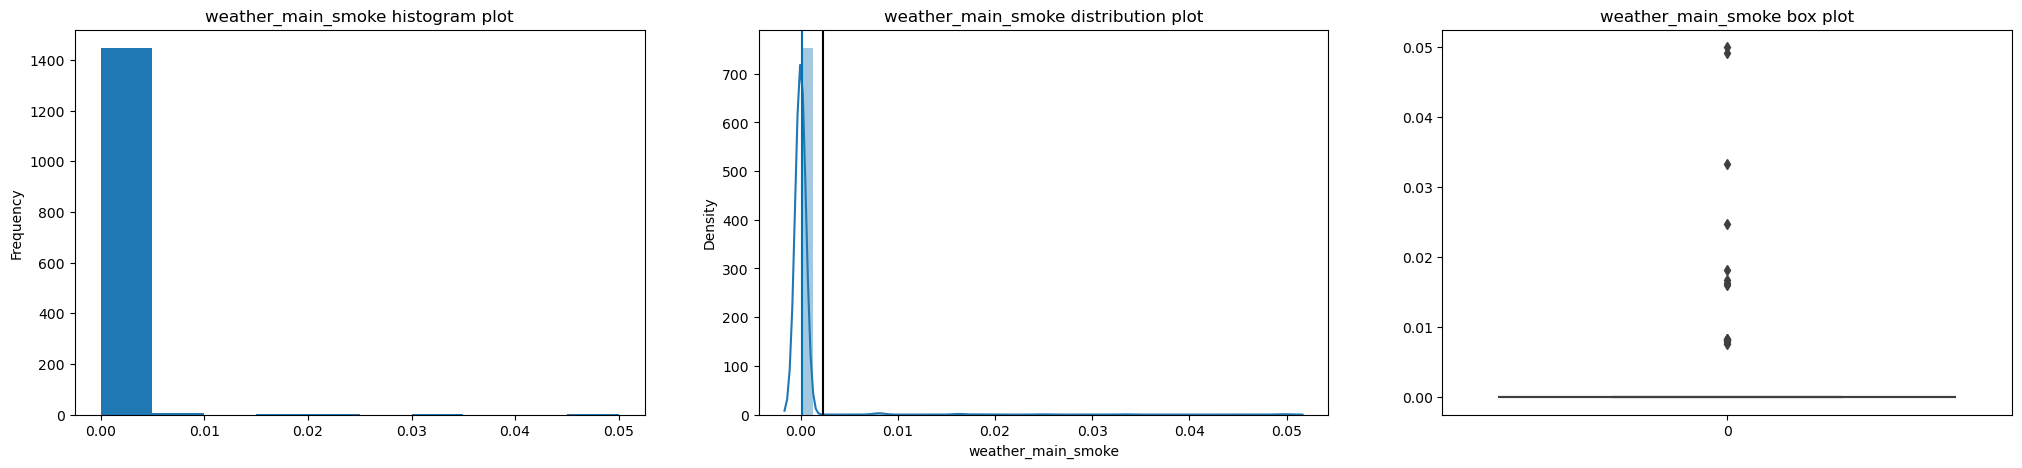

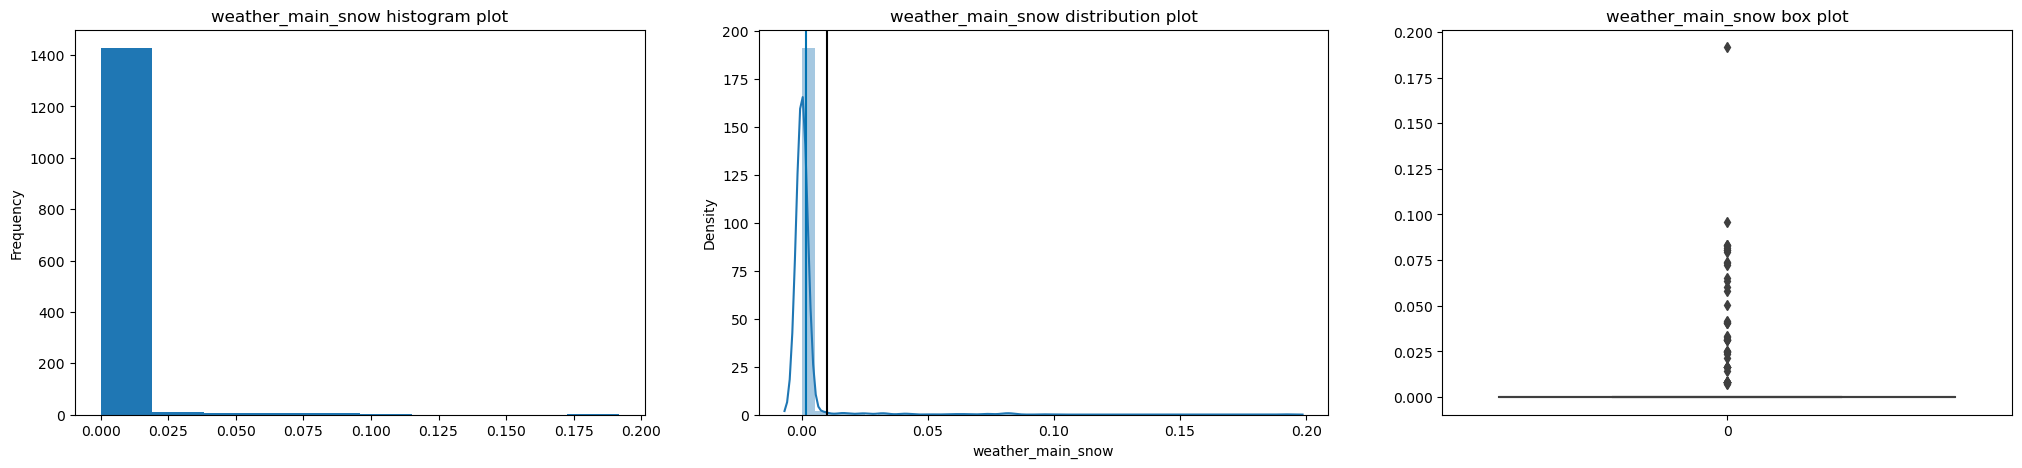

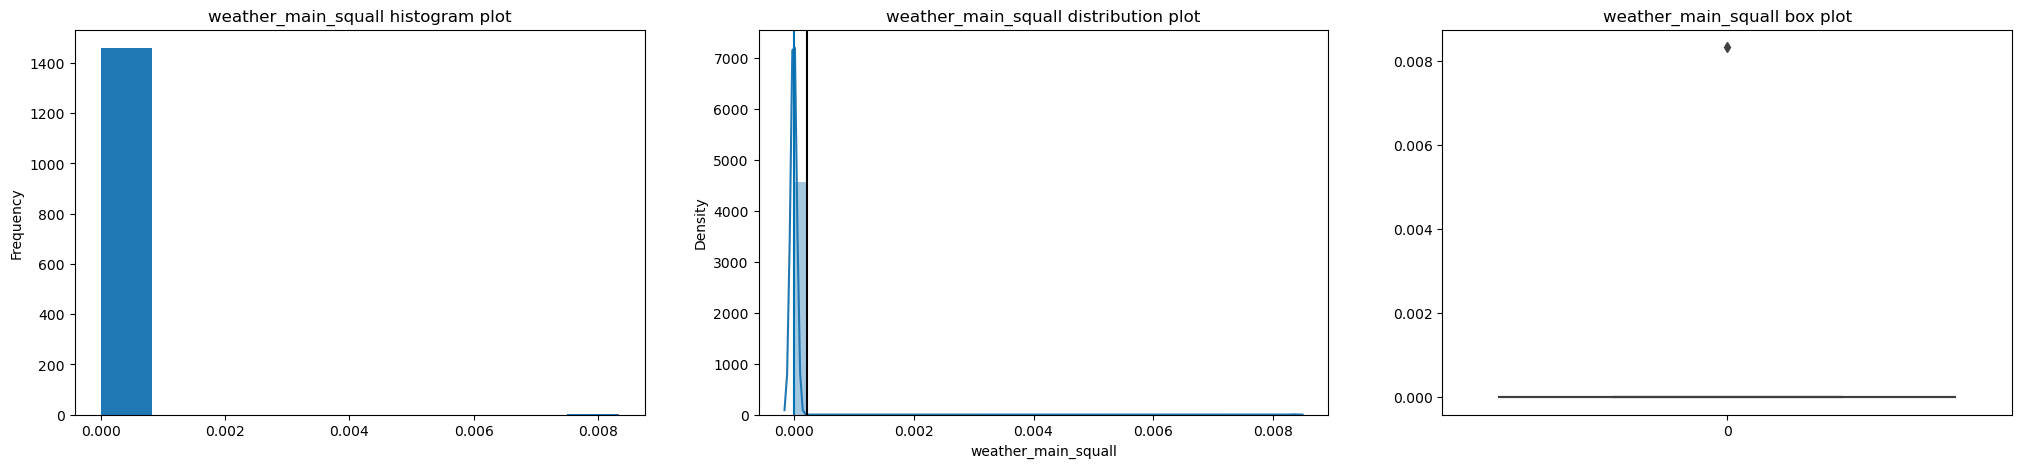

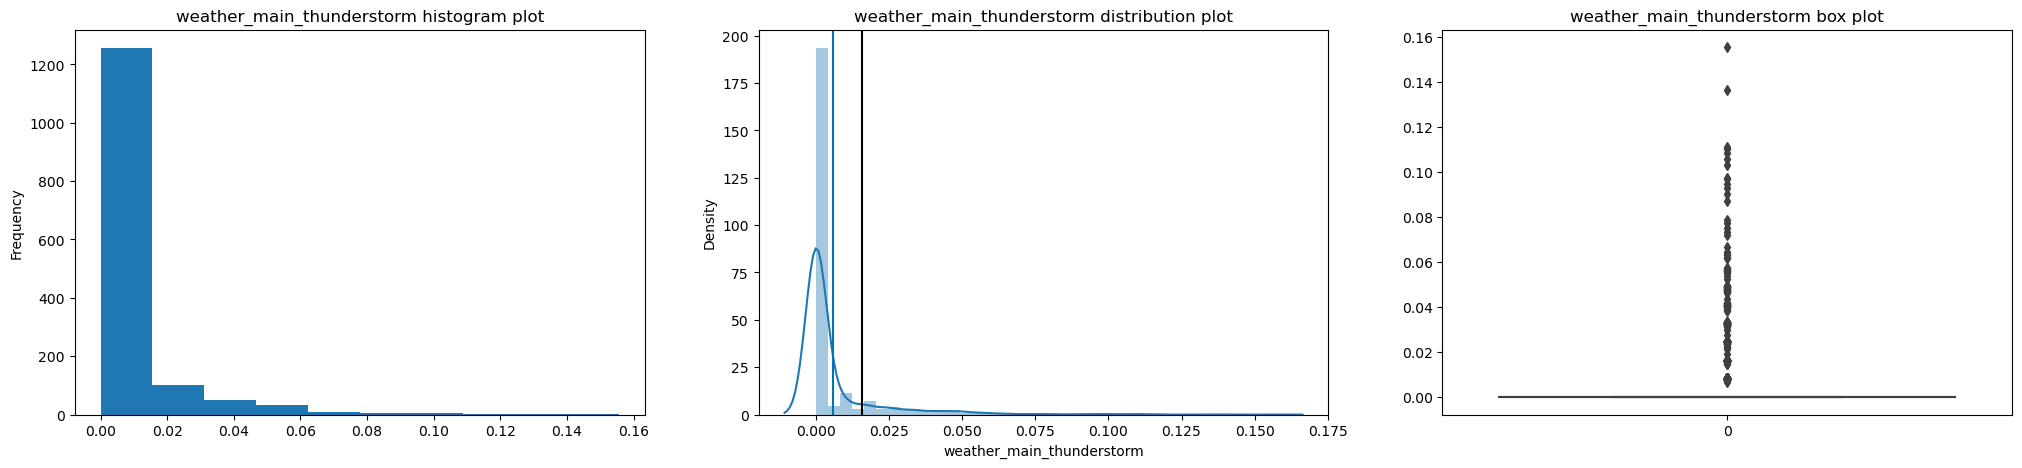

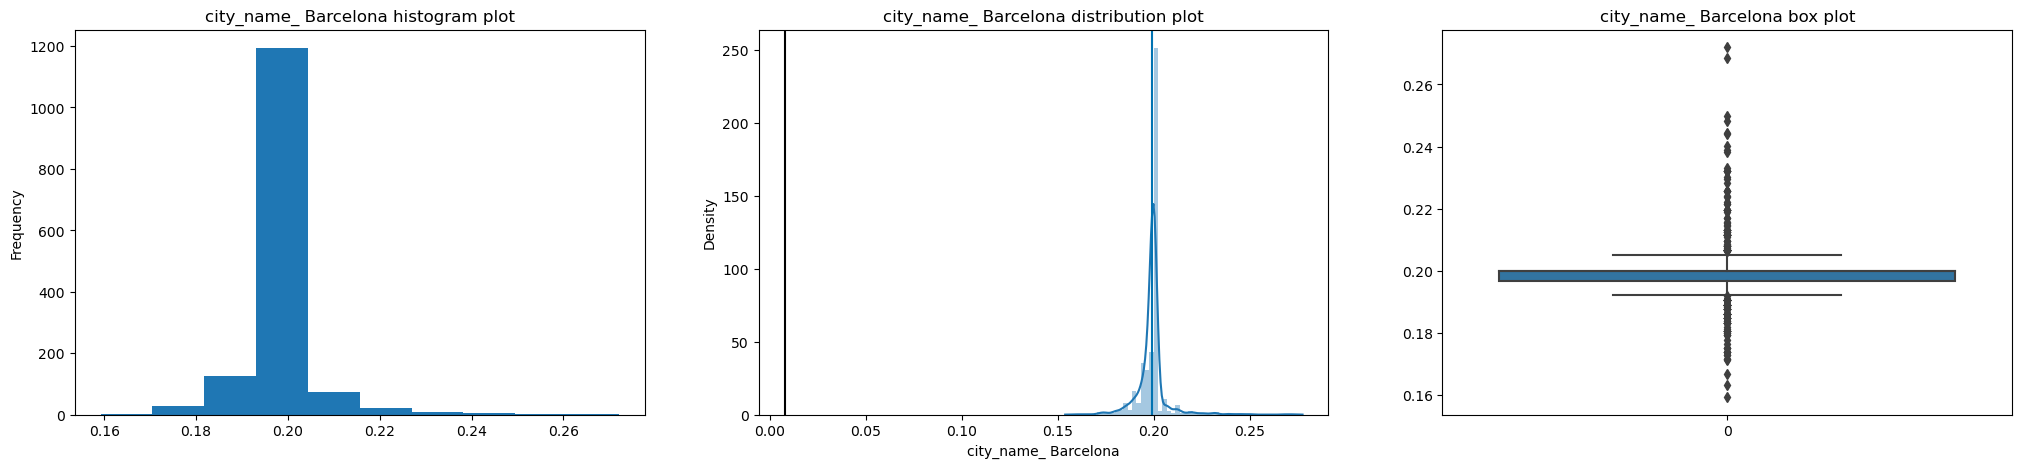

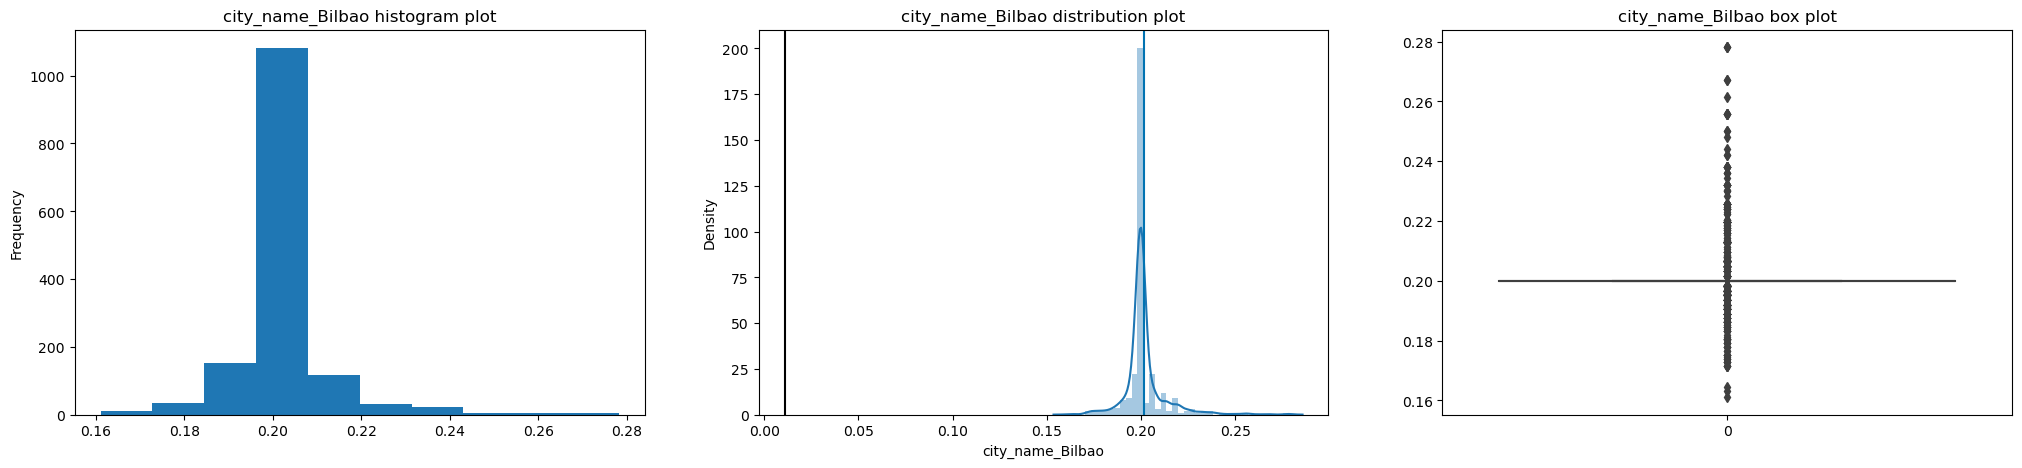

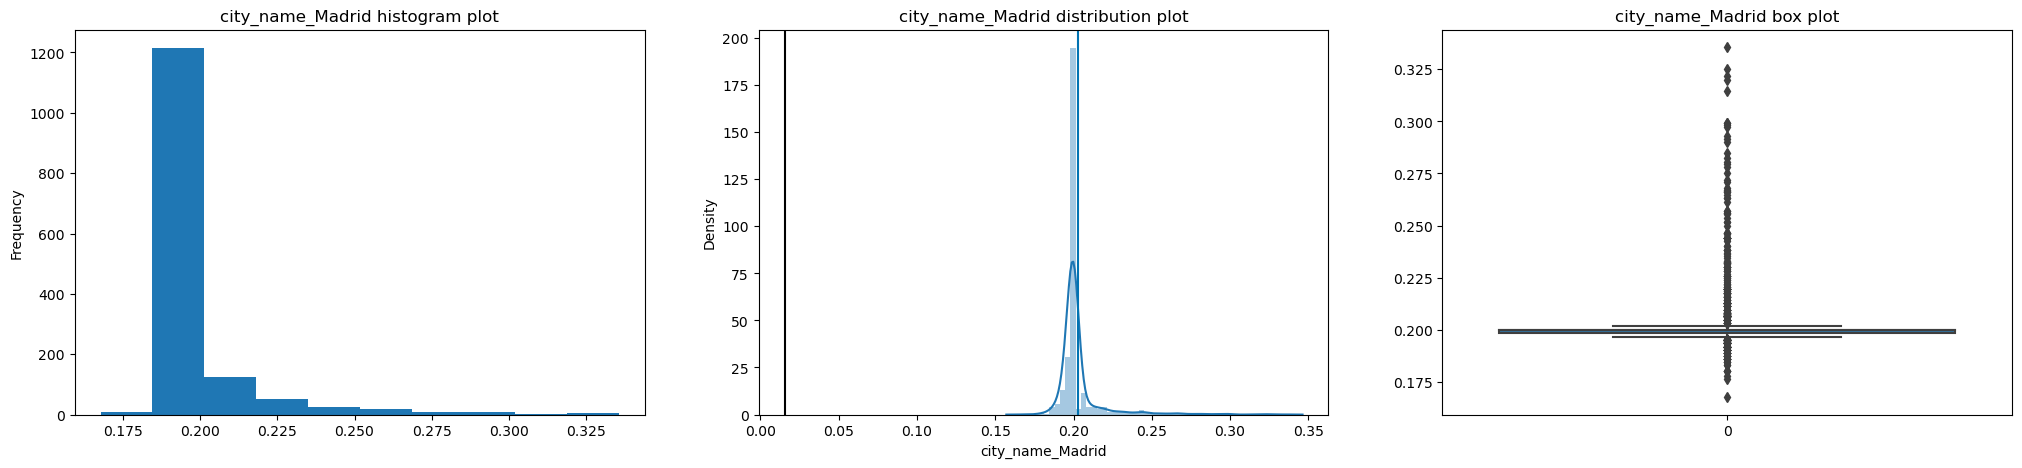

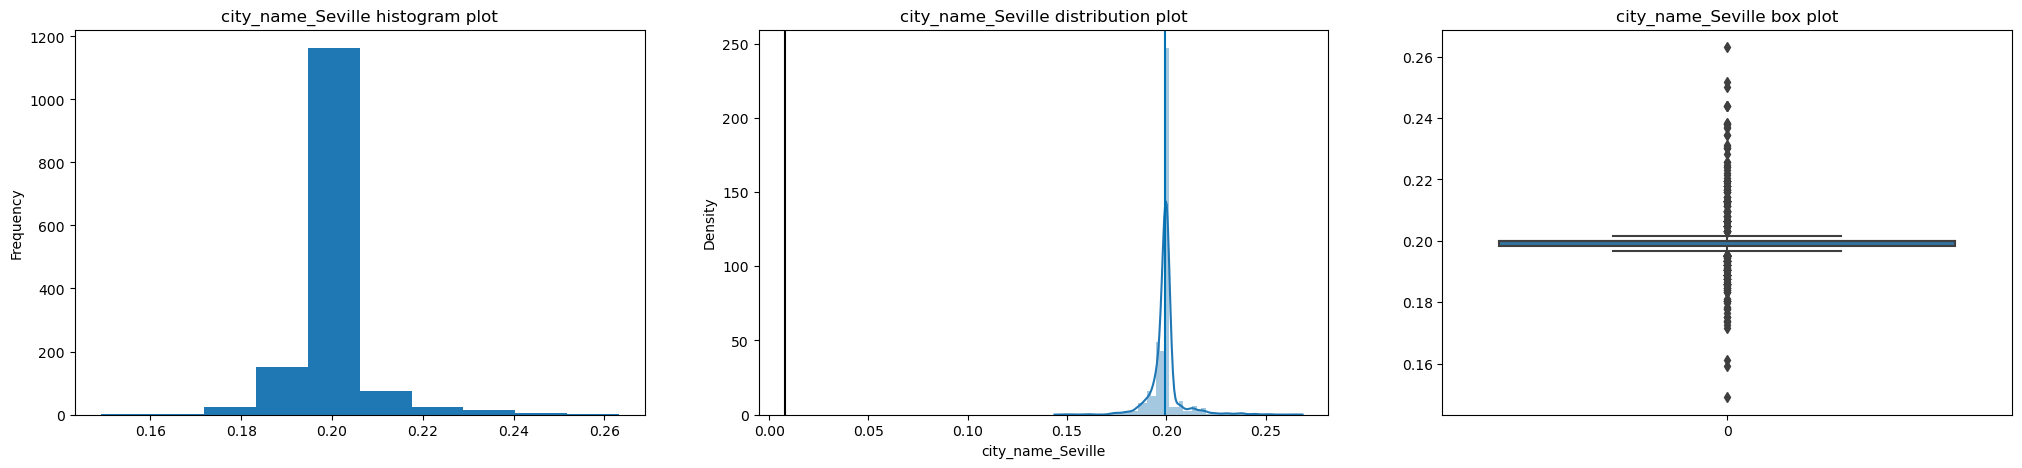

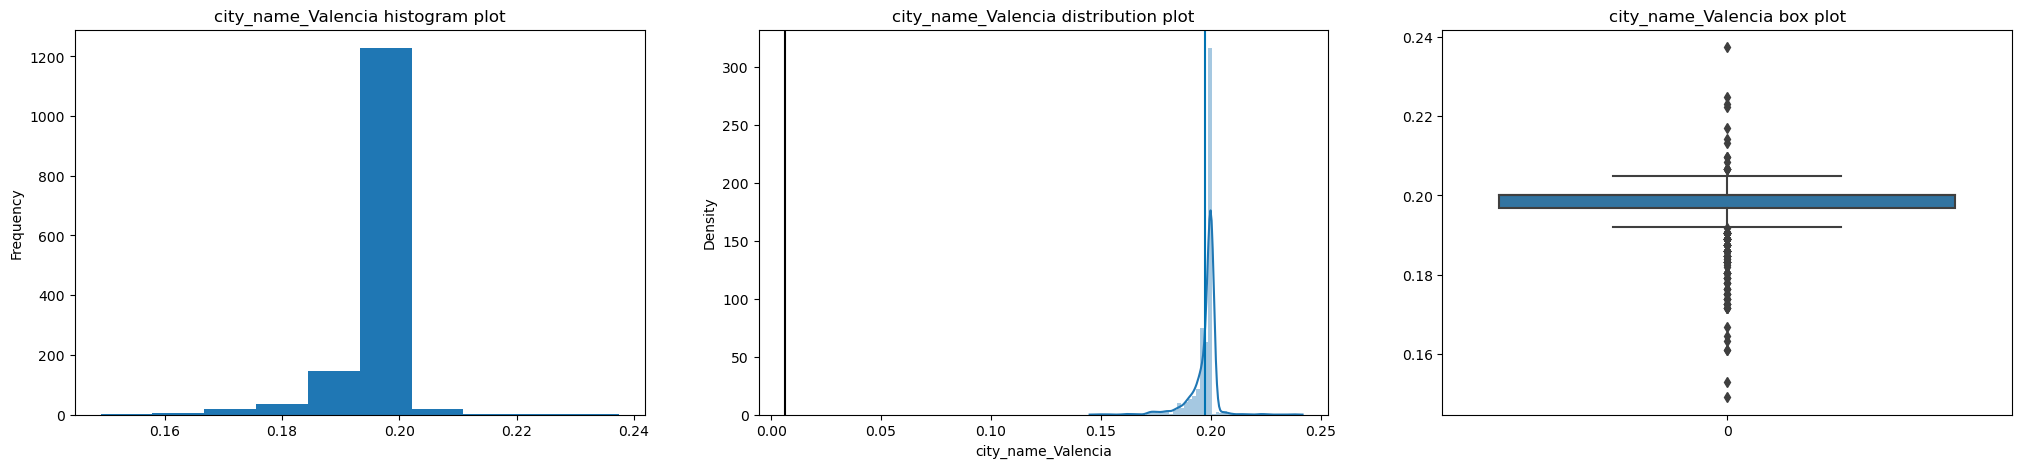

In [53]:
for col in merged_df_descriptive.columns:
    create_plots(merged_df_descriptive[col])

# Filter Feature Selection: Using Pairwise correlation

Filter approaches Features are selected before the data mining algorithm is run, using some approach that is independent of the data mining task. For example, we might select sets of attributes whose pairwise correlation is as low as possible.

In [54]:
#merged_df_daily.corr()

In [55]:
#merged_df_daily

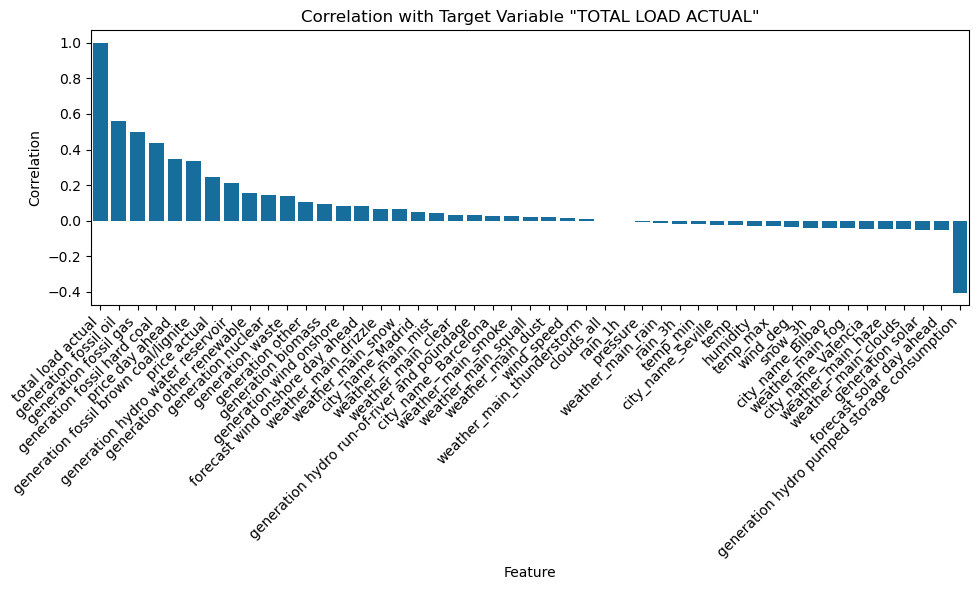

In [56]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_sorted.index, y='correlation_with_target', data=correlation_matrix_sorted, color= dark_blue)
plt.title('Correlation with Target Variable "TOTAL LOAD ACTUAL"')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What we want to do, is to cross-check each positive correlated feature with high correlation to the target variable

Cross-checking is done with pairwise correlation

### Checking Positively Correlated Variables

<Axes: xlabel='generation fossil oil', ylabel='generation fossil gas'>

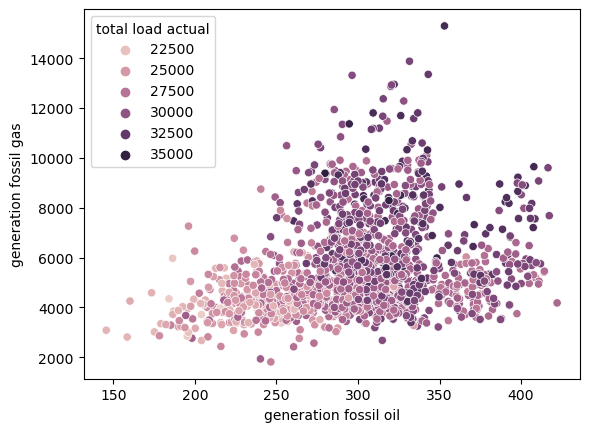

In [57]:
# Generation Fossil Oil vs Generation Fossil Gas
sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil oil'], y = 'generation fossil gas', hue='total load actual')

<Axes: xlabel='generation fossil gas', ylabel='generation fossil hard coal'>

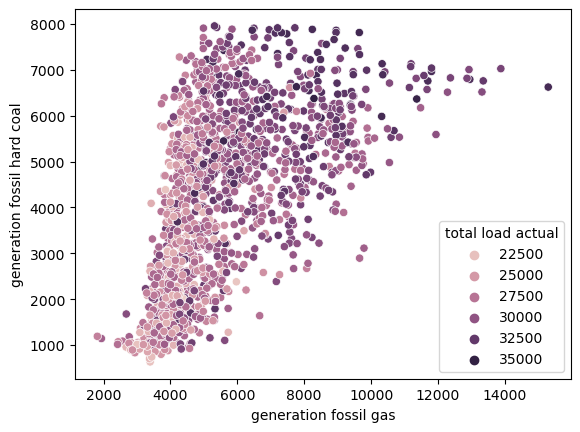

In [58]:
sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil gas'], y = 'generation fossil hard coal', hue='total load actual')

<Axes: xlabel='generation fossil gas', ylabel='generation fossil hard coal'>

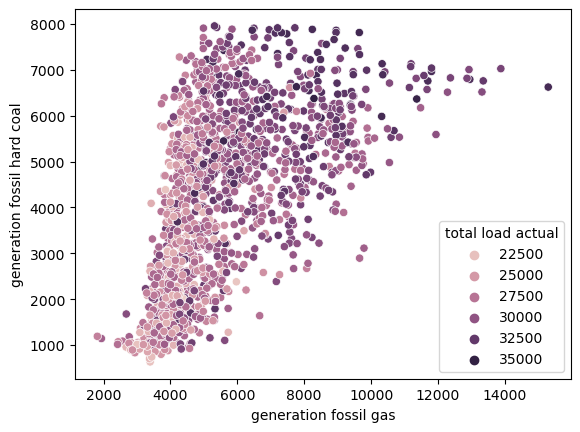

In [59]:
sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil gas'], y = 'generation fossil hard coal', hue='total load actual')

#  Modelling

First step is to split the data into a test and train set.

**The Test and Train Sets will be used for all moelling approaches**

## 1. Preparing Model Data (Train, Test Set) + Performing Scaling and PCA


Having already seen visually which features might be important, we will let an algorithm decide which featues our final dataframe should include

Principal Component ANalysis hereby is a suitable algorithm for continous attributes (time related).

PCA figures out the most important features impacting the target variable and calls them Principal Components (PC)
The most important features caputre the highest level of variation in the data. For PCA the mean is removed.


PCA has multiple advantages since:
- it can reduce high dimensionality extremly well
- tends to find the strongest patterns
- usually reduces noise in the data which is beneficial for upcoming algorithms (expands the possibility applying more algorithms)

**In order to Make PCA Work, we need to scale the information in our dataframe**

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

split_date = "2018-01-01"  # 75% split chronologically

train = merged_df_daily.loc[merged_df_daily["time"] < split_date]  # Defining the Train Set 2014-2017
test = merged_df_daily.loc[merged_df_daily["time"] >= split_date]  # Defining the Test Set 2018

# Training Data - 2014-2017
X_train = train.drop(["total load actual", "time"], axis=1)  # just Features assuming "total load actual" is the target column
y_train = train["total load actual"]  # Target Variable

# Test Data - 2018
X_test = test.drop(["total load actual", "time"], axis=1)
y_test = test["total load actual"]



# Alternatively you can also split by testsize ration - for doing this uncomment the code

#X = merged_df_daily.drop(["total load actual", "time"], axis = 1)
#y = merged_df_daily["total load actual"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

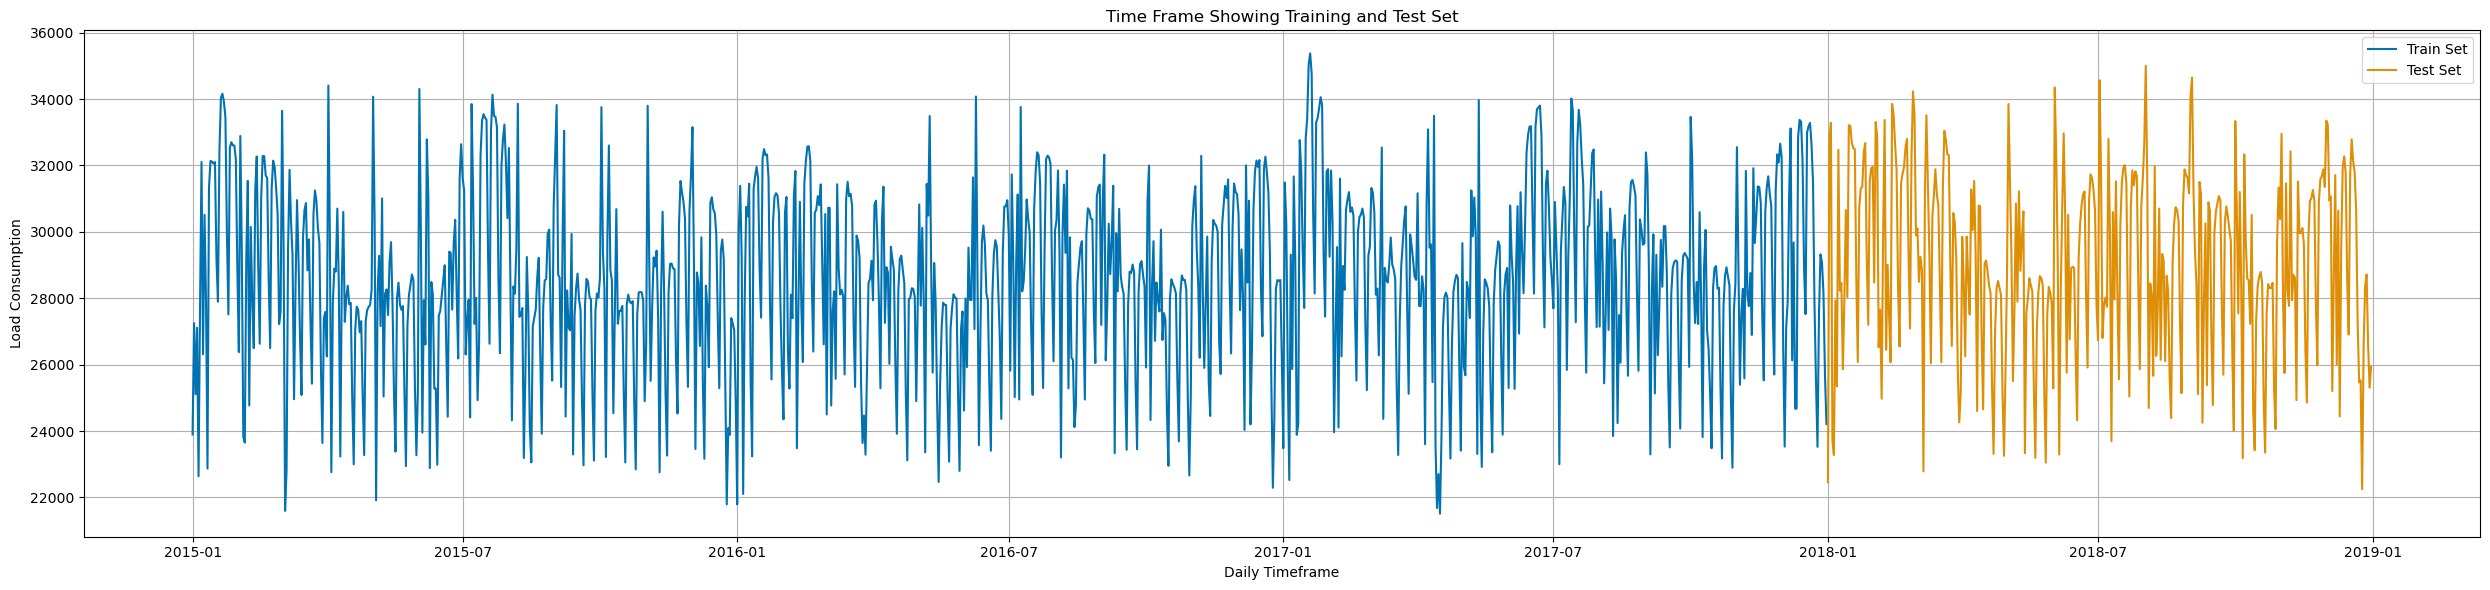

In [61]:
# Plot Results
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(train["time"], train["total load actual"], color= dark_blue, marker='', linestyle='-', label="Train Set")
ax.plot(test["time"], test["total load actual"], color= dark_orange, marker='', linestyle='-', label="Test Set")
plt.xlabel('Daily Timeframe')
plt.ylabel('Load Consumption')
plt.title('Time Frame Showing Training and Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=0.98)  # Retain 98% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now you can continue with model training, prediction, and evaluation steps

## 2. Implementing and Evaluating Models

### 2.1. Multiple Linear Regression

In [63]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [64]:
# Predict
y_test_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)

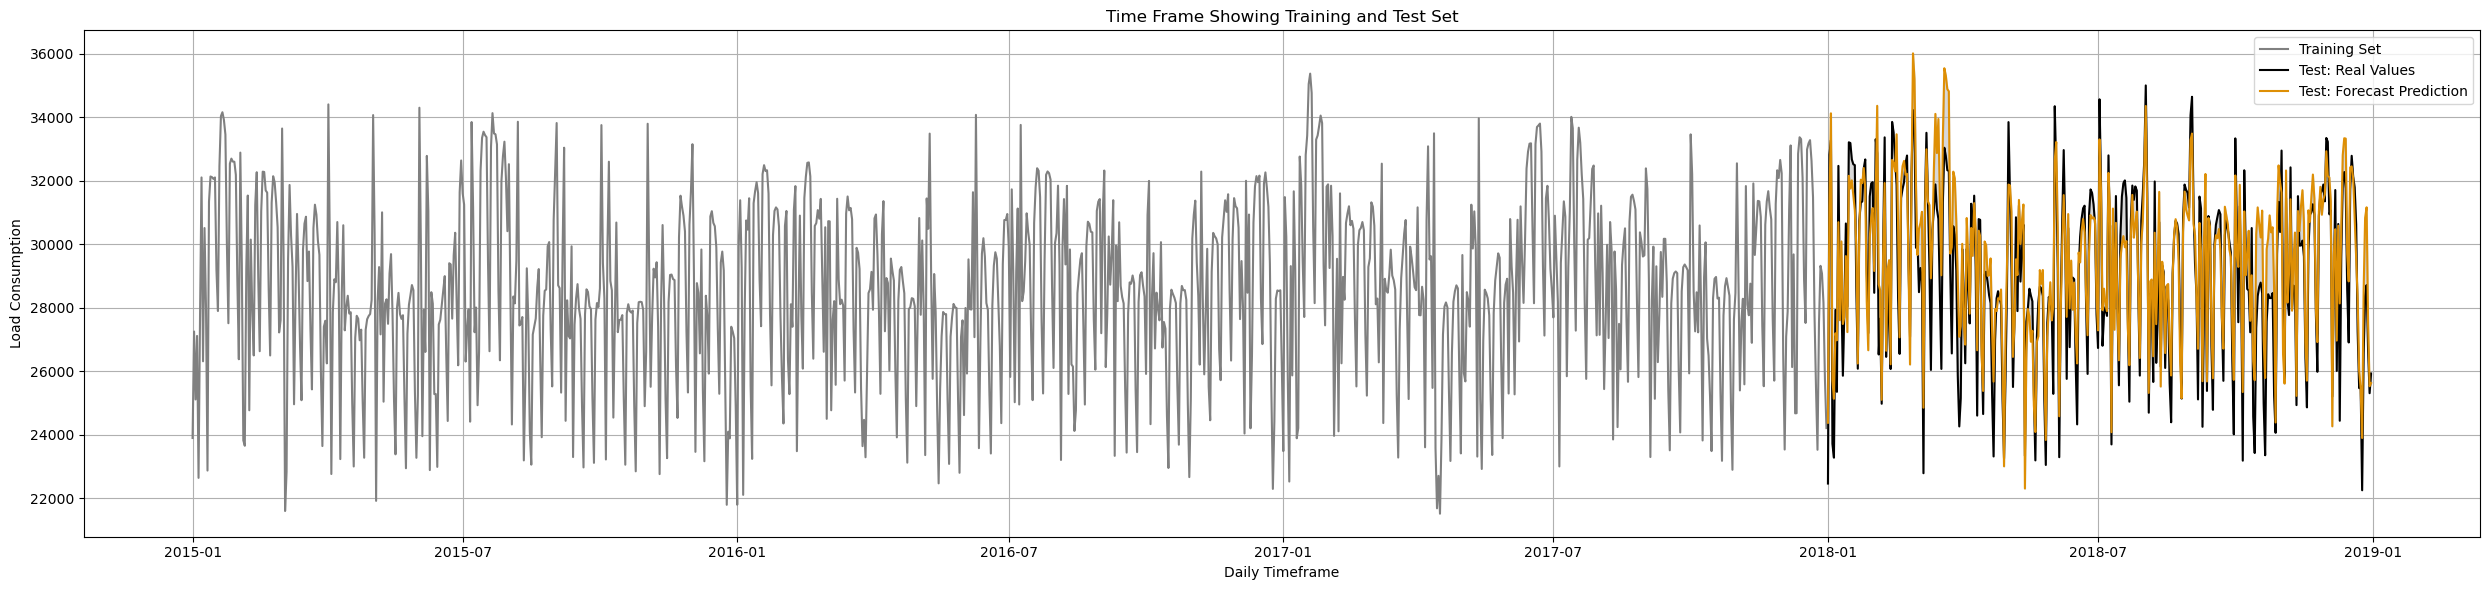

In [65]:
# Plot Results
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(train["time"], train["total load actual"], color= "grey" , marker='', linestyle='-', label="Training Set")
ax.plot(test["time"], test["total load actual"], color= "black", marker='', linestyle='-', label="Test: Real Values")

# Plot predicted values for test set
ax.plot(test["time"], y_test_pred, color=dark_orange, marker='', linestyle='-', label="Test: Forecast Prediction")

# Fill between actual and predicted values for test set
ax.fill_between(test["time"], y_test_pred, test["total load actual"], color='grey', alpha=0.3)

plt.xlabel('Daily Timeframe')
plt.ylabel('Load Consumption')
plt.title('Time Frame Showing Training and Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

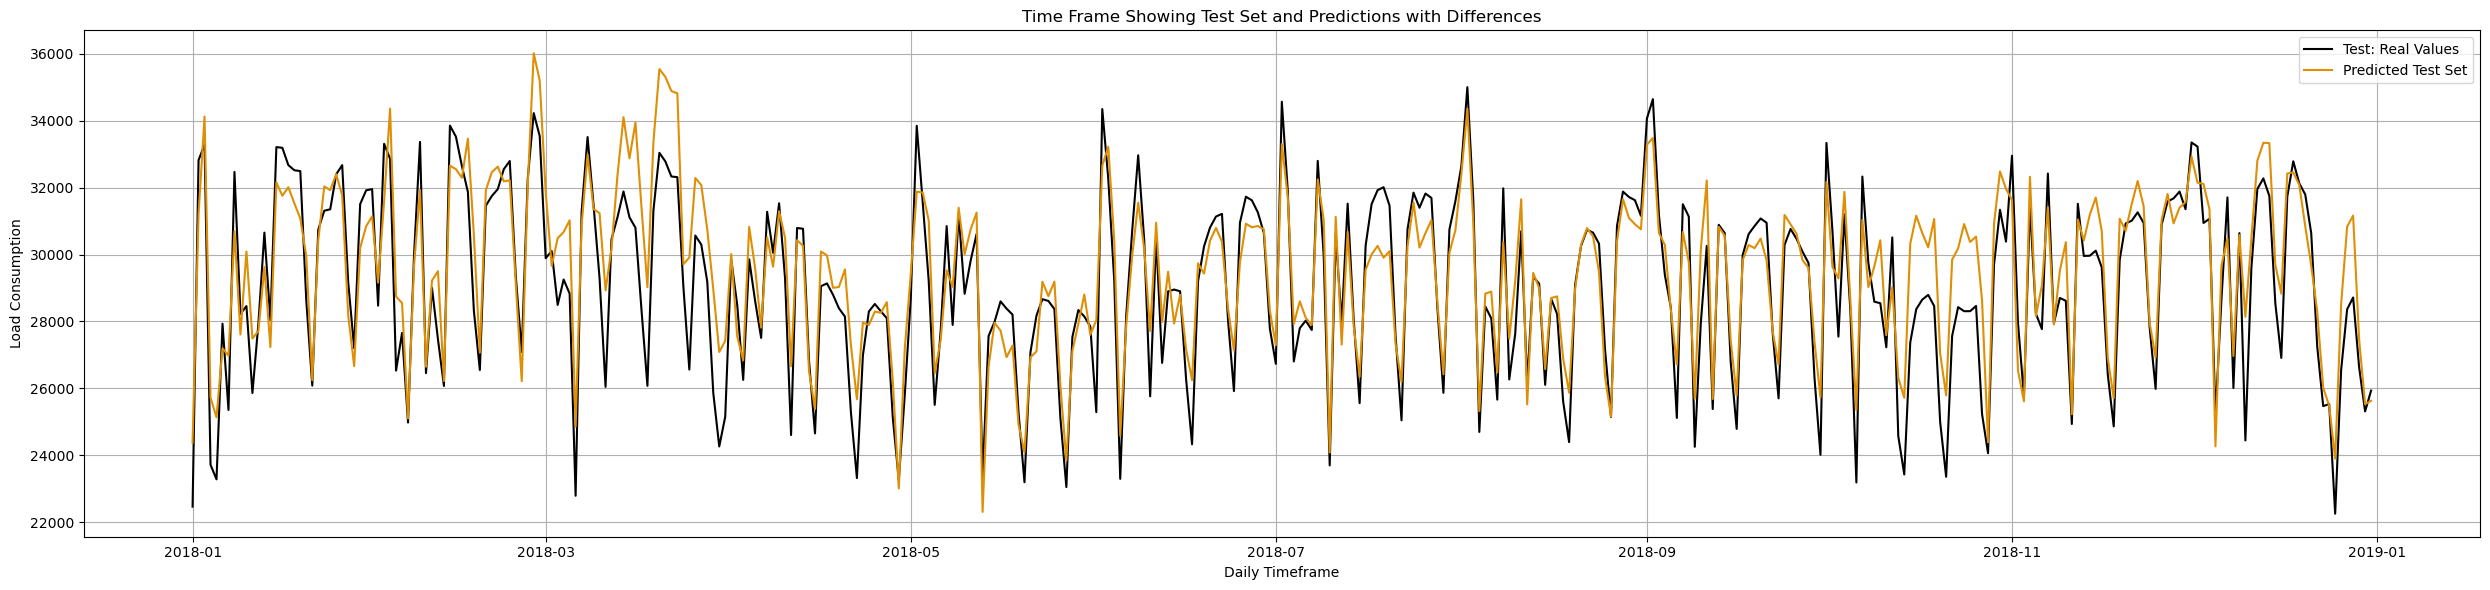

In [66]:
# Plot Results for the test set only
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(test["time"], test["total load actual"], color= "black", marker='', linestyle='-', label="Test: Real Values")
ax.plot(test["time"], y_test_pred, color=dark_orange, marker='', linestyle='-', label="Predicted Test Set")
plt.xlabel('Daily Timeframe')
plt.ylabel('Load Consumption')
plt.title('Time Frame Showing Test Set and Predictions with Differences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

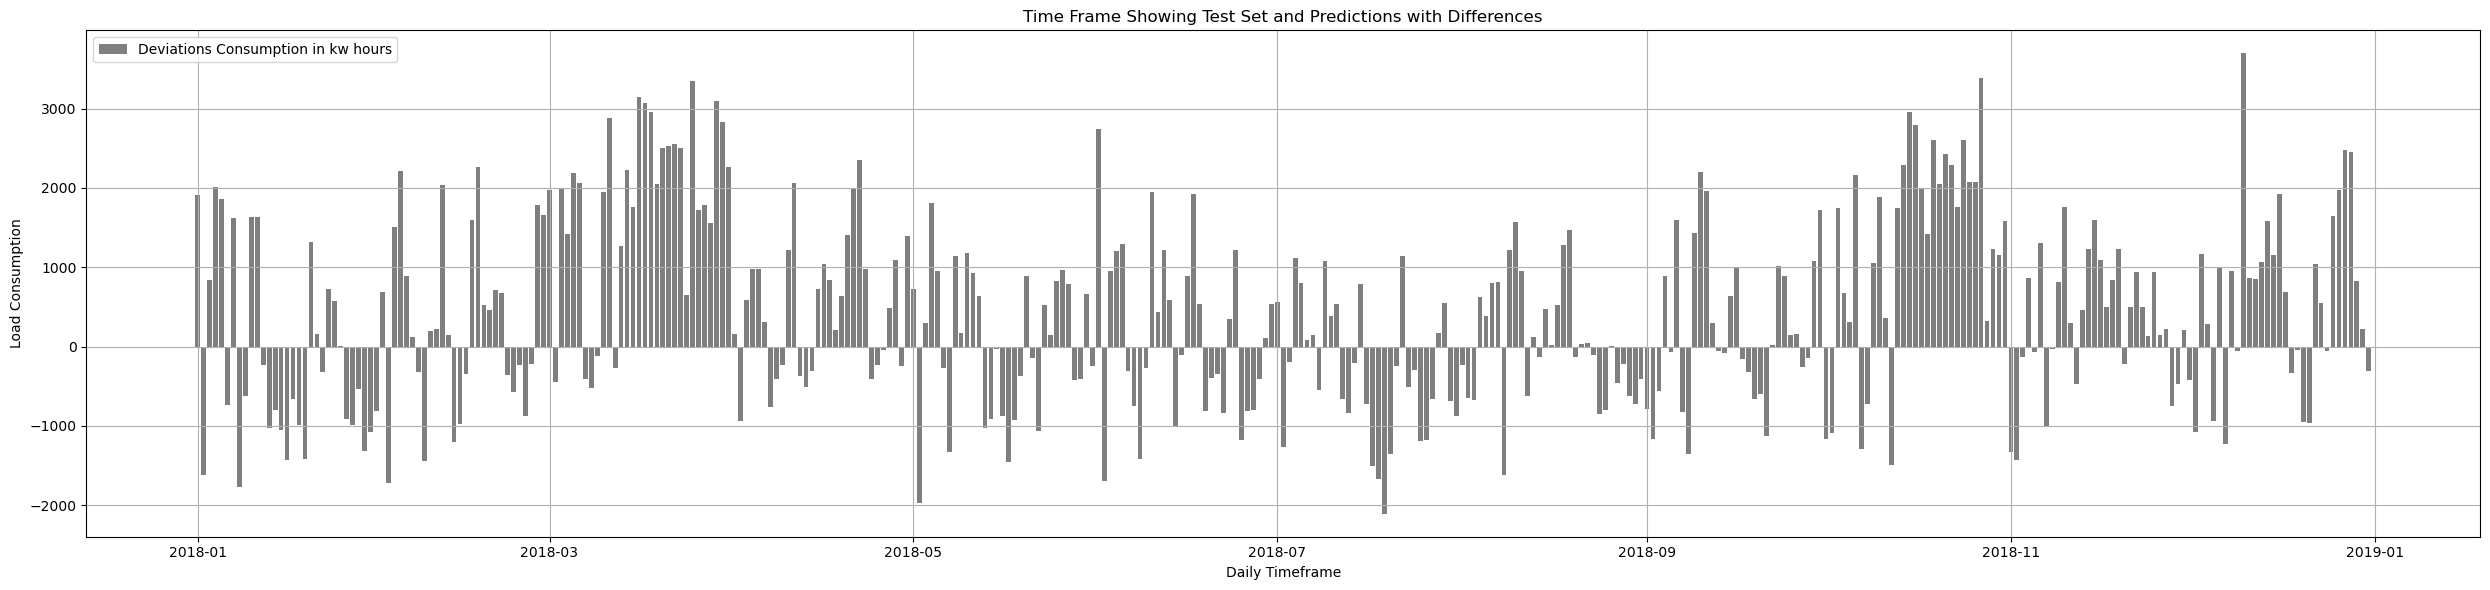

In [67]:
# Plot Results for the test set only
fig, ax = plt.subplots(figsize=(25, 6))
differences = y_test_pred - test["total load actual"]
ax.bar(test["time"], differences, color='black', alpha=0.5, label="Deviations Consumption in kw hours")

plt.xlabel('Daily Timeframe')
plt.ylabel('Load Consumption')
plt.title('Time Frame Showing Test Set and Predictions with Differences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# Define a function to calculate forecasting accuracy based on a threshold
def forecasting_accuracy(y_true, y_pred, threshold):
    accurate_forecasts = sum(abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true) <= threshold)
    total_forecasts = len(y_true)
    accuracy = (accurate_forecasts / total_forecasts) * 100
    return accuracy

# Define a threshold for accuracy
threshold = 0.1  # Define a threshold for considering a forecast accurate (e.g., within 10%)

In [69]:
# Evaluate Training Set
mae_train = mean_absolute_error(y_train_pred, y_train)
mse_train = mean_squared_error(y_train_pred,y_train)
mape_train = mean_absolute_percentage_error(y_train_pred, y_train)
r2_train = r2_score(y_train, y_train_pred)
accuracy_train = forecasting_accuracy(y_train, y_train_pred, threshold)

# Evaluate Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
accuracy_test = forecasting_accuracy(y_test, y_test_pred, threshold)

In [70]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Test): \t  ",mae_test)
print("R2 Score (Test): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")

Results: Training Set
Mean Squared Error (Train): 	   1104023.4121639791
Mean Absolute Error (Train): 	   834.2334539085513
R2 Score (Train): 	 	   0.8549675285903835
MAPE (Train): 			   0.02945983307484891
Forecasting Accuracy (Train): 	   98.8138686131387 %


Results: Test Set
Mean Squared Error (Test): 	   1559244.9346046417
Mean Absolute Error (Test): 	   1004.042369346555
R2 Score (Test): 	 	   0.7936221511835906
MAPE Test Error: 		   0.035324892913228614
Forecasting Accuracy (Test): 	   96.43835616438356 %


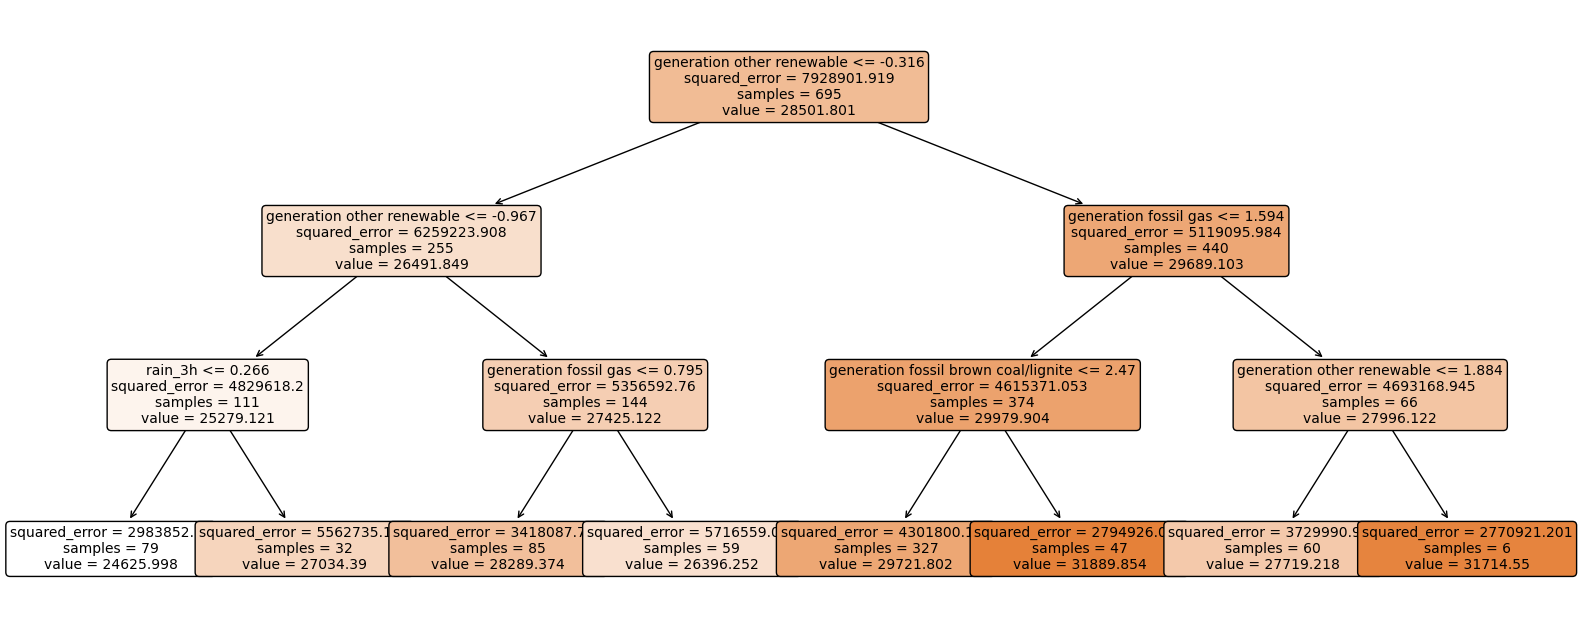

In [71]:
ranFor_model = RandomForestRegressor(n_estimators=100,max_depth=3)
ranFor_model.fit(X_train_pca,y_train)
ypred = ranFor_model.predict(X_test_pca)

tree= ranFor_model.estimators_[0]
plt.figure(figsize=(20,8))
plot_tree(tree,feature_names=X_train.columns.tolist(),filled=True,rounded=True,fontsize=10,class_names=["low","medium","high"])
plt.show()

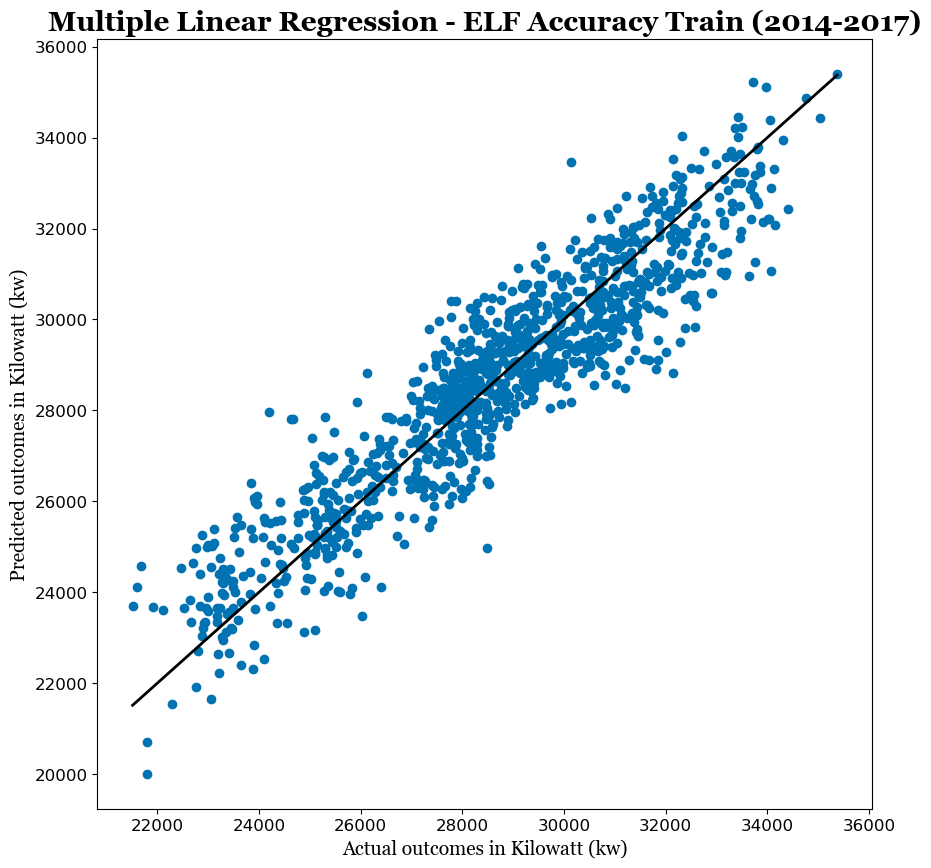

In [72]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred, color= dark_blue)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color= "black", linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('Multiple Linear Regression - ELF Accuracy Train (2014-2017)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()

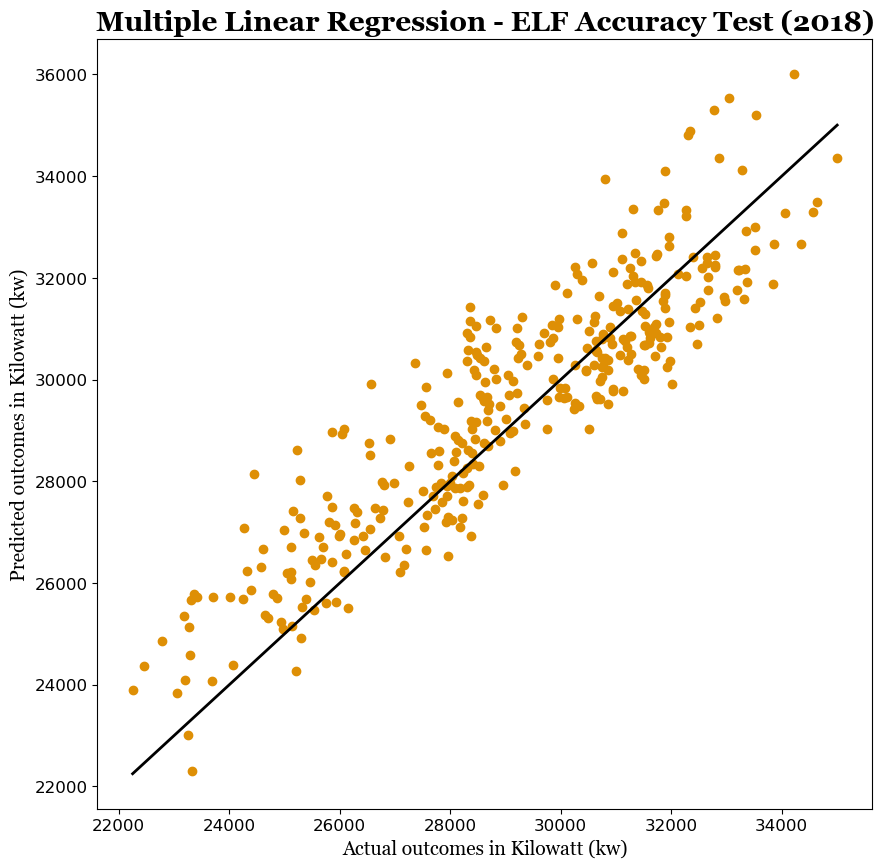

In [73]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, color= dark_orange)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('Multiple Linear Regression - ELF Accuracy Test (2018)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()

### 2.2. XGBoost 

In [74]:
# XGBoost
# Assuming you have already performed PCA and obtained the transformed features X_train_pca and X_test_pca

# Define your model (e.g., XGBoost)
#model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
#model.fit(X_train_pca, y_train)


model = xgb.XGBRegressor(n_estimators=1500, early_stopping_rounds=50,learning_rate=0.01)
model.fit(X_train_pca,y_train,eval_set=[(X_train_pca,y_train),(X_test_pca,y_test)],verbose=True)

[0]	validation_0-rmse:2740.16683	validation_1-rmse:2781.00273
[1]	validation_0-rmse:2721.53377	validation_1-rmse:2768.67980
[2]	validation_0-rmse:2703.13192	validation_1-rmse:2756.70127
[3]	validation_0-rmse:2684.95033	validation_1-rmse:2745.04057
[4]	validation_0-rmse:2667.11377	validation_1-rmse:2734.60912
[5]	validation_0-rmse:2649.27953	validation_1-rmse:2723.85854
[6]	validation_0-rmse:2631.69939	validation_1-rmse:2712.70603
[7]	validation_0-rmse:2614.26966	validation_1-rmse:2702.15579
[8]	validation_0-rmse:2597.05281	validation_1-rmse:2691.87189
[9]	validation_0-rmse:2580.20651	validation_1-rmse:2682.94093
[10]	validation_0-rmse:2563.31645	validation_1-rmse:2672.15727
[11]	validation_0-rmse:2546.87942	validation_1-rmse:2663.32891
[12]	validation_0-rmse:2530.14440	validation_1-rmse:2653.40059
[13]	validation_0-rmse:2514.34522	validation_1-rmse:2644.12258
[14]	validation_0-rmse:2497.80034	validation_1-rmse:2634.31336
[15]	validation_0-rmse:2481.47513	validation_1-rmse:2624.94887
[1

[130]	validation_0-rmse:1290.95936	validation_1-rmse:2068.29120
[131]	validation_0-rmse:1284.55885	validation_1-rmse:2065.68586
[132]	validation_0-rmse:1278.20389	validation_1-rmse:2062.18371
[133]	validation_0-rmse:1271.98259	validation_1-rmse:2059.65394
[134]	validation_0-rmse:1265.78968	validation_1-rmse:2057.61883
[135]	validation_0-rmse:1259.44113	validation_1-rmse:2055.42094
[136]	validation_0-rmse:1253.31742	validation_1-rmse:2052.10918
[137]	validation_0-rmse:1247.67181	validation_1-rmse:2049.92110
[138]	validation_0-rmse:1241.45898	validation_1-rmse:2046.86129
[139]	validation_0-rmse:1235.42353	validation_1-rmse:2044.96305
[140]	validation_0-rmse:1229.92937	validation_1-rmse:2042.68333
[141]	validation_0-rmse:1224.01053	validation_1-rmse:2039.98248
[142]	validation_0-rmse:1217.93892	validation_1-rmse:2037.61037
[143]	validation_0-rmse:1212.22077	validation_1-rmse:2035.13710
[144]	validation_0-rmse:1206.27264	validation_1-rmse:2032.31616
[145]	validation_0-rmse:1200.12205	valid

[260]	validation_0-rmse:745.47151	validation_1-rmse:1882.83955
[261]	validation_0-rmse:742.40675	validation_1-rmse:1881.81058
[262]	validation_0-rmse:739.40609	validation_1-rmse:1880.77268
[263]	validation_0-rmse:736.72010	validation_1-rmse:1880.00357
[264]	validation_0-rmse:734.01105	validation_1-rmse:1879.40941
[265]	validation_0-rmse:731.17178	validation_1-rmse:1878.55131
[266]	validation_0-rmse:728.42263	validation_1-rmse:1877.81967
[267]	validation_0-rmse:725.71808	validation_1-rmse:1876.64783
[268]	validation_0-rmse:722.83407	validation_1-rmse:1875.64936
[269]	validation_0-rmse:720.84358	validation_1-rmse:1875.36038
[270]	validation_0-rmse:718.33169	validation_1-rmse:1874.61018
[271]	validation_0-rmse:715.47430	validation_1-rmse:1873.62250
[272]	validation_0-rmse:713.40737	validation_1-rmse:1873.34102
[273]	validation_0-rmse:710.74856	validation_1-rmse:1872.62400
[274]	validation_0-rmse:708.26669	validation_1-rmse:1871.92395
[275]	validation_0-rmse:705.55543	validation_1-rmse:187

[391]	validation_0-rmse:476.62070	validation_1-rmse:1813.14091
[392]	validation_0-rmse:474.93438	validation_1-rmse:1812.96589
[393]	validation_0-rmse:473.42150	validation_1-rmse:1812.68676
[394]	validation_0-rmse:472.14332	validation_1-rmse:1812.54949
[395]	validation_0-rmse:471.10234	validation_1-rmse:1812.04045
[396]	validation_0-rmse:469.79235	validation_1-rmse:1811.72525
[397]	validation_0-rmse:468.78674	validation_1-rmse:1811.36287
[398]	validation_0-rmse:467.31875	validation_1-rmse:1811.11293
[399]	validation_0-rmse:466.07669	validation_1-rmse:1811.00416
[400]	validation_0-rmse:465.21881	validation_1-rmse:1810.86440
[401]	validation_0-rmse:464.28567	validation_1-rmse:1810.68453
[402]	validation_0-rmse:462.72539	validation_1-rmse:1810.69770
[403]	validation_0-rmse:461.27072	validation_1-rmse:1810.75812
[404]	validation_0-rmse:460.41738	validation_1-rmse:1810.63717
[405]	validation_0-rmse:459.55111	validation_1-rmse:1810.34579
[406]	validation_0-rmse:458.35193	validation_1-rmse:181

[522]	validation_0-rmse:351.82425	validation_1-rmse:1782.63808
[523]	validation_0-rmse:350.99206	validation_1-rmse:1782.36795
[524]	validation_0-rmse:350.24815	validation_1-rmse:1782.17799
[525]	validation_0-rmse:349.59745	validation_1-rmse:1782.30682
[526]	validation_0-rmse:349.05177	validation_1-rmse:1782.01701
[527]	validation_0-rmse:348.48949	validation_1-rmse:1781.63715
[528]	validation_0-rmse:347.80804	validation_1-rmse:1781.65572
[529]	validation_0-rmse:347.08612	validation_1-rmse:1781.44066
[530]	validation_0-rmse:346.30902	validation_1-rmse:1780.97963
[531]	validation_0-rmse:345.74828	validation_1-rmse:1780.68098
[532]	validation_0-rmse:344.91601	validation_1-rmse:1780.28012
[533]	validation_0-rmse:344.20527	validation_1-rmse:1780.06610
[534]	validation_0-rmse:343.54906	validation_1-rmse:1779.77529
[535]	validation_0-rmse:343.00372	validation_1-rmse:1779.58129
[536]	validation_0-rmse:342.51163	validation_1-rmse:1779.24409
[537]	validation_0-rmse:341.64162	validation_1-rmse:177

[653]	validation_0-rmse:272.43951	validation_1-rmse:1762.02960
[654]	validation_0-rmse:272.01845	validation_1-rmse:1761.99453
[655]	validation_0-rmse:271.45412	validation_1-rmse:1762.00906
[656]	validation_0-rmse:271.12511	validation_1-rmse:1761.82055
[657]	validation_0-rmse:270.79405	validation_1-rmse:1761.72663
[658]	validation_0-rmse:270.30968	validation_1-rmse:1761.74149
[659]	validation_0-rmse:269.90406	validation_1-rmse:1761.69722
[660]	validation_0-rmse:269.54958	validation_1-rmse:1761.39836
[661]	validation_0-rmse:269.06810	validation_1-rmse:1761.35268
[662]	validation_0-rmse:268.50786	validation_1-rmse:1761.24974
[663]	validation_0-rmse:268.03524	validation_1-rmse:1761.28837
[664]	validation_0-rmse:267.72366	validation_1-rmse:1761.23774
[665]	validation_0-rmse:267.38574	validation_1-rmse:1761.22229
[666]	validation_0-rmse:267.04123	validation_1-rmse:1760.94280
[667]	validation_0-rmse:266.49711	validation_1-rmse:1760.98997
[668]	validation_0-rmse:266.14439	validation_1-rmse:176

[784]	validation_0-rmse:217.59746	validation_1-rmse:1752.75571
[785]	validation_0-rmse:217.24300	validation_1-rmse:1752.74227
[786]	validation_0-rmse:217.00930	validation_1-rmse:1752.64151
[787]	validation_0-rmse:216.79448	validation_1-rmse:1752.60251
[788]	validation_0-rmse:216.29778	validation_1-rmse:1752.43799
[789]	validation_0-rmse:216.06943	validation_1-rmse:1752.33444
[790]	validation_0-rmse:215.78357	validation_1-rmse:1752.17314
[791]	validation_0-rmse:215.50590	validation_1-rmse:1752.23509
[792]	validation_0-rmse:215.18107	validation_1-rmse:1752.30553
[793]	validation_0-rmse:214.79084	validation_1-rmse:1752.22385
[794]	validation_0-rmse:214.57249	validation_1-rmse:1752.12450
[795]	validation_0-rmse:214.29230	validation_1-rmse:1752.07408
[796]	validation_0-rmse:214.10806	validation_1-rmse:1752.02001
[797]	validation_0-rmse:213.78268	validation_1-rmse:1751.96884
[798]	validation_0-rmse:213.17310	validation_1-rmse:1751.97850
[799]	validation_0-rmse:212.48153	validation_1-rmse:175

[915]	validation_0-rmse:174.93860	validation_1-rmse:1746.57537
[916]	validation_0-rmse:174.70793	validation_1-rmse:1746.45012
[917]	validation_0-rmse:174.57616	validation_1-rmse:1746.41121
[918]	validation_0-rmse:174.04064	validation_1-rmse:1746.37560
[919]	validation_0-rmse:173.80283	validation_1-rmse:1746.30555
[920]	validation_0-rmse:173.61806	validation_1-rmse:1746.29056
[921]	validation_0-rmse:173.48761	validation_1-rmse:1746.26120
[922]	validation_0-rmse:172.95334	validation_1-rmse:1746.22135
[923]	validation_0-rmse:172.77439	validation_1-rmse:1746.21240
[924]	validation_0-rmse:172.47787	validation_1-rmse:1746.12594
[925]	validation_0-rmse:172.33755	validation_1-rmse:1746.10958
[926]	validation_0-rmse:171.96725	validation_1-rmse:1746.04709
[927]	validation_0-rmse:171.44633	validation_1-rmse:1746.04475
[928]	validation_0-rmse:171.15093	validation_1-rmse:1745.94009
[929]	validation_0-rmse:170.97026	validation_1-rmse:1745.86472
[930]	validation_0-rmse:170.76377	validation_1-rmse:174

[1045]	validation_0-rmse:145.08751	validation_1-rmse:1742.31446
[1046]	validation_0-rmse:144.86441	validation_1-rmse:1742.24073
[1047]	validation_0-rmse:144.67232	validation_1-rmse:1742.24887
[1048]	validation_0-rmse:144.55078	validation_1-rmse:1742.22713
[1049]	validation_0-rmse:144.28078	validation_1-rmse:1742.17951
[1050]	validation_0-rmse:144.14103	validation_1-rmse:1742.19807
[1051]	validation_0-rmse:143.99395	validation_1-rmse:1742.18088
[1052]	validation_0-rmse:143.82095	validation_1-rmse:1742.12600
[1053]	validation_0-rmse:143.58909	validation_1-rmse:1742.15365
[1054]	validation_0-rmse:143.45238	validation_1-rmse:1742.15918
[1055]	validation_0-rmse:143.26266	validation_1-rmse:1742.06548
[1056]	validation_0-rmse:143.09784	validation_1-rmse:1742.03909
[1057]	validation_0-rmse:142.90240	validation_1-rmse:1742.04437
[1058]	validation_0-rmse:142.75564	validation_1-rmse:1742.02795
[1059]	validation_0-rmse:142.54199	validation_1-rmse:1742.03574
[1060]	validation_0-rmse:142.18567	valid

[1174]	validation_0-rmse:120.52549	validation_1-rmse:1740.67957
[1175]	validation_0-rmse:120.37867	validation_1-rmse:1740.69614
[1176]	validation_0-rmse:120.18076	validation_1-rmse:1740.67016
[1177]	validation_0-rmse:120.09882	validation_1-rmse:1740.65541
[1178]	validation_0-rmse:119.96788	validation_1-rmse:1740.63966
[1179]	validation_0-rmse:119.87865	validation_1-rmse:1740.64666
[1180]	validation_0-rmse:119.76559	validation_1-rmse:1740.62311
[1181]	validation_0-rmse:119.68949	validation_1-rmse:1740.62035
[1182]	validation_0-rmse:119.49281	validation_1-rmse:1740.61831
[1183]	validation_0-rmse:119.13898	validation_1-rmse:1740.65820
[1184]	validation_0-rmse:118.96448	validation_1-rmse:1740.53130
[1185]	validation_0-rmse:118.61644	validation_1-rmse:1740.57726
[1186]	validation_0-rmse:118.44510	validation_1-rmse:1740.44258
[1187]	validation_0-rmse:118.30225	validation_1-rmse:1740.40797
[1188]	validation_0-rmse:118.10011	validation_1-rmse:1740.37839
[1189]	validation_0-rmse:117.90991	valid

[1303]	validation_0-rmse:99.30159	validation_1-rmse:1738.85988
[1304]	validation_0-rmse:99.18824	validation_1-rmse:1738.84853
[1305]	validation_0-rmse:99.11924	validation_1-rmse:1738.84449
[1306]	validation_0-rmse:98.94720	validation_1-rmse:1738.81470
[1307]	validation_0-rmse:98.88611	validation_1-rmse:1738.81155
[1308]	validation_0-rmse:98.76364	validation_1-rmse:1738.78487
[1309]	validation_0-rmse:98.70435	validation_1-rmse:1738.78332
[1310]	validation_0-rmse:98.61927	validation_1-rmse:1738.78650
[1311]	validation_0-rmse:98.42824	validation_1-rmse:1738.77741
[1312]	validation_0-rmse:98.38053	validation_1-rmse:1738.75336
[1313]	validation_0-rmse:98.24687	validation_1-rmse:1738.64549
[1314]	validation_0-rmse:98.20463	validation_1-rmse:1738.64517
[1315]	validation_0-rmse:98.14541	validation_1-rmse:1738.64217
[1316]	validation_0-rmse:98.06123	validation_1-rmse:1738.61195
[1317]	validation_0-rmse:97.94683	validation_1-rmse:1738.58511
[1318]	validation_0-rmse:97.90531	validation_1-rmse:173

[1434]	validation_0-rmse:85.78179	validation_1-rmse:1738.25224
[1435]	validation_0-rmse:85.72115	validation_1-rmse:1738.25914
[1436]	validation_0-rmse:85.65276	validation_1-rmse:1738.24012
[1437]	validation_0-rmse:85.59125	validation_1-rmse:1738.24263
[1438]	validation_0-rmse:85.43535	validation_1-rmse:1738.26678
[1439]	validation_0-rmse:85.34040	validation_1-rmse:1738.24075
[1440]	validation_0-rmse:85.28118	validation_1-rmse:1738.24758
[1441]	validation_0-rmse:85.13678	validation_1-rmse:1738.21844
[1442]	validation_0-rmse:84.99127	validation_1-rmse:1738.24243
[1443]	validation_0-rmse:84.91293	validation_1-rmse:1738.23146
[1444]	validation_0-rmse:84.75893	validation_1-rmse:1738.24646
[1445]	validation_0-rmse:84.62261	validation_1-rmse:1738.21554
[1446]	validation_0-rmse:84.51825	validation_1-rmse:1738.22755
[1447]	validation_0-rmse:84.35842	validation_1-rmse:1738.19256
[1448]	validation_0-rmse:84.30440	validation_1-rmse:1738.18099
[1449]	validation_0-rmse:84.26099	validation_1-rmse:173

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
#Now you can use the trained model to make predictions on the testing set
#y_pred = model.predict(X_test_pca)

y_test_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)

In [76]:
# Evaluate Training Set
mae_train = mean_absolute_error(y_train_pred, y_train)
mse_train = mean_squared_error(y_train_pred,y_train)
mape_train = mean_absolute_percentage_error(y_train_pred, y_train)
r2_train = r2_score(y_train, y_train_pred)
accuracy_train = forecasting_accuracy(y_train, y_train_pred, threshold)

# Evaluate Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
accuracy_test = forecasting_accuracy(y_test, y_test_pred, threshold)

In [77]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Test): \t  ",mae_test)
print("R2 Score (Test): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")

Results: Training Set
Mean Squared Error (Train): 	   6644.9139919909185
Mean Absolute Error (Train): 	   55.93653198982466
R2 Score (Train): 	 	   0.9991270762123842
MAPE (Train): 			   0.00198623440806769
Forecasting Accuracy (Train): 	   100.0 %


Results: Test Set
Mean Squared Error (Test): 	   3020403.3459811746
Mean Absolute Error (Test): 	   1397.9315416086538
R2 Score (Test): 	 	   0.6002267948623905
MAPE Test Error: 		   0.04954399396677637
Forecasting Accuracy (Test): 	   91.5068493150685 %


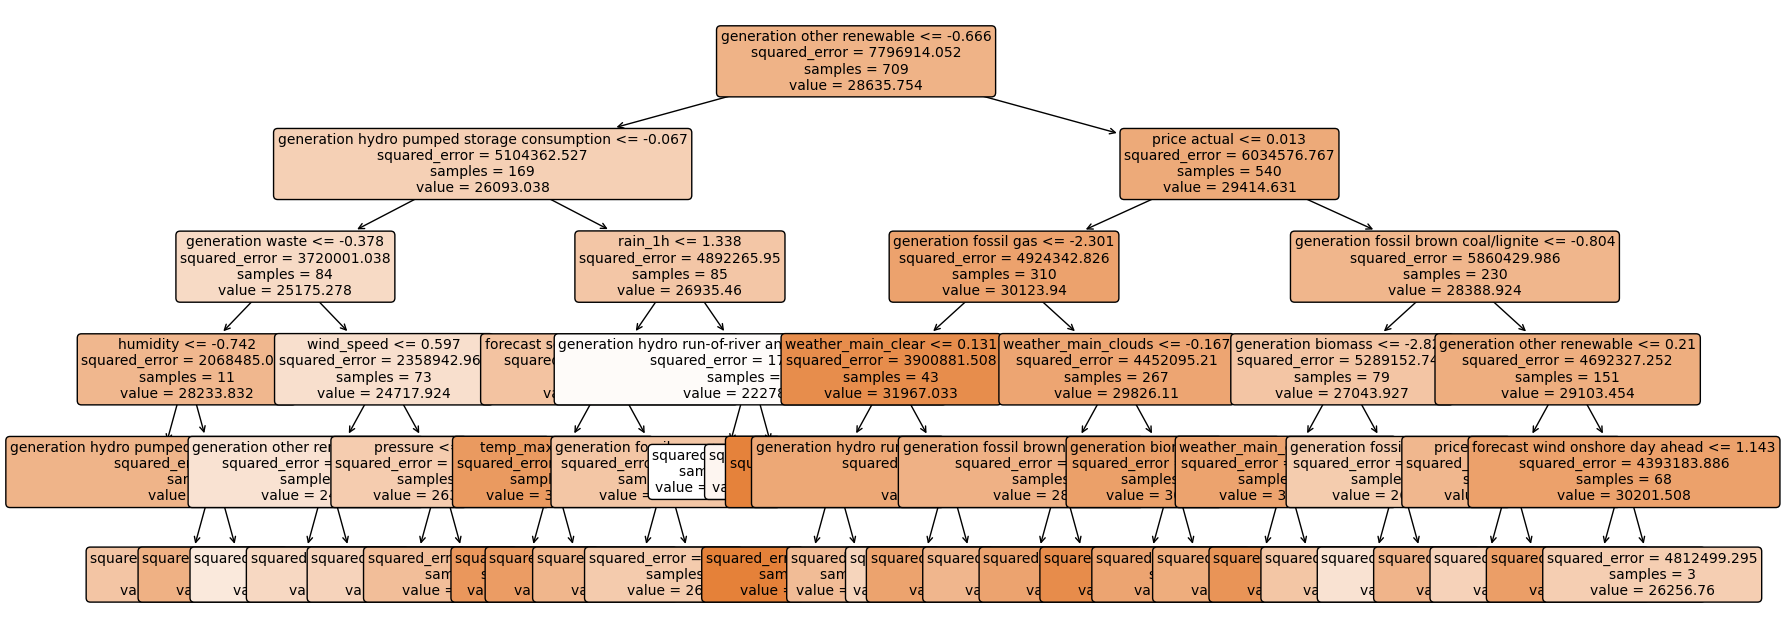

In [78]:
# Show the Decision Tree Results
ranFor_model = RandomForestRegressor(n_estimators=100,max_depth=5)
ranFor_model.fit(X_train_pca,y_train)
ypred = ranFor_model.predict(X_test_pca)

# Plot the Tree
tree= ranFor_model.estimators_[0]
plt.figure(figsize=(20,8))
plot_tree(tree,feature_names=X_train.columns.tolist(),filled=True,rounded=True,fontsize=10,class_names=["low","medium","high"])
plt.show()

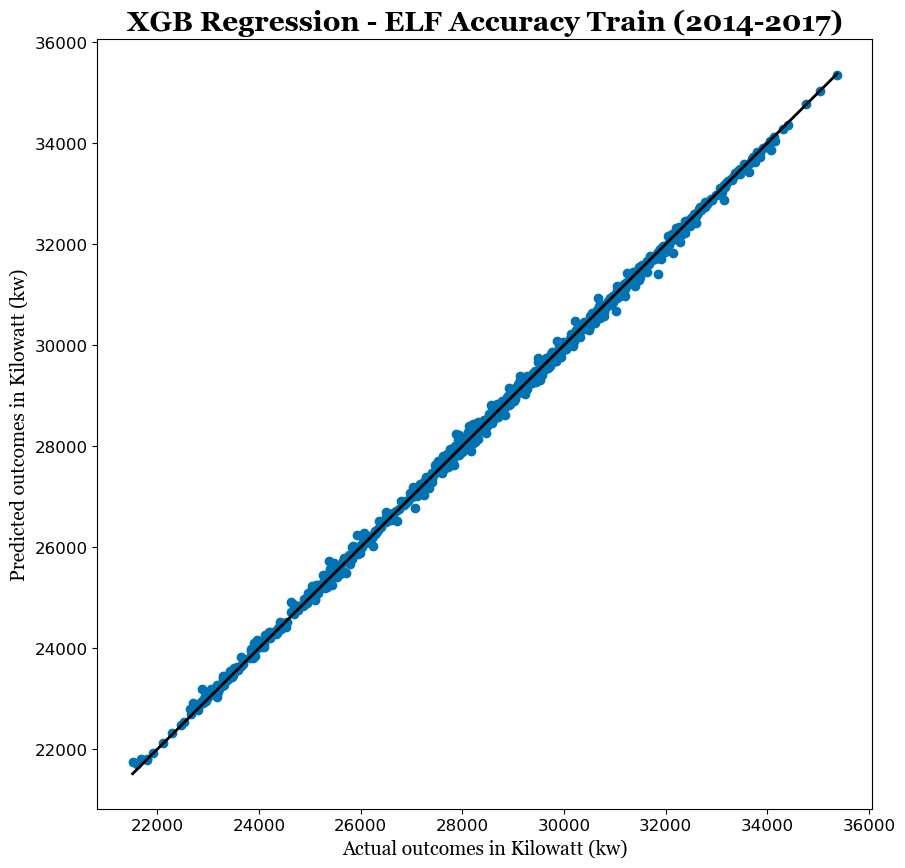

In [79]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred, color= dark_blue)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color= "black", linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('XGB Regression - ELF Accuracy Train (2014-2017)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()

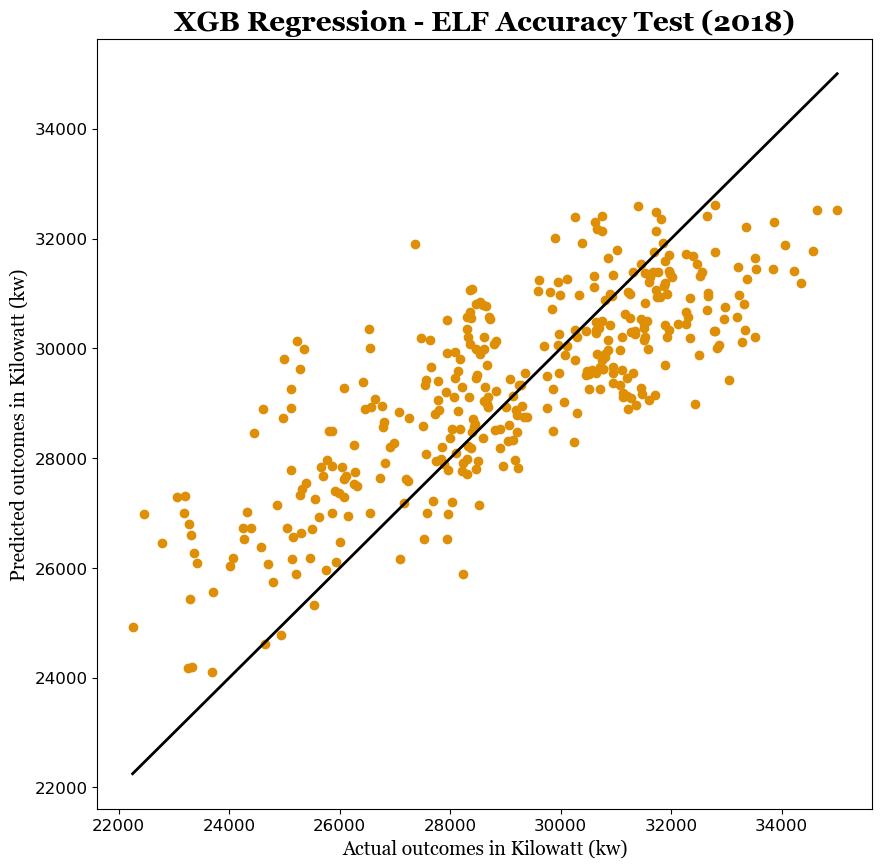

In [80]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, color= dark_orange)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('XGB Regression - ELF Accuracy Test (2018)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()

### 2.3. Lasso Regression

In [81]:
from sklearn.linear_model import LassoCV

#Lasso Regression with K-Fold Cross Validation
lasso_model = LassoCV(cv=5)  #implementing 5 fold cross-validation
lasso_model.fit(X_train_pca, y_train)

LassoCV(cv=5)

In [82]:
# Predict
    
y_test_pred= lasso_model.predict(X_test_pca)
y_train_pred = lasso_model.predict(X_train_pca)

In [83]:
# Evaluate Training Set
mae_train = mean_absolute_error(y_train_pred, y_train)
mse_train = mean_squared_error(y_train_pred,y_train)
mape_train = mean_absolute_percentage_error(y_train_pred, y_train)
r2_train = r2_score(y_train, y_train_pred)
accuracy_train = forecasting_accuracy(y_train, y_train_pred, threshold)

# Evaluate Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
accuracy_test = forecasting_accuracy(y_test, y_test_pred, threshold)

In [84]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Test): \t  ",mae_test)
print("R2 Score (Test): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")


Results: Training Set
Mean Squared Error (Train): 	   1139415.6037147632
Mean Absolute Error (Train): 	   844.9791128084801
R2 Score (Train): 	 	   0.8503181552594758
MAPE (Train): 			   0.029823316934686872
Forecasting Accuracy (Train): 	   98.72262773722628 %


Results: Test Set
Mean Squared Error (Test): 	   1530944.9514233465
Mean Absolute Error (Test): 	   1003.0051500239983
R2 Score (Test): 	 	   0.7973678677935196
MAPE Test Error: 		   0.035398341565392136
Forecasting Accuracy (Test): 	   96.16438356164385 %


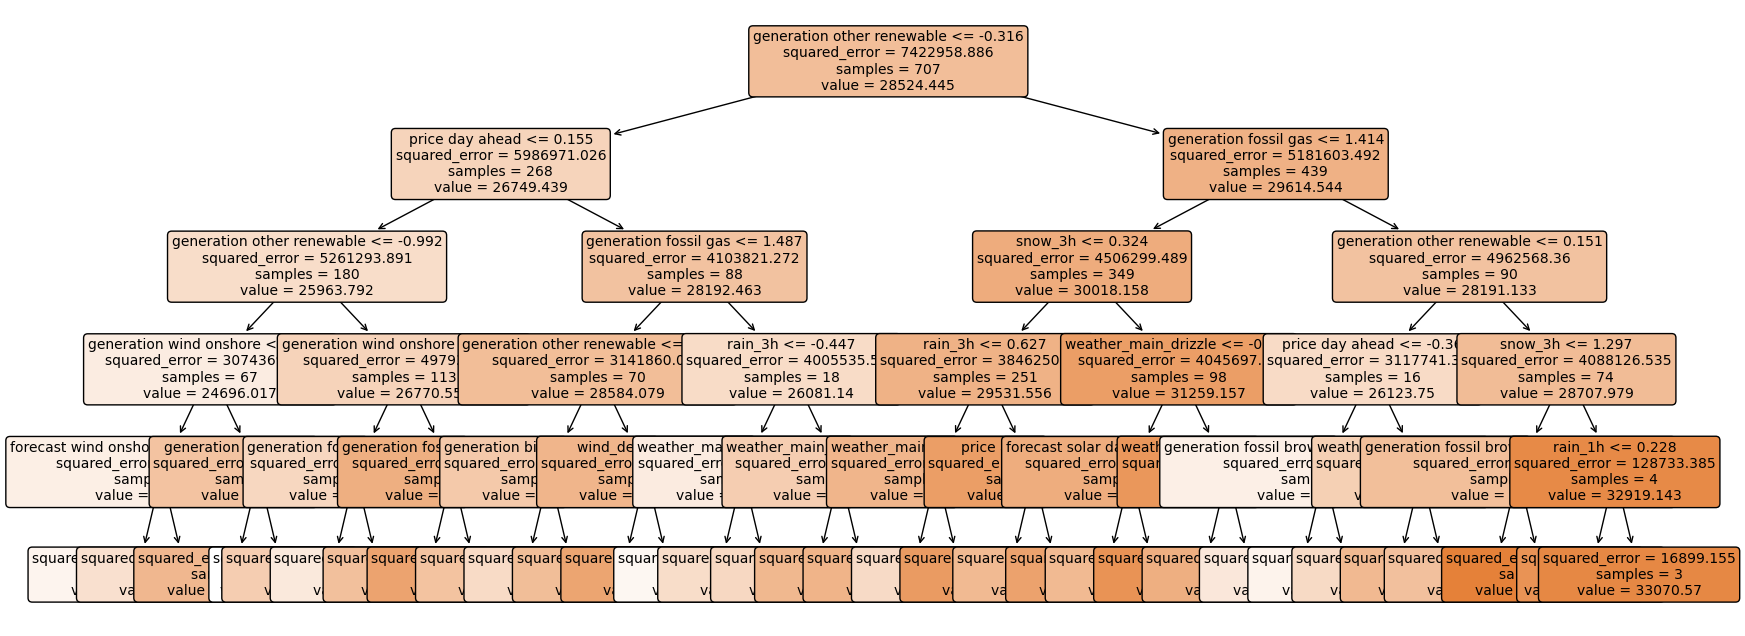

In [85]:
# Show the Decision Tree Results
ranFor_model = RandomForestRegressor(n_estimators=100,max_depth=5)
ranFor_model.fit(X_train_pca,y_train)
ypred = ranFor_model.predict(X_test_pca)

# Plot the Tree
tree= ranFor_model.estimators_[0]
plt.figure(figsize=(20,8))
plot_tree(tree,feature_names=X_train.columns.tolist(),filled=True,rounded=True,fontsize=10,class_names=["low","medium","high"])
plt.show()

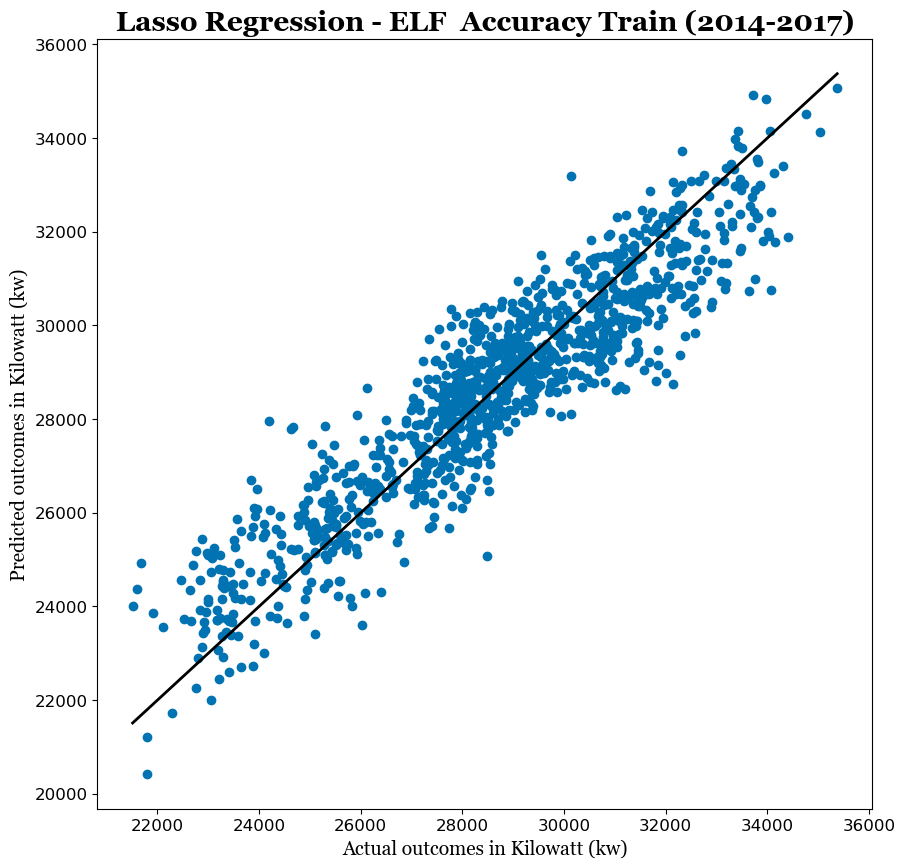

In [86]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred, color= dark_blue)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color= "black", linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('Lasso Regression - ELF  Accuracy Train (2014-2017)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()

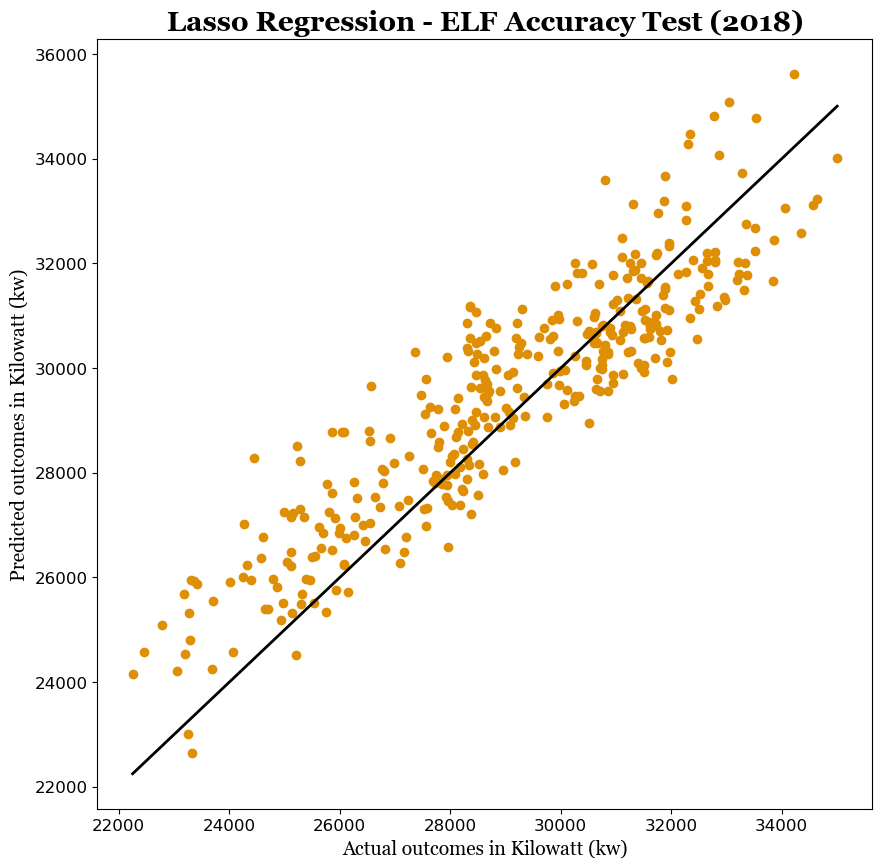

In [87]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, color= dark_orange)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-',linewidth=2)
plt.ylabel('Predicted outcomes in Kilowatt (kw)',fontsize=14, fontfamily= "Georgia")
plt.xlabel("Actual outcomes in Kilowatt (kw)",fontsize=14, fontfamily = "Georgia")
plt.title('Lasso Regression - ELF Accuracy Test (2018)',fontsize=20,fontfamily="Georgia",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('white')
plt.show()